In [ ]:
# Importing necessary Packages

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# loading the natural language toolkit
import nltk

# downloading the English stopwords
nltk.download('stopwords')

# downloading the wordnet for lemmatization
nltk.download('wordnet')

# to remove common stop words
from wordcloud import WordCloud
from nltk.corpus import stopwords
import warnings

# supress warnings
import warnings
warnings.filterwarnings('ignore')

# train-test split
from sklearn.model_selection import train_test_split

# for scaling the data using z-score
from sklearn.preprocessing import StandardScaler

# Encoder
from sklearn.preprocessing import LabelEncoder

# importing classification models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier


# import metrics
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

# import GridSearchCV for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# for data balancing
from imblearn.over_sampling import SMOTE

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
random_val=42
cv=5

- Step 1: Import the data [ 3 points ]

In [ ]:
# Mounting Google drive to our Colab Notebook

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Loading the dataset

industrial_safety_data_df=pd.read_excel("/content/drive/My Drive/AIML_CAPSTONE_PROJECT/chatbot_dataset/Data+Set+-+industrial_safety_and_health_database_with_accidents_description.xlsx")

### Exploratory data analysis

In [ ]:
# Shape of the dataset

industrial_safety_data_df.shape

(425, 11)

In [ ]:
# First 5 rows in the dataset

industrial_safety_data_df.head()

Unnamed: 0       Data   Countries     Local Industry Sector Accident Level  \
0           0 2016-01-01  Country_01  Local_01          Mining              I   
1           1 2016-01-02  Country_02  Local_02          Mining              I   
2           2 2016-01-06  Country_01  Local_03          Mining              I   
3           3 2016-01-08  Country_01  Local_04          Mining              I   
4           4 2016-01-10  Country_01  Local_04          Mining             IV   

  Potential Accident Level Genre Employee or Third Party        Critical Risk  \
0                       IV  Male             Third Party              Pressed   
1                       IV  Male                Employee  Pressurized Systems   
2                      III  Male    Third Party (Remote)         Manual Tools   
3                        I  Male             Third Party               Others   
4                       IV  Male             Third Party               Others   

                                         Description  
0  While removing the drill rod of the Jumbo 08 f...  
1  During the activation of a sodium sulphide pum...  
2  In the sub-station MILPO located at level +170...  
3  Being 9:45 am. approximately in the Nv. 1880 C...  
4  Approximately at 11:45 a.m. in circumstances t...

We can see that there is a column (Unnamed: 0) which is not relevant. So we will remove this column in the next step

In [ ]:
# dropping the above mentioned column from the dataset

industrial_safety_data_df.drop('Unnamed: 0',axis=1,inplace=True)
industrial_safety_data_df.head()

Data   Countries     Local Industry Sector Accident Level  \
0 2016-01-01  Country_01  Local_01          Mining              I   
1 2016-01-02  Country_02  Local_02          Mining              I   
2 2016-01-06  Country_01  Local_03          Mining              I   
3 2016-01-08  Country_01  Local_04          Mining              I   
4 2016-01-10  Country_01  Local_04          Mining             IV   

  Potential Accident Level Genre Employee or Third Party        Critical Risk  \
0                       IV  Male             Third Party              Pressed   
1                       IV  Male                Employee  Pressurized Systems   
2                      III  Male    Third Party (Remote)         Manual Tools   
3                        I  Male             Third Party               Others   
4                       IV  Male             Third Party               Others   

                                         Description  
0  While removing the drill rod of the Jumbo 08 f...  
1  During the activation of a sodium sulphide pum...  
2  In the sub-station MILPO located at level +170...  
3  Being 9:45 am. approximately in the Nv. 1880 C...  
4  Approximately at 11:45 a.m. in circumstances t...

In [ ]:
# Changing the column name 'Data' to 'Date' and 'Genre' to 'Gender'

industrial_safety_data_df.rename(columns={'Data' : 'Date', 'Genre' : 'Gender'}, inplace = True)

In [ ]:
# Checking datatype of each Column present in the dataset

industrial_safety_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      425 non-null    datetime64[ns]
 1   Countries                 425 non-null    object        
 2   Local                     425 non-null    object        
 3   Industry Sector           425 non-null    object        
 4   Accident Level            425 non-null    object        
 5   Potential Accident Level  425 non-null    object        
 6   Gender                    425 non-null    object        
 7   Employee or Third Party   425 non-null    object        
 8   Critical Risk             425 non-null    object        
 9   Description               425 non-null    object        
dtypes: datetime64[ns](1), object(9)
memory usage: 33.3+ KB


There are total 425 entries in our dataset. From the above result, we can see that there are 425 non null values in each column (So no missing values). Also, all the columns except 'Date' have datatype 'object'. 'Date' has datatype 'datetime'

- Step 2: Data cleansing [ 5 points ]


In [ ]:
# Checking if there are any Duplicate rows in the dataset

duplicate_count = industrial_safety_data_df.duplicated().sum()
print("Number of duplicate rows in our dataset:", duplicate_count)

Number of duplicate rows in our dataset: 7


In [ ]:
# Printing rows that are repeated/ duplicate

industrial_safety_data_df[industrial_safety_data_df.duplicated()]

Date   Countries     Local Industry Sector Accident Level  \
77  2016-04-01  Country_01  Local_01          Mining              I   
262 2016-12-01  Country_01  Local_03          Mining              I   
303 2017-01-21  Country_02  Local_02          Mining              I   
345 2017-03-02  Country_03  Local_10          Others              I   
346 2017-03-02  Country_03  Local_10          Others              I   
355 2017-03-15  Country_03  Local_10          Others              I   
397 2017-05-23  Country_01  Local_04          Mining              I   

    Potential Accident Level Gender Employee or Third Party  \
77                         V   Male    Third Party (Remote)   
262                       IV   Male                Employee   
303                        I   Male    Third Party (Remote)   
345                        I   Male             Third Party   
346                        I   Male             Third Party   
355                        I   Male             Third Party   
397                       IV   Male             Third Party   

               Critical Risk  \
77                    Others   
262                   Others   
303                   Others   
345         Venomous Animals   
346         Venomous Animals   
355         Venomous Animals   
397  Projection of fragments   

                                           Description  
77   In circumstances that two workers of the Abrat...  
262  During the activity of chuteo of ore in hopper...  
303  Employees engaged in the removal of material f...  
345  On 02/03/17 during the soil sampling in the re...  
346  On 02/03/17 during the soil sampling in the re...  
355  Team of the VMS Project performed soil collect...  
397  In moments when the 02 collaborators carried o...

In [ ]:
# let us check if there is repeated description in our data

industrial_safety_data_df[industrial_safety_data_df['Description'].duplicated()]

Date   Countries     Local Industry Sector Accident Level  \
38  2016-02-24  Country_02  Local_07          Mining              I   
77  2016-04-01  Country_01  Local_01          Mining              I   
131 2016-05-26  Country_03  Local_10          Others              I   
144 2016-06-08  Country_03  Local_10          Others              I   
167 2016-07-07  Country_01  Local_03          Mining              I   
262 2016-12-01  Country_01  Local_03          Mining              I   
263 2016-12-01  Country_01  Local_03          Mining              I   
303 2017-01-21  Country_02  Local_02          Mining              I   
345 2017-03-02  Country_03  Local_10          Others              I   
346 2017-03-02  Country_03  Local_10          Others              I   
355 2017-03-15  Country_03  Local_10          Others              I   
388 2017-05-06  Country_02  Local_07          Mining             II   
397 2017-05-23  Country_01  Local_04          Mining              I   
413 2017-06-20  Country_01  Local_01          Mining              I   

    Potential Accident Level  Gender Employee or Third Party  \
38                         V  Female             Third Party   
77                         V    Male    Third Party (Remote)   
131                        I    Male                Employee   
144                        I    Male             Third Party   
167                       IV    Male             Third Party   
262                       IV    Male                Employee   
263                       IV    Male             Third Party   
303                        I    Male    Third Party (Remote)   
345                        I    Male             Third Party   
346                        I    Male             Third Party   
355                        I    Male             Third Party   
388                        V    Male                Employee   
397                       IV    Male             Third Party   
413                       IV    Male             Third Party   

               Critical Risk  \
38                    Others   
77                    Others   
131                   Others   
144                   Others   
167                   Others   
262                   Others   
263                   Others   
303                   Others   
345         Venomous Animals   
346         Venomous Animals   
355         Venomous Animals   
388               Projection   
397  Projection of fragments   
413                   Others   

                                           Description  
38   When starting the activity of removing a coil ...  
77   In circumstances that two workers of the Abrat...  
131  In the geological reconnaissance activity, in ...  
144  Project of Vazante that carried out sediment c...  
167  At moments when the MAPERU truck of plate F1T ...  
262  During the activity of chuteo of ore in hopper...  
263  During the activity of chuteo of ore in hopper...  
303  Employees engaged in the removal of material f...  
345  On 02/03/17 during the soil sampling in the re...  
346  On 02/03/17 during the soil sampling in the re...  
355  Team of the VMS Project performed soil collect...  
388  The employees Márcio and Sérgio performed the ...  
397  In moments when the 02 collaborators carried o...  
413  In circumstance, the AHK-903 license plate (Em...

* Few descriptions are repeated in the data.
* These are accidents which happened with more than one person, and our data has one entry for each person.
* So, we will not remove the repeated descriptions and keep them as it is.

In [ ]:
# Dropping the duplicate rows and resetting the index

industrial_safety_data_df.drop_duplicates(inplace=True)
industrial_safety_data_df.reset_index(drop=True,inplace=True)

In [ ]:
industrial_safety_data_df.shape

(418, 10)

We can see that now we have 418 entries as 7 duplicate rows have been removed.

In [ ]:
# Checking missing values in each column of dataset

industrial_safety_data_df.isnull().sum()

Date                        0
Countries                   0
Local                       0
Industry Sector             0
Accident Level              0
Potential Accident Level    0
Gender                      0
Employee or Third Party     0
Critical Risk               0
Description                 0
dtype: int64

Above results show that there are no missing values in any of the column

In [ ]:
# Checking date range of Accidents

industrial_safety_data_df['Date'].min(), industrial_safety_data_df['Date'].max()


(Timestamp('2016-01-01 00:00:00'), Timestamp('2017-07-09 00:00:00'))

In [ ]:
# Checking value count for 'Countries' column

industrial_safety_data_df['Countries'].value_counts()

Countries
Country_01    248
Country_02    129
Country_03     41
Name: count, dtype: int64

In [ ]:
# Checking value count for 'Local' column

industrial_safety_data_df['Local'].value_counts()

Local
Local_03    89
Local_05    59
Local_01    56
Local_04    55
Local_06    46
Local_10    41
Local_08    27
Local_02    23
Local_07    14
Local_12     4
Local_09     2
Local_11     2
Name: count, dtype: int64

In [ ]:
# Checking value count for 'Industry Sector' column

industrial_safety_data_df['Industry Sector'].value_counts()

Industry Sector
Mining    237
Metals    134
Others     47
Name: count, dtype: int64

We understand that frequency of accidents occuring in Mining sector must be high due to the nature of work. From above result, we can see that most cases belong to Mining sector, which confirms the same.

In [ ]:
# Checking value count for 'Accident Level' column

industrial_safety_data_df['Accident Level'].value_counts()

Accident Level
I      309
II      40
III     31
IV      30
V        8
Name: count, dtype: int64

In [ ]:
# Checking value count for 'Potential Accident Level' column

industrial_safety_data_df['Potential Accident Level'].value_counts()

Potential Accident Level
IV     141
III    106
II      95
I       45
V       30
VI       1
Name: count, dtype: int64

In [ ]:
# Checking the relation between Potential accident level and Actual accident level

potential_actual_mapping=pd.DataFrame(columns=['Actual Accident Level','I','II','III','IV','V','VI'])
acc_level=['I','II','III','IV','V','VI']
for acc_level_val in acc_level:
  row=[acc_level_val]
  for pot_acc_level in acc_level:
    row.append(industrial_safety_data_df[(industrial_safety_data_df['Accident Level']==acc_level_val) & (industrial_safety_data_df['Potential Accident Level']==pot_acc_level)].shape[0])
  potential_actual_mapping.loc[len(potential_actual_mapping)]=row
potential_actual_mapping


Actual Accident Level   I  II  III  IV  V  VI
0                     I  45  88   89  78  9   0
1                    II   0   7   14  16  3   0
2                   III   0   0    3  26  2   0
3                    IV   0   0    0  21  9   0
4                     V   0   0    0   0  7   1
5                    VI   0   0    0   0  0   0

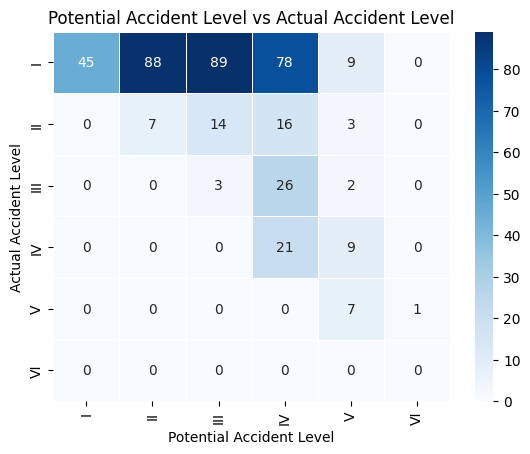

In [ ]:
# Count of Potential Accident Level vs Actual Accident Level

sns.heatmap(potential_actual_mapping.iloc[:,1:],annot=True,linewidths=0.5,cmap='Blues');
x_labels=potential_actual_mapping.columns[1:]
y_labels=potential_actual_mapping['Actual Accident Level']
plt.xticks(np.arange(len(x_labels))+0.5,x_labels,rotation=90);
plt.yticks(np.arange(len(y_labels))+0.5,y_labels);
plt.xlabel('Potential Accident Level');
plt.ylabel('Actual Accident Level');
plt.title('Potential Accident Level vs Actual Accident Level');
plt.show()

For most of the accidents, the potential accident level is greater than the actual accident level.

In [ ]:
# Checking value count for 'Gender' column

industrial_safety_data_df['Gender'].value_counts()

Gender
Male      396
Female     22
Name: count, dtype: int64

In [ ]:
# Checking value count for 'Employee or Third Party' column

industrial_safety_data_df['Employee or Third Party'].value_counts()

Employee or Third Party
Third Party             185
Employee                178
Third Party (Remote)     55
Name: count, dtype: int64

In [ ]:
# Checking value count for 'Critical Risk' column

industrial_safety_data_df['Critical Risk'].value_counts()

Critical Risk
Others                                       229
Pressed                                       24
Manual Tools                                  20
Chemical substances                           17
Cut                                           14
Projection                                    13
Venomous Animals                              13
Bees                                          10
Fall                                           9
Vehicles and Mobile Equipment                  8
remains of choco                               7
Fall prevention (same level)                   7
Pressurized Systems                            7
Fall prevention                                6
Suspended Loads                                6
Liquid Metal                                   3
Pressurized Systems / Chemical Substances      3
Power lock                                     3
Blocking and isolation of energies             3
Electrical Shock                               2
Machine Protection                             2
Poll                                           1
Confined space                                 1
Electrical installation                        1
\nNot applicable                               1
Plates                                         1
Projection/Burning                             1
Traffic                                        1
Projection/Choco                               1
Burn                                           1
Projection/Manual Tools                        1
Individual protection equipment                1
Projection of fragments                        1
Name: count, dtype: int64

* There are some critical risk categories which are occuring in our data for only one or two times.
* So, it is better to put these categories into one common 'Others' category, since this data is not sufficient for analysis or ML model performance.

In [ ]:
# Replacing all values in 'Critical Risk' column whose count is <=2 and unexpected values with 'Others'

industrial_safety_data_df['Critical Risk'].replace(['Machine Protection','Electrical Shock','Poll','Individual protection equipment','Projection/Manual Tools',
'Burn','Electrical installation','Projection/Choco','Projection/Burning','Plates', 'Confined space','Traffic', '\nNot applicable', 'Projection of fragments'], 'Others', inplace=True)


In [ ]:
industrial_safety_data_df['Critical Risk'].value_counts()

Critical Risk
Others                                       245
Pressed                                       24
Manual Tools                                  20
Chemical substances                           17
Cut                                           14
Venomous Animals                              13
Projection                                    13
Bees                                          10
Fall                                           9
Vehicles and Mobile Equipment                  8
Pressurized Systems                            7
Fall prevention (same level)                   7
remains of choco                               7
Fall prevention                                6
Suspended Loads                                6
Pressurized Systems / Chemical Substances      3
Blocking and isolation of energies             3
Liquid Metal                                   3
Power lock                                     3
Name: count, dtype: int64

In [ ]:
industrial_safety_data_df['Critical Risk']=industrial_safety_data_df['Critical Risk'].str.title()

In [ ]:
# creating a list of categorical variables so as to perform univariate analysis on the same

category_columns = industrial_safety_data_df.select_dtypes(['object', 'category']).columns.to_list()
category_columns

['Countries',
 'Local',
 'Industry Sector',
 'Accident Level',
 'Potential Accident Level',
 'Gender',
 'Employee or Third Party',
 'Critical Risk',
 'Description']

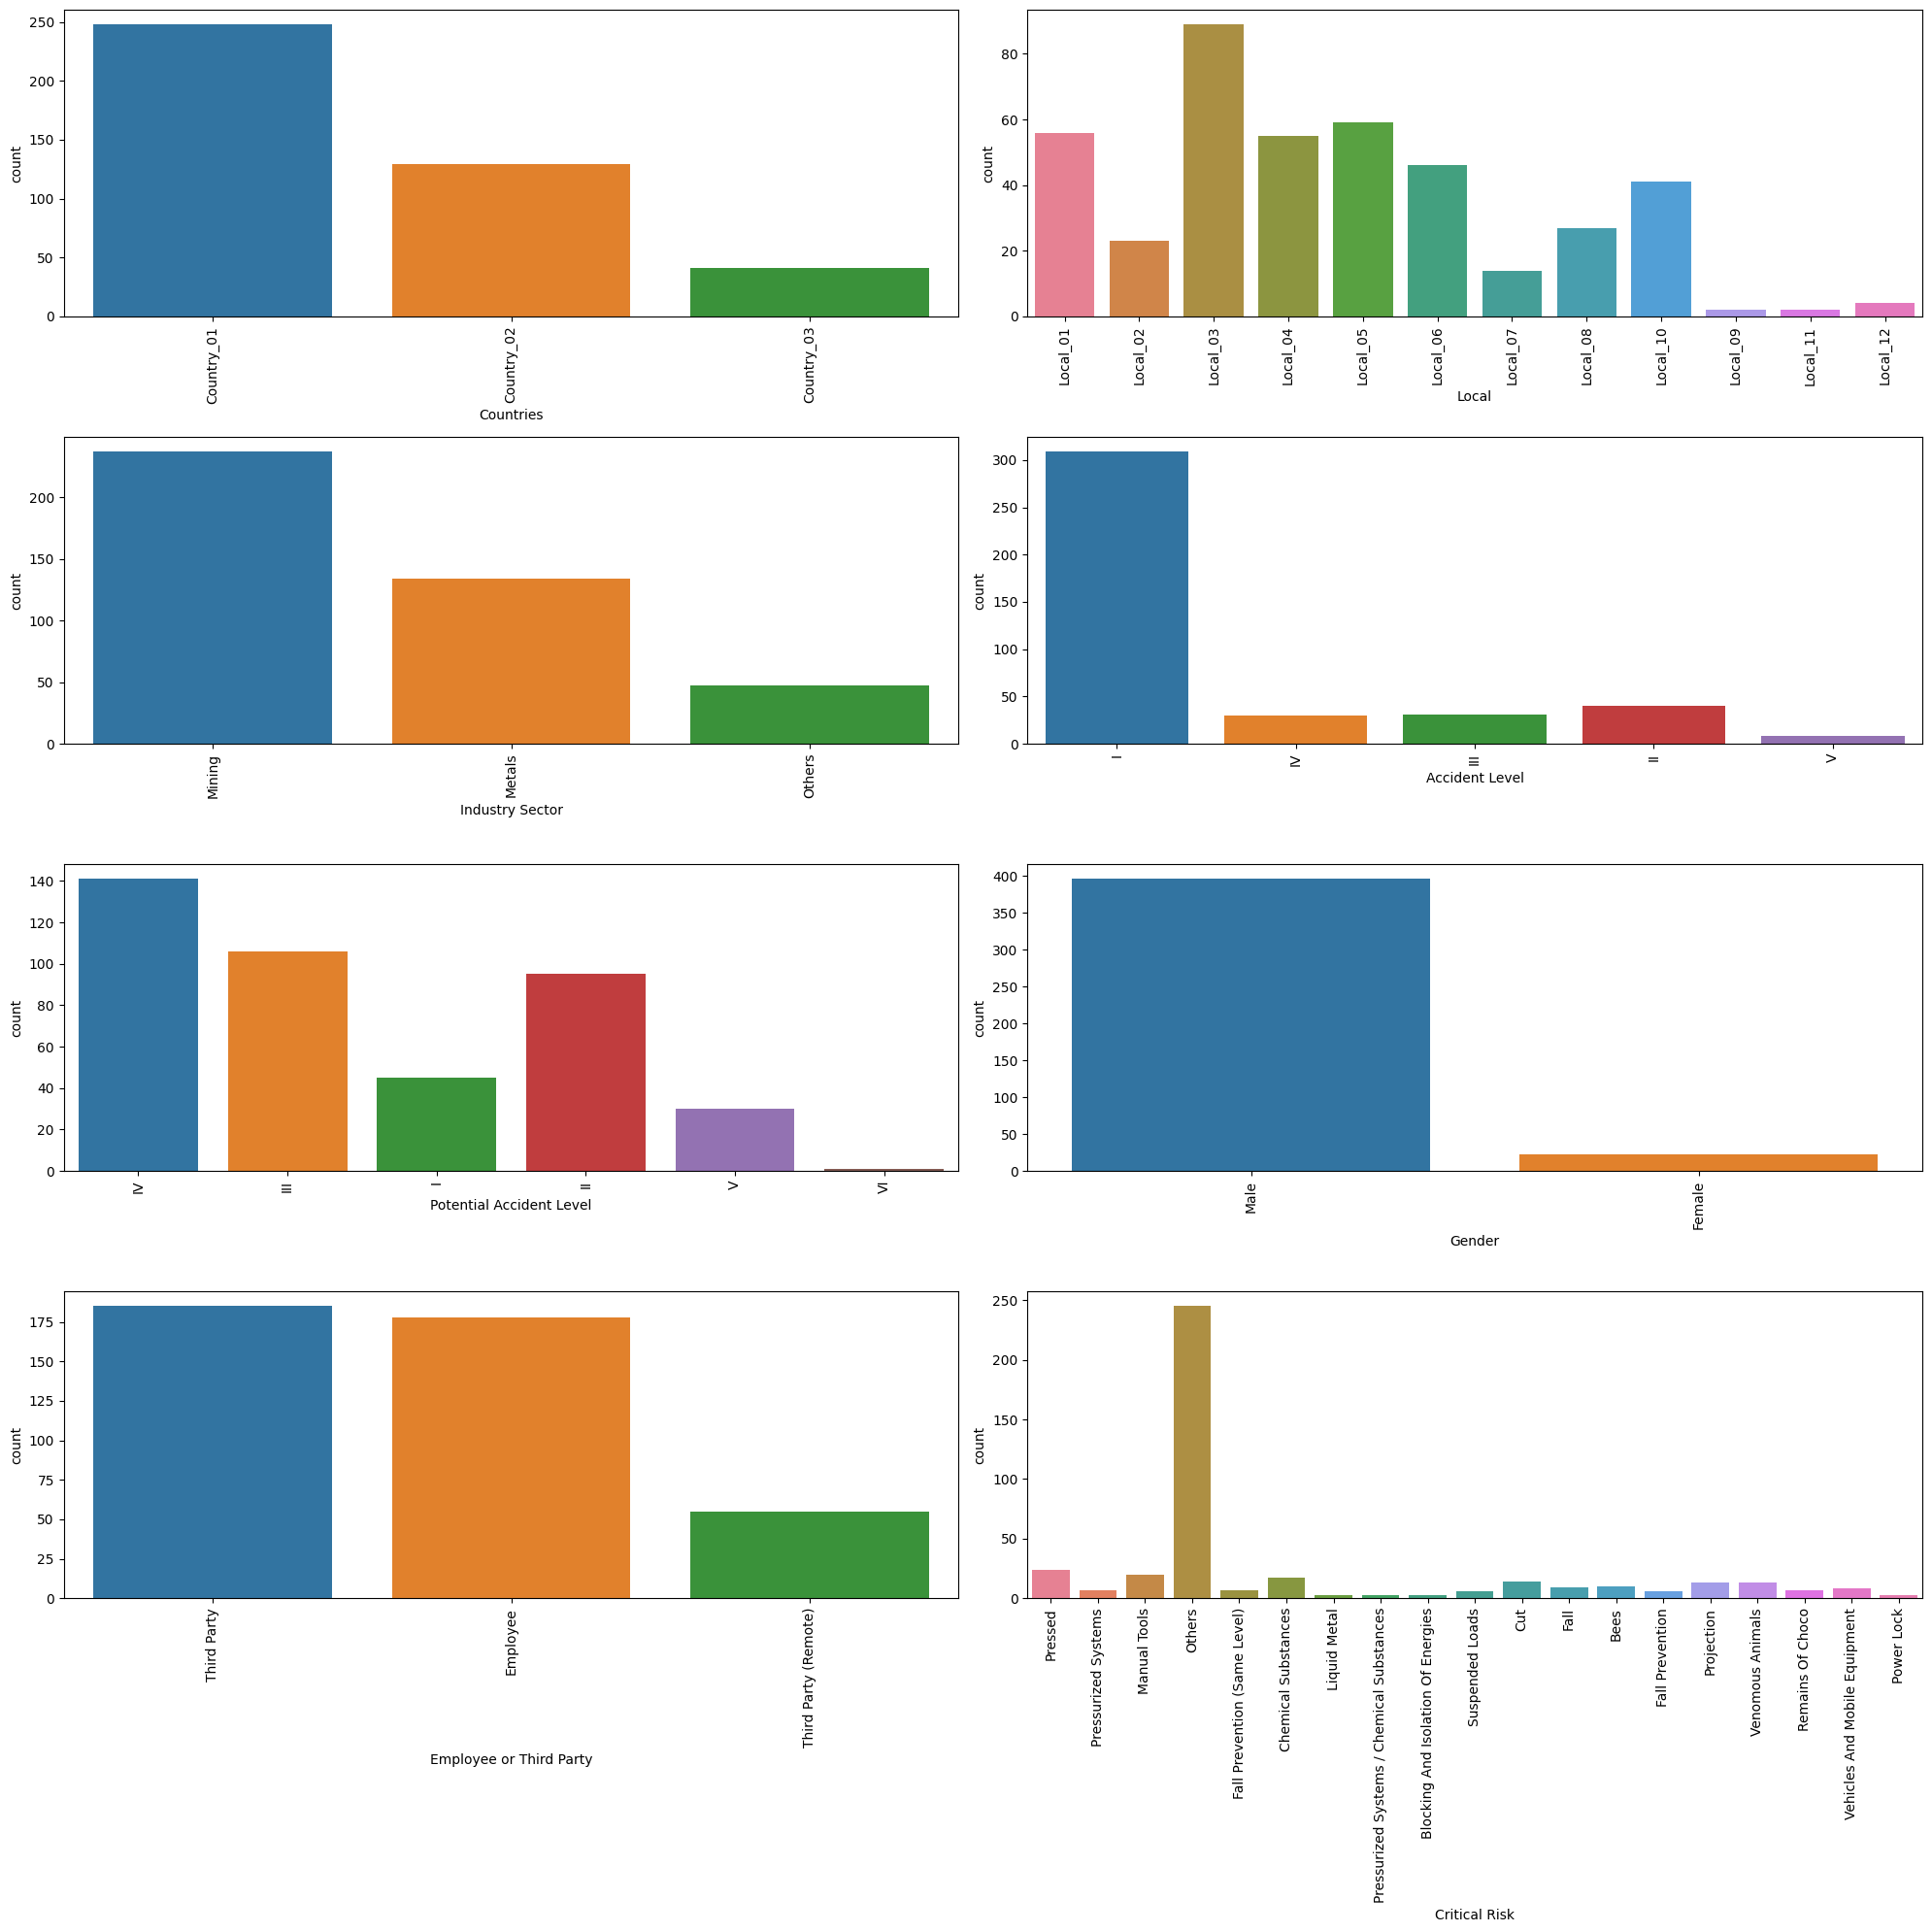

In [ ]:
plt.figure(figsize=(20, 20))

# looping through all categorical columns except 'Description' to generate countplots

for i, column in enumerate(category_columns[:-1]):
  plt.subplot(4, 2, i+1)
  sns.countplot(industrial_safety_data_df, x=column, hue=column)
  plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

### From above Visualizations, we can see that:

#### Country

Country 1 is the most affected by accidents, which can be concluded with respect to the data available to us. Country 3 is the least affected with just around 40 cases.

#### Industry Sector

As also mentioned earlier, Mining sector has more accident cases than any other sector. Thus, we can say that jobs in the mining industry sector are more risky than metal or any other sector.

#### Gender

Dataset is more biased towards male employees. It makes sense as the male and female employee population hugely depends on the type of Industry sector. In our case, the data revolves around 2 major sectors where male employee population can be highly dominant.

#### Employee type

Total number of internal employees and Third Party employees is more or less the same. But, we can also see that Third party remote employees are comparatively less in number.

#### Local

We also have a visualization that shows us frequency of accidents in different Localities. From the graph, we can say that Local_03 has seen the maximum number of accidents, which is around 20% of all the accident cases recorded.

#### Critical Risk

Most of the Critical Risks are classified as 'Others'. It holds around 50% of the total Critical Risks. It is followed by Pressed, Manual tools, Chemical substances, etc.

#### Accident Level

* Here, we understand that level 1 is the least severe and level 5 is the most severe.
Most of the accidents are level 1 accidents, which mostly have occured due to small causes.
* Since Accident Level is the target class, we need to apply data balancing techniques before building ML models.

#### Potential Accident Level

Potential accident level indicates how severe the accident would have been due to other factors involved in the accidents. As per the graph, level IV has the highest count, which corresponds to moderate severity of accidents.


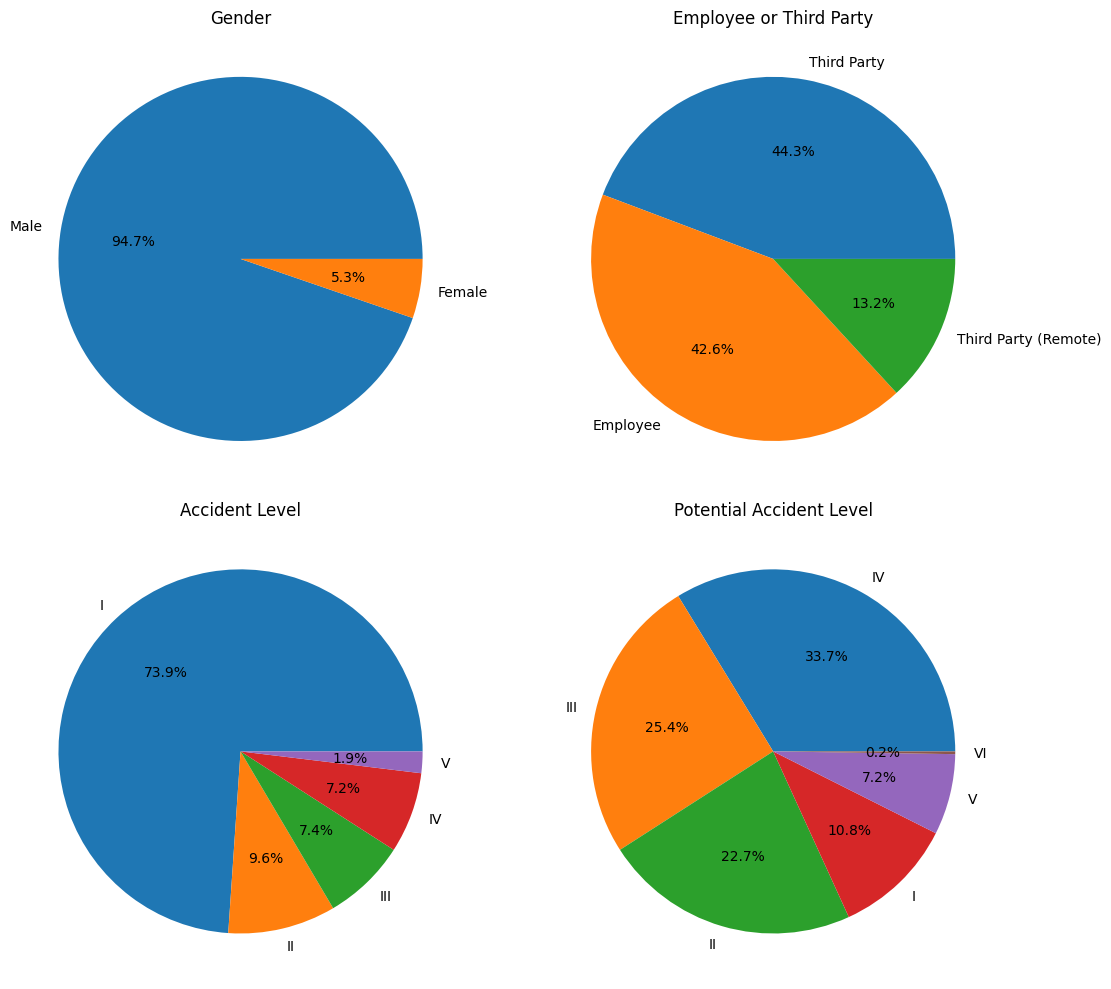

In [ ]:
plt.figure(figsize=(12, 10))

# generating pie charts for 'Gender', 'Employee or Third Party', 'Accident Level' and 'Potential Accident Level'

for i, column in enumerate(['Gender', 'Employee or Third Party', 'Accident Level', 'Potential Accident Level']):
  plt.subplot(2, 2, i+1)
  plt.pie(industrial_safety_data_df[column].value_counts(),labels=industrial_safety_data_df[column].value_counts().index,autopct='%1.1f%%');
  plt.title(column)
plt.tight_layout()
plt.show()

In [ ]:
# defining a function to change the roman numerics (categorical) to numbers

def changeLabels(s):
  if s=='I':
    return 1
  elif s=='II':
    return 2
  elif s=='III':
    return 3
  elif s=='IV':
    return 4
  elif s=='V':
    return 5
  elif s=='VI':
    return 6

In [ ]:
# Applying the above function to 'Accident Level' & 'Potential Accident Level'

industrial_safety_data_df['Accident Level']=industrial_safety_data_df['Accident Level'].apply(changeLabels)
industrial_safety_data_df['Potential Accident Level']=industrial_safety_data_df['Potential Accident Level'].apply(changeLabels)

In [ ]:
industrial_safety_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      418 non-null    datetime64[ns]
 1   Countries                 418 non-null    object        
 2   Local                     418 non-null    object        
 3   Industry Sector           418 non-null    object        
 4   Accident Level            418 non-null    int64         
 5   Potential Accident Level  418 non-null    int64         
 6   Gender                    418 non-null    object        
 7   Employee or Third Party   418 non-null    object        
 8   Critical Risk             418 non-null    object        
 9   Description               418 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(7)
memory usage: 32.8+ KB


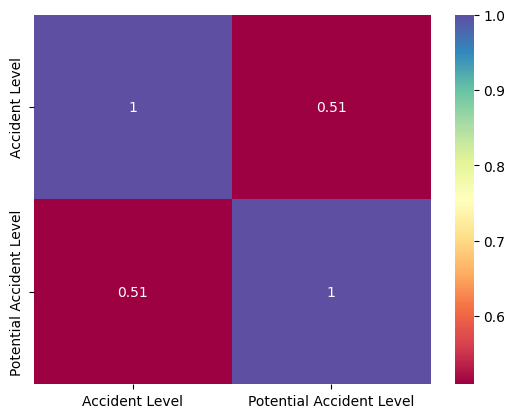

In [ ]:
# Visualizing a heatmap to show correlation between 'Accident Level' & 'Potential Accident Level'

sns.heatmap(industrial_safety_data_df[['Accident Level','Potential Accident Level']].corr(),annot=True,cmap='Spectral');

There is moderate positive correlation between potential accident level and accident level

In [ ]:
# finding the average accident level across industry sectors

industrial_safety_data_df.groupby('Industry Sector')['Accident Level'].mean()

Industry Sector
Metals    1.380597
Mining    1.662447
Others    1.340426
Name: Accident Level, dtype: float64

In [ ]:
# finding the average potential accident level across industry sectors

industrial_safety_data_df.groupby('Industry Sector')['Potential Accident Level'].mean()

Industry Sector
Metals    2.813433
Mining    3.430380
Others    1.765957
Name: Potential Accident Level, dtype: float64

From above two observations, we can say that Accidents in Mining Sector are potentially more fatal than that in the other sectors.

In [ ]:
# Country to local mapping (using groupby function)

industrial_safety_data_df.groupby('Countries')['Local'].value_counts()

Countries   Local   
Country_01  Local_03    89
            Local_01    56
            Local_04    55
            Local_06    46
            Local_11     2
Country_02  Local_05    59
            Local_08    27
            Local_02    23
            Local_07    14
            Local_12     4
            Local_09     2
Country_03  Local_10    41
Name: count, dtype: int64

As expected no local spreads across more than one country. This implies that either the country variable or Local variable can be dropped.


In [ ]:
# Country wise distribution of accidents
# Defining a function to further create Pie Charts

def showPieOfAccidentsByCountry(countryName):
  plt.pie(industrial_safety_data_df[industrial_safety_data_df['Countries']==countryName]['Accident Level'].value_counts(),labels=industrial_safety_data_df[industrial_safety_data_df['Countries']==countryName]['Accident Level'].value_counts().index,autopct='%1.1f%%',textprops={'fontsize': 14});

In [ ]:
# Defining a function to further create Pie Charts

def showPieOfAccidentsByColumn(columnName,columnValue):
  plt.pie(industrial_safety_data_df[industrial_safety_data_df[columnName]==columnValue]['Accident Level'].value_counts(),labels=industrial_safety_data_df[industrial_safety_data_df[columnName]==columnValue]['Accident Level'].value_counts().index,autopct='%1.1f%%');

# Creating the Pie Charts depicting Country wise distribution of Accidents (on the basis of Accident Level)

def showAllPiesForColumn(columnName,columnsPerRow):
  noOfUniques=len(industrial_safety_data_df[columnName].unique())
  noOfColumns=columnsPerRow
  noOfRows=int(np.ceil(noOfUniques/noOfColumns))
  #fig, axes = plt.subplots(noOfRows,noOfColumns, figsize=(noOfColumns*5,noOfRows*5))
  #fig.tight_layout()
  plt.figure(figsize=(noOfColumns*4,noOfRows*4));
  for i, column in enumerate(industrial_safety_data_df[columnName].unique()):
    plt.subplot(noOfRows,noOfColumns,i+1)
    showPieOfAccidentsByColumn(columnName,column)
    plt.title('Accident Level vs '+column)
  plt.show()


#### Accident levels versus Country

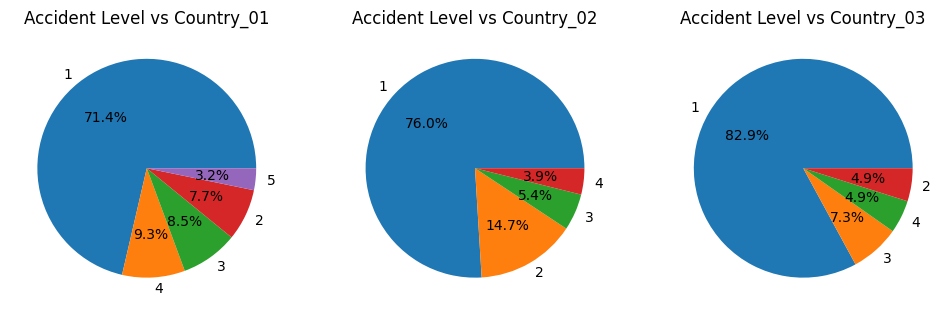

In [ ]:
# Pie chart for Accident levels verses Country

showAllPiesForColumn('Countries',3)

* We can see that more than 70% accidents in all three countries are Level 1 accidents.
* All the Level 5 accidents occured only in country_01. It would be interesting to investigate further to know the reason for this. Why the most severe accidents are specific to country_01?
* We can also observe that the proportion of Level 4 accidents in country_01 is the highest.
* Country_01 seems to be more prone to severe accidents than other countries.

#### Accident levels versus Local

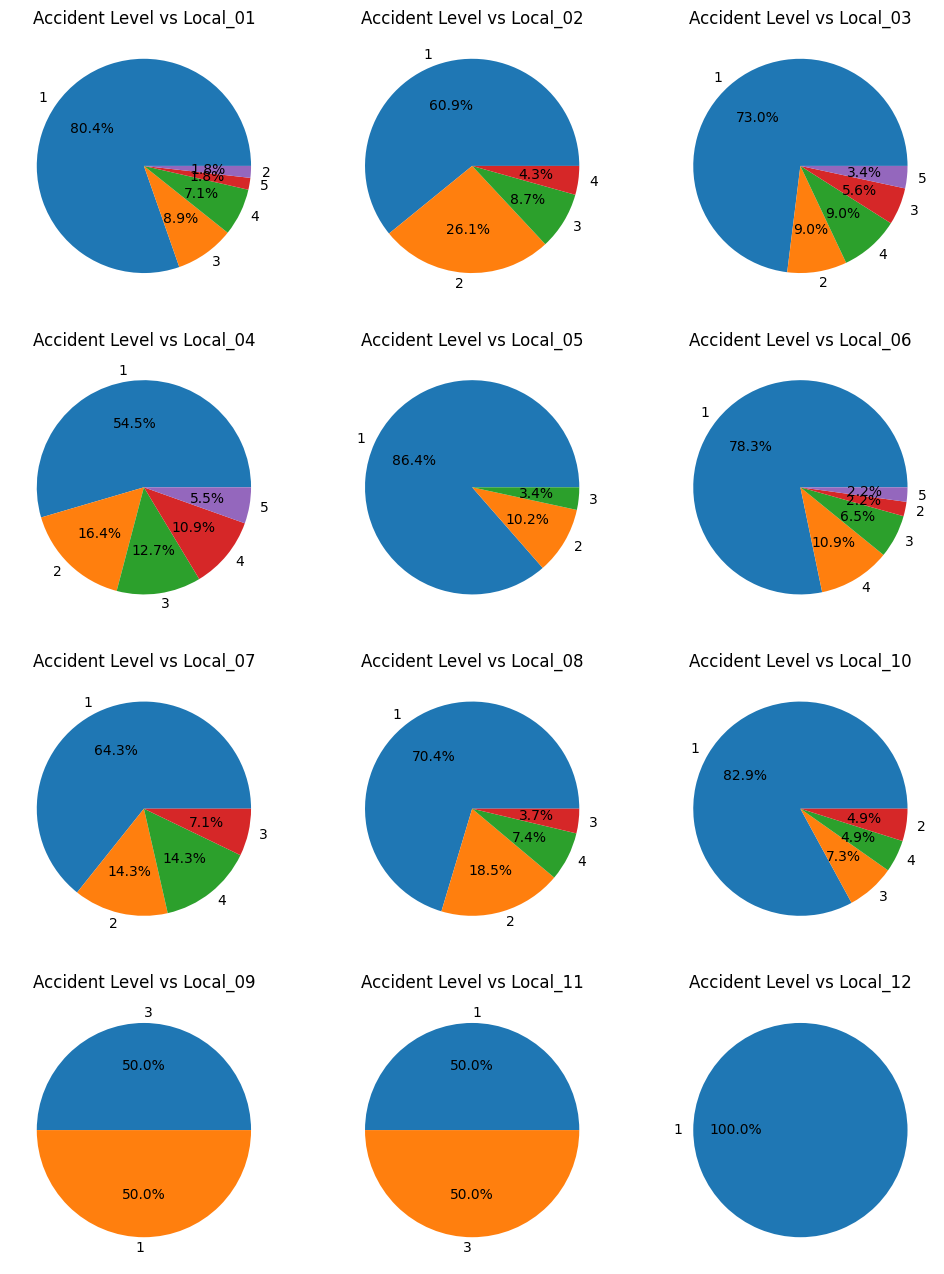

In [ ]:
# Pie chart for Accident levels versus Local

showAllPiesForColumn('Local',3)

1. We can see that majority of accidents in all localities are level 1 accidents. In fact, local_12 observed only level 1 accidents.
2. Local_09 and local_11 observed only level 1 and 3 accidents, that too in equal proportion.
3. We can observe that the proportion of Level 4 and level 5 accidents is the highest in local_04.

#### Accident levels versus Industry Sector

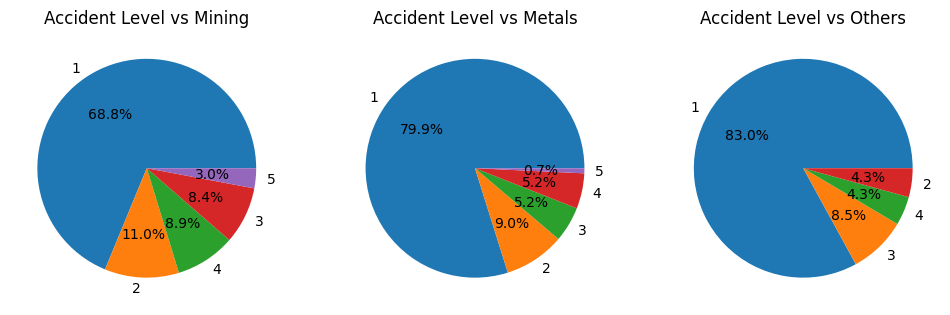

In [ ]:
# Pie chart for Accident levels versus Industry Sector


showAllPiesForColumn('Industry Sector',3)

1.  As we discussed earlier, above visualizations confirm that Mining sector seems to be more prone to severe accidents than other sectors.
2. Mining sector has highest proportion of level 4 and level 5 accidents among all the sectors.
3. Proportion of level 1 accidents is highest in Others Sector.

#### Accident levels versus Gender

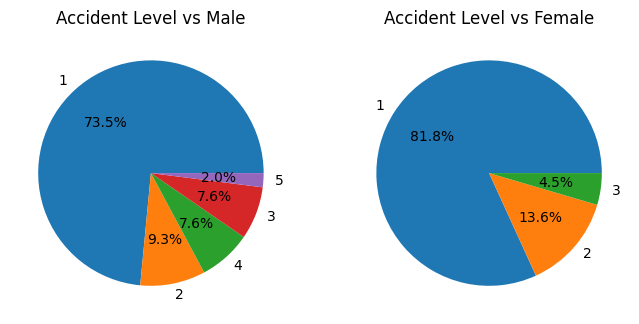

In [ ]:
# Pie chart for Accident levels versus Gender

showAllPiesForColumn('Gender',2)

1. From above results, we can say that men have faced more severe accidents than women.
2. Around 10% of overall accidents faced by men are level 4 and level 5 accidents, whereas women did not face any level 4 or 5 accident.
3. More than 80% of accidents faced by women are level 1 accidents.

#### Accident levels versus Employee Type

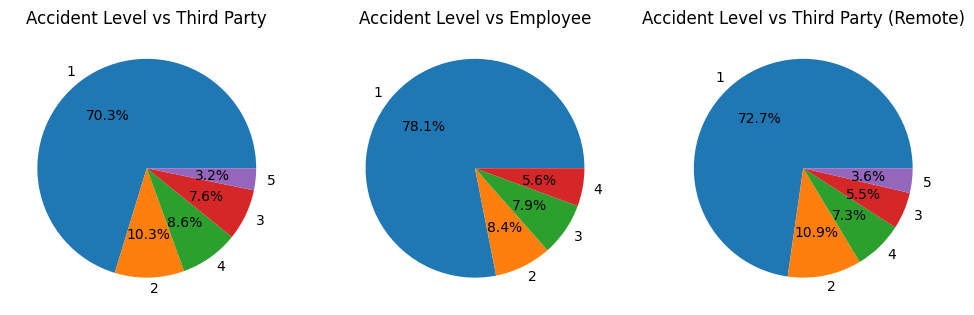

In [ ]:
# Pie chart for Accident levels versus Employee Type

showAllPiesForColumn('Employee or Third Party',3)

1. We can see that percentage of level 1 accidents for all employee types is over 70%.
2. Internal employees did not face any level 5 accident, whereas proportion of level 5 accidents for both Third Party and Third Party remote is roughly the same.
3. This tells us that it is slightly more risky to be a Third party or remote employee than to be an internal employee.

#### Accident levels versus Critical Risk

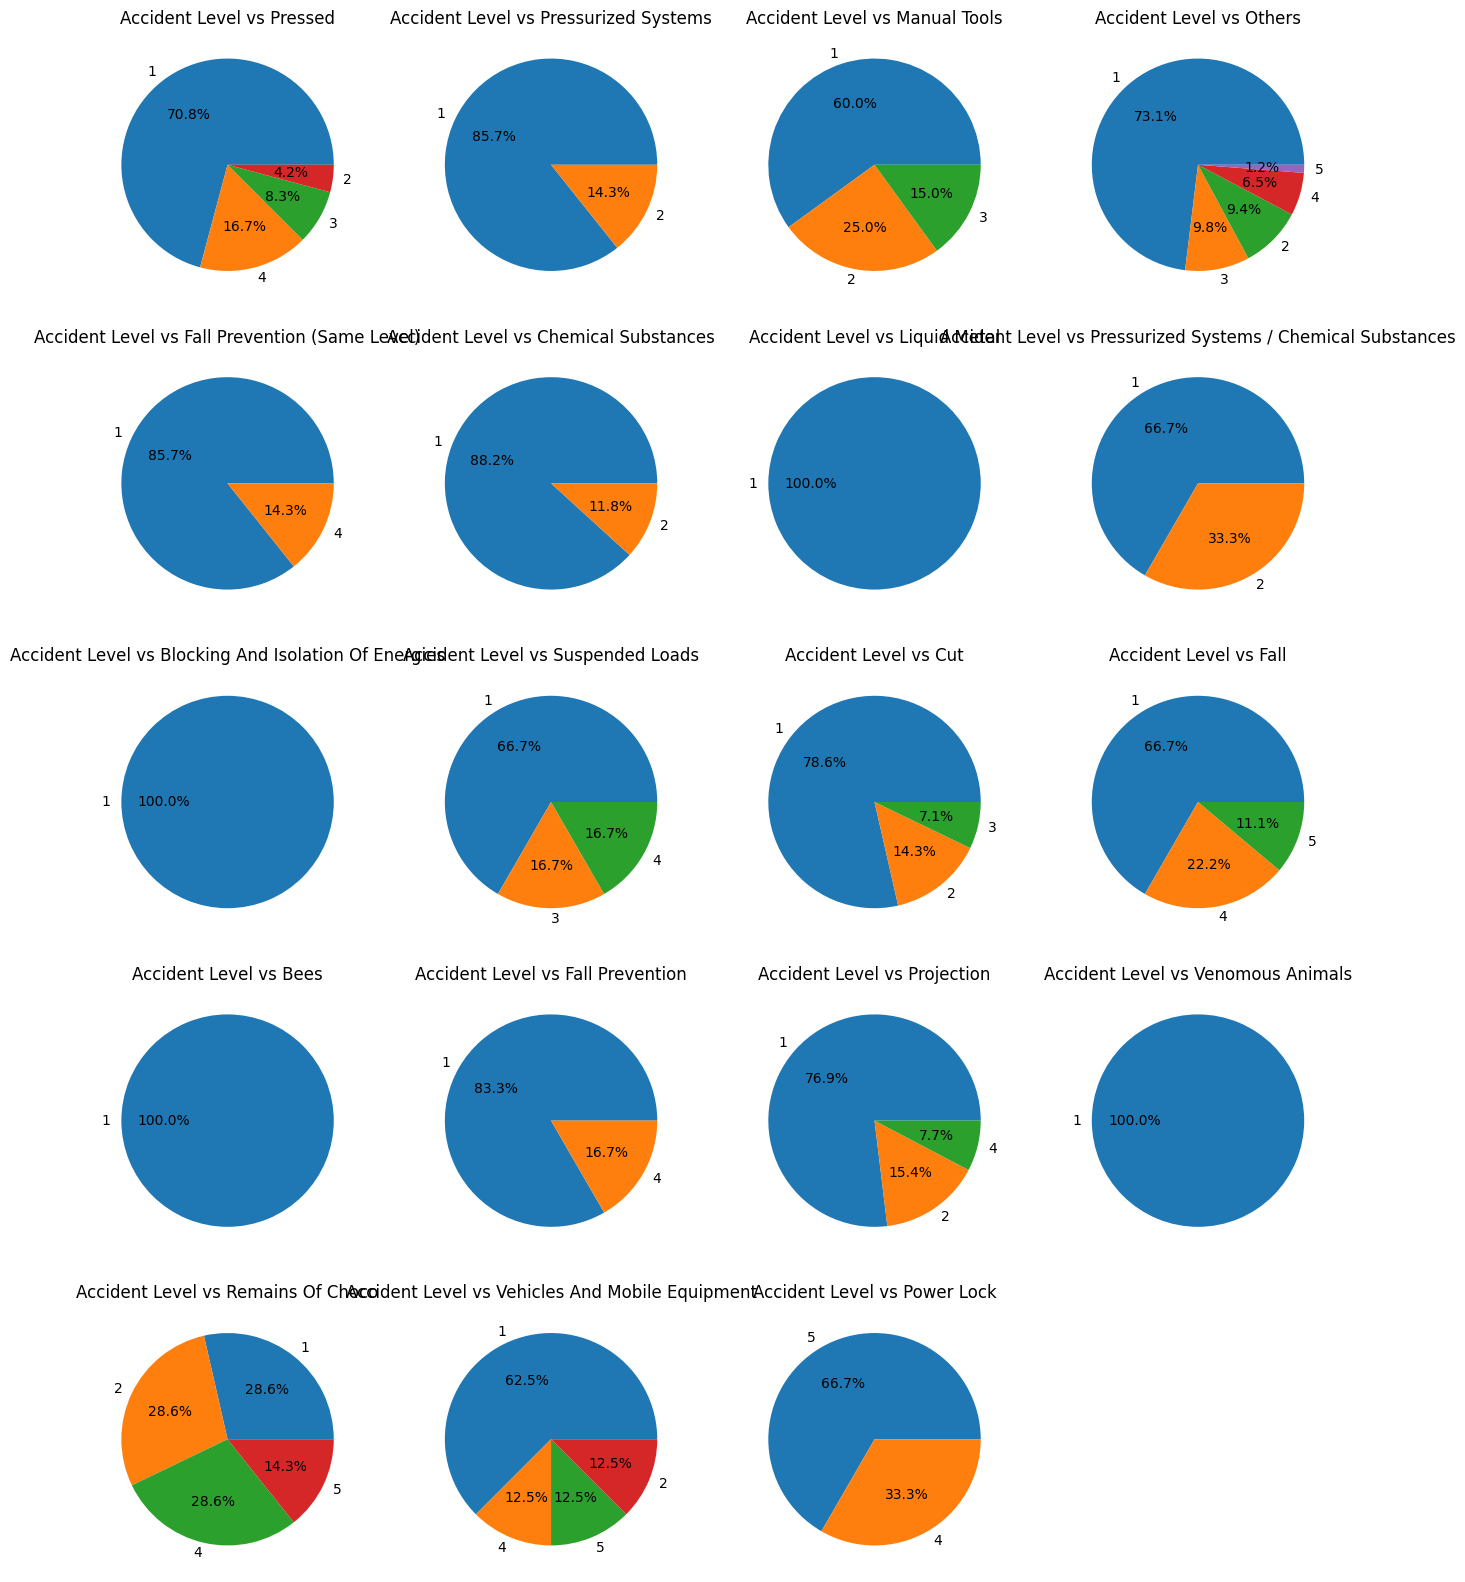

In [ ]:
# Pie chart for Accident levels versus Critical Risk

showAllPiesForColumn('Critical Risk',4)

- Step 3: Data preprocessing (NLP Preprocessing techniques) [ 7 points ]

In [ ]:
# to display all columns
pd.set_option('display.max_columns', None)

# Set max column width to avoid truncation
pd.set_option('display.max_colwidth', None)

In [ ]:
# making a copy of original data
data = industrial_safety_data_df.copy()

In [ ]:
# checking few samples of description
data['Description'].sample(5)

293                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            During the reduction activity in the tube, the employee attached the tube to the walrus, and when he hit the tube with the hammer, he untied the walrus by reaching his finger.
145    Once the mooring of the faneles in the detonating cord has been completed, the injured person proceeds to tie the detonating cord in the safety guide (slow wick) at a distance of 2.0 meters from the top of the work. At that moment, to finish mooring, a rock bank (30cm x 50cm x 15cm; 67.5 Kg.) the same front, from a height of 1.60 meters, which falls to the floor very close to the injured, disintegrates in several fragments, one of which (12cmx10cmx3cm, 2.0 Kg.) slides between the fragments of rock and impacts with the left leg of the victim. At the time of the accident the operator used his safety boots and was accompanied by a supervisor.
303                                                                                                                                                                                                                                                                                                                                                                                                               On 01/24/2017, at 12:25 a.m., during the activity of collecting soil, the collaborator Milton ran into a branch and was attacked by maribondos. He was bitten twice in the head. No pain, swelling and no allergic symptoms continued with their activities.
289                                                                                                                                                                                                                                                                                                                                                            Employee performed withdrawal of electrical failure in the engine control drawer of the TQ 14 A, after the check and exchange of fuses, it closed the door of the drawer and energized the drawer, at this moment an arc was opened, reaching the face and part of the employee's forearm, causing minor burns.
243                                                                                               Once the ore loading in the LT-30 locomotive was completed; the penultimate car derails (7th car), by the presence of fragment of rock in the railway line, (weight of the car with mineral 8 tons), and to get it back on track the mining car, the victim makes use of a metal tube (length 1.20 meters and 4 "diameter) to maneuver and reposition the mining car; at that moment the metallic tube loses stability and imprisons the victim's hand against the strut of the mining car. The collaborator at the time of the event towards the use of his leather gloves.
Name: Description, dtype: object

### Removing special characters from the text

In [ ]:
# importing library to manipulate regular expressions
import re

# function to remove special characters
def remove_special_characters(text):
    # defining regular expression pattern to match non-alphanumeric characters
    pattern = '[^A-Za-z]+'

    # replacing non-alphanumeric characters with a blank string
    new_text = ''.join(re.sub(pattern, ' ', text))

    return new_text

In [ ]:
# call function to remove special characters
data['Description_cleaned1'] = data['Description'].apply(remove_special_characters)

In [ ]:
# checking few instances of description after removal of non-alphanumeric characters
data[['Description', 'Description_cleaned1']].sample(5)

Description  \
187                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   On leaving the Company the employee stumbled onto the exit ladder of the building and fell 3 steps, causing twisting of the ankle and grating on the cinnamon   
23                                                                                                                                                                                                                                                                                                                                                                                           By loosening the A30-29 truck's steering cylinder bolt using power cable and socket, with the force exerted in favor of the equipment, the bolt suddenly retired and the employee hit his hand against the structure of the equipment, causing injury.   
253  In the region of Povoado Vista - Martinópole - CE, the employee Fábio de Vieira performed soil collection activities in the field, together with the auxiliaries Manoel da Silva and Diassis do Nascimento, when around 10:00 am, when crossing a fence his glove was attached to the wire and his body projected forward causing a slight twist of the left wrist. The team traveled to the city of Granja and the employee was referred to the hospital for consultation. The doctor did not diagnose a fracture, prescribing remedy for local pain and ice packs. By medical evaluation the employee can carry out his activities normally.   
277                                                                                                                                                                                          At the end of the unleashing of saturated material on the talus crest of bank 4318, the rugged taut rope to leave the work area, tension at which moment loose material from the top of the slope crumbles (height of 6m and stool of 3m) projecting a fragment (6cmx2cmx1cm; 26gr) which rubs the right cheek causing the injury. At the time of the event the area was isolated and the collaborator had all the epps corresponding to the activity.   
39                                                                               During the pre-use inspection of the Jumbo 15 (check list) equipment, the operator of the equipment finds behind the seat a plastic bottle filled with a liquid apparently mineral water, without any label or labeling. Take the bottle and take a small sip of the liquid, expelling it immediately when noticing that it was not water, immediately proceeds to wash with enough water and is transferred to the medical center for your attention. The liquid with which it had contact is an esengrasante product of equipment and machinery of low toxicity.   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             Description_cleaned1  
187                                                                                                                                                                                                                      

We can observe that the special characters, punctuation and the numbers have been removed from description now.

### Lowercasing

In [ ]:
# lowercasing of description text
data['Description_cleaned2'] = data['Description_cleaned1'].str.lower()

In [ ]:
# checking few instances of description after lowercasing the text
data[['Description_cleaned1', 'Description_cleaned2']].sample(5)

Description_cleaned1  \
236                                                                                                                                    Employee assisted in the support of the gate while the other the tying of the canvas in the frame and by pressing the rope so that the canvas stretched the metal structure moved coming out of the wooden support falling and striking against the employee s face causing a cut in the right superciliary    
315                                                     Being hours Approximately in circumstances that the Administrative SSOMAC was arranged to move the guillotine of the right side towards the center of the table to make cuts of enmicadas pages when trying to raise the guillotine the middle finger of the right hand It rubs against the edge of the guillotine blade causing the cut in the yolk of the third finger of the right hand    
27   At the end of the rock break at the intersection of the ramp and the opening of the access to the ventilation chimney the master loader identifies rocks on the mesh proceeding to unload them at the end he decides to verify if there are still remains by positioning himself under the line of fire at which time a fragment of rock falls x x cm gr between the cocada mesh impacting between the lens and the helmet causing the injury    
328                                                                                                                                                                         the moment of extracting the bolts of the CHUCK of rotation unit VSD in the instant that is made hits with the rope of Lbs the base of the support bolts a fragment of the metal structure is projected impacting the face of the mechanic Freddy the described injury    
301                                                                                                                                                                                                Being a m on the th block of Nv Ob at the moment that Messrs and Roger injured cleaned the th drill of the radial mesh that was in an inclined shape in the right gable moment that detaches fragments of rock of x x cm impacting the shoulder    

                                                                                                                                                                                                                                                                                                                                                                                                                               Description_cleaned2  
236                                                                                                                                    employee assisted in the support of the gate while the other the tying of the canvas in the frame and by pressing the rope so that the canvas stretched the metal structure moved coming out of the wooden support falling and striking against the employee s face causing a cut in the right superciliary   
315                                                     being hours approximately in circumstances that the administrative ssomac was arranged to move the guillotine of the right side towards the center of the table to make cuts of enmicadas pages when trying to raise the guillotine the middle finger of the right hand it rubs against the edge of the guillotine blade causing the cut in the yolk of the third finger of the right hand   
27   at the end of the rock break at the intersection of the ramp and the opening of the access to the ventilation chimney the master loader identifies rocks on the mesh proceeding to unload them at the end he decides to verify if there are still remains by positioning himself under the line of fire at which time a fragment of rock falls x x cm gr between the cocada mesh impacting between the lens and the helmet causing the injury   
328                         

Descriotion text is in lower case now.

### Removing extra whitespace

In [ ]:
# removing extra whitespaces from the text
data['Description_cleaned3'] = data['Description_cleaned2'].str.strip()

In [ ]:
# checking few instances of description after the removal of extra whitespaces
data[['Description_cleaned2', 'Description_cleaned3']].sample(5)

Description_cleaned2  \
212                                                                                                                                                                                                                                                                                                                                          employee was removing the strap from a chemical container as it projected toward him reaching his lower lip and anterior chest the strap was contaminated with caustic soda and caused a st degree burn    
353  when the mixer of the e c m incimmet s a moved by the positive south ramp with direction to surface unicon concrete plant at the height of the before the operator observes that untimely lights and the engine go off the control controls do not respond and the equipment starts to reverse at meters the operator jumps out of the cabin and at meters the team hits the right gable and turns to its side left in the area in the circumstances of the event there was no presence of personnel or equipment that could have been affected    
94                                                                                                                                       when moving a roll of electro welded mesh of kg of weight to place on the hopper of the truck two operators pull the roll of mesh to bring it to the hopper of the truck at which time the imprisonment of the left hand of one of the operators between the mesh and the body of the hopper generating the described injury at the time of the accident both operators were wearing pvc type safety gloves    
279                                                                                                                                                                                                                                                                                                           mr marcelo withdrew foam from the ajax oven using the metal spoon to empty it into the foam waste container at that moment splash of slag residues impacting the face and generating a surface burn the worker was wearing a face mask    
61                                                                                 approximately at a m in circumstances that the messrs of the truck crane and william de la cruz culminated the shipment of blocks of metal plates with an approximate weight of kg mr william de the cross rigger climbs onto the truck to remove the sling places both feet under the stretcher that supported the metal plates at that moment the central part of the stretcher is broken as a result of which the two feet are imprisoned producing the injury    

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                Description_cleaned3  
212                                                                                                                                                                                                                                                                                                                                          employee was removing the strap from a chemical container as it projected toward him reaching his lower lip and anterior chest the strap was contaminated with caustic soda and caused a st degree burn  
353  when the mixer of the e c m incimmet s a moved by the positive south ramp with direction to surface unicon concrete plant at the height of the before the operator observes that untimely lights and the engine go off 

### Removing stopwords

In [ ]:
# defining a function to remove stop words
def remove_stopwords(text):
    # split text into separate words
    words = text.split()

    # removing English language stopwords
    new_text = ' '.join([word for word in words if word not in stopwords.words('english')])

    return new_text

In [ ]:
# call function to remove stopwords
data['Description_cleaned4'] = data['Description_cleaned3'].apply(remove_stopwords)

In [ ]:
# checking few instances of description after the removal of stopwords
data[['Description_cleaned3', 'Description_cleaned4']].sample(5)

Description_cleaned3  \
172                                                                                                          when handling a sample in the laboratory the sleeve of the employee s coat had contact with nitric acid absorbing a small amount that came to reach the left forearm causing a st degree burn   
257  in level dining room the collaborator finished washing tabolas food containers of dimensions cm x cm x cm proceed to order them by pinking the thumb of the right hand in the corner of the aluminum tabola generating the lesion the employee at the time of the accident did not have safety gloves   
249                                                                                                                                                                                               when igniting the furnace of the battery i there was reflux of hot gas reaching the face of the employee   
381                                                                                                          the employees m rcio and s rgio performed the pump pipe clearing activity fz and during the removal of the suction spool flange bolts there was projection of pulp over them causing injuries   
57                                                                                                when installing the ripper pin of the tractor d t n the ripper support arm slides by pressing the second and third fingers of the right hand against the base of the ripper causing the injury described   

                                                                                                                                                                                                     Description_cleaned4  
172                                                                             handling sample laboratory sleeve employee coat contact nitric acid absorbing small amount came reach left forearm causing st degree burn  
257  level dining room collaborator finished washing tabolas food containers dimensions cm x cm x cm proceed order pinking thumb right hand corner aluminum tabola generating lesion employee time accident safety gloves  
249                                                                                                                                                        igniting furnace battery reflux hot gas reaching face employee  
381                                                                                      employees rcio rgio performed pump pipe clearing activity fz removal suction spool flange bolts projection pulp causing injuries  
57                                                                                installing ripper pin tractor n ripper support arm slides pressing second third fingers right hand base ripper causing injury described

The common stopwords have been removed suceessfully.

### Lemmatization

In [ ]:
# for Lemmatization
from nltk.stem import WordNetLemmatizer

# defining a function to lemmatize the description text
def lemmatize_words(text):
  lemmatizer = WordNetLemmatizer()
  words = text.split()
  lemmatized_words = [lemmatizer.lemmatize(word, pos='v') for word in words]
  return lemmatized_words


In [ ]:
# to lemmatize the entire description column
data['Description_final'] = data['Description_cleaned4'].apply(lambda x: ' '.join(lemmatize_words(x)) if isinstance(x, str) else x)


In [ ]:
# checking few instances of description after lemmatization
data[['Description_cleaned4', 'Description_final']].sample(5)

Description_cleaned4  \
173  level gallery holding activity bolter equipment operator performs drilling first hole support right gable foot deep drill end drill rod breaks leaving threads inside drilling machine shank operator assistant decide make two empty percussion attempts free threads shank without success third attempt assistant enters corrugated iron central hole rest bar embedded shank generate pressure moment operator activates percussion generates movement shank hits palm victim left hand generating described injury worker wearing safety gloves time accident end corrugated iron contact left hand shaped like cane worker time accident positioned roof supported mesh split set   
214                                                                                                                                                                                                                                                                                                    september approximately pm preventive maintenance g debarking machine bearing assembly made anode cleaning roller fitting bearing final position staff used chisel pound rope position bearing worker places left hand near head chisel warps circumstances splinter embedded proximal part thumb left hand immediately collaborator communicates supervisor evacuated medical review   
271                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             employee reports returning anode easel even bumped side easel coming swing hit right shoulder causing bruise   
186                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           withdrawal fixed jaw wedge crusher br hoisting device hook broken causing steel cable overhead crane strike left hand employee   
129                                                                                                                                                                                                           geological reconnaissance activity farm mr l zaro team composed felipe divino de morais normal activity encountered ciliary forest needed enter forest verify rock outcrop front divine realized opening access machete moment took bite neck attacks allergic reaction continued work normally work completed leaving forest access divine assistant attacked snake suffered sting forehead moment moved away area verified type allergic reaction returned normal activities   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

Description text has been lemmatized suceessfully.

In [ ]:
# let us keep only final cleaned description columns and drop other descriptions
data.drop(columns=[
        'Description',
        'Description_cleaned1',
        'Description_cleaned2',
        'Description_cleaned3',
        'Description_cleaned4'
        ], inplace=True)


In [ ]:
# checking few samples of preprocessed data
data.sample(5)

Date   Countries     Local Industry Sector  Accident Level  \
81  2016-04-04  Country_02  Local_09          Metals               3   
356 2017-04-04  Country_02  Local_05          Metals               1   
96  2016-04-22  Country_01  Local_01          Mining               1   
326 2017-02-15  Country_03  Local_10          Others               1   
27  2016-02-15  Country_01  Local_03          Mining               1   

     Potential Accident Level Gender Employee or Third Party  \
81                          4   Male                Employee   
356                         3   Male                Employee   
96                          2   Male             Third Party   
326                         1   Male             Third Party   
27                          3   Male             Third Party   

           Critical Risk  \
81          Manual Tools   
356  Chemical Substances   
96                Others   
326     Venomous Animals   
27                Others   

                                                                                                                                                                                                                                                                                                    Description_final  
81                                                                                                                                                                                open suction valve bo acid pump cable pump come loose press th finger employee leave hand tube cause fracture distal phalanx photos  
356                                                                                                                                                                   employee report supervise activity ustulation near ball projection hot hump dust upper floor reach cervical neck region cause first degree burn  
96   workshop end weld work small bolter equipment welder proceed clean inside metal stool impregnate thinner flammable liquid help hammer screwdriver proceed remove oxides hit screwdriver hammer produce flash internal base stool produce slight burn right hand welder time accident welder use glove leave hand  
326                                                                                                                                              pm perform magnetometric use gps collaborator ant nio bump top field hat branch attack maribondos bite behind ear another shoulder continue activity felt pain swell  
27                                                                   end rock break intersection ramp open access ventilation chimney master loader identify rock mesh proceed unload end decide verify still remain position line fire time fragment rock fall x x cm gr cocada mesh impact lens helmet cause injury

In [ ]:
#Checking for duplicates
data.duplicated().sum()

0

- Step 4: Data preparation - Cleansed data in .xlsx or .csv file [ 5 points ]

In [ ]:
# Defining the output file path
output_file_path = '/content/drive/My Drive/AIML_CAPSTONE_PROJECT/cleansed_industrial_safety_data.csv'

# Saving the cleansed DataFrame to a CSV file
data.to_csv(output_file_path, index=False)

print(f"Cleansed data saved to {output_file_path}")


Cleansed data saved to /content/drive/My Drive/AIML_CAPSTONE_PROJECT/cleansed_industrial_safety_data.csv


In [ ]:
# The following retreival demonstrates successful storage of cleaned data
retreived_data=pd.read_csv('/content/drive/My Drive/AIML_CAPSTONE_PROJECT/cleansed_industrial_safety_data.csv')
retreived_data.head()

Date   Countries     Local Industry Sector  Accident Level  \
0  2016-01-01  Country_01  Local_01          Mining               1   
1  2016-01-02  Country_02  Local_02          Mining               1   
2  2016-01-06  Country_01  Local_03          Mining               1   
3  2016-01-08  Country_01  Local_04          Mining               1   
4  2016-01-10  Country_01  Local_04          Mining               4   

   Potential Accident Level Gender Employee or Third Party  \
0                         4   Male             Third Party   
1                         4   Male                Employee   
2                         3   Male    Third Party (Remote)   
3                         1   Male             Third Party   
4                         4   Male             Third Party   

         Critical Risk  \
0              Pressed   
1  Pressurized Systems   
2         Manual Tools   
3               Others   
4               Others   

                                                                                                                                                                                                                                                                                                                                 Description_final  
0                                                                       remove drill rod jumbo maintenance supervisor proceed loosen support intermediate centralizer facilitate removal see mechanic support one end drill equipment pull hand bar accelerate removal moment bar slide point support tighten finger mechanic drill bar beam jumbo  
1                                                                                                                                            activation sodium sulphide pump pip uncouple sulfide solution design area reach maid immediately make use emergency shower direct ambulatory doctor later hospital note sulphide solution grams liter  
2                                                                                                                                                         sub station milpo locate level collaborator excavation work pick hand tool hit rock flat part beak bounce hit steel tip safety shoe metatarsal area leave foot collaborator cause injury  
3  approximately nv cx ob personnel begin task unlock soquet bolt bhb machine penultimate bolt identify hexagonal head wear proceed mr crist bal auxiliary assistant climb platform exert pressure hand dado key prevent come bolt moments two collaborators rotate lever anti clockwise direction leave key bolt hit palm leave hand cause injury  
4                                              approximately circumstances mechanics anthony group leader eduardo eric fern ndez injure three company impromec perform removal pulley motor pump zaf marcy cm length cm weight kg lock proceed heat pulley loosen come fall distance meter high hit instep right foot worker cause injury describe

### Word Vectorization

In [ ]:
import os
import tensorflow_hub as hub

In [ ]:
os.environ["TFHUB_CACHE_DIR"] = "/content/drive/My Drive/AIML_CAPSTONE_PROJECT/cache"

In [ ]:
# Installing gensim

#!pip install gensim -q

In [ ]:
# importing Word2Vec

from gensim.models import Word2Vec

In [ ]:
import gensim.downloader as api

# Download and load the Google News Word2Vec model
model_W2V = api.load('word2vec-google-news-300')

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [ ]:
#model_W2V.save('/content/drive/My Drive/AIML_CAPSTONE_PROJECT/word2vec-google-news-300.model')

In [ ]:
# Creating a list of all words in our data
words_list = [item.split(" ") for item in data['Description_final'].values]

In [ ]:
# Basic Analysis on Number of words in each description and our ability to vectorize all the words
word_analysis_pd=pd.DataFrame()
word_analysis_pd['words']=words_list
word_analysis_pd['count_of_words']=word_analysis_pd['words'].apply(lambda x: len(x))
word_analysis_pd.head()
max_sentence_length=word_analysis_pd['count_of_words'].max()
print('Maximum number of words in a sentence:',max_sentence_length)

Maximum number of words in a sentence: 95


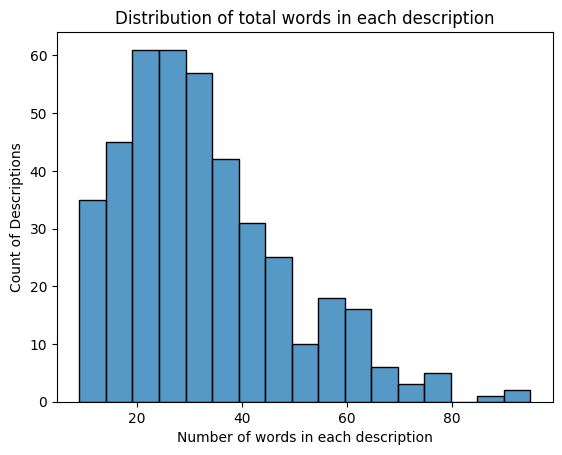

In [ ]:
# distribution of total words in each description

sns.histplot(word_analysis_pd['count_of_words'])
plt.xlabel('Number of words in each description')
plt.ylabel('Count of Descriptions')
plt.title('Distribution of total words in each description')
plt.show()

From above visualization, we can say that most of the cleaned descriptions have a length between 20-40 words.

#### WORD CLOUDS

We will create wordclouds for accident descriptions with respect to the Accident Level. This will give us relevant words that appear the most in descriptions related with different Accident levels.

In [ ]:
# Importing WordCloud and STOPWORDS

from wordcloud import WordCloud, STOPWORDS

#Making a copy of original dataframe
df_wc = data.copy()

def get_cloud_for_level(accident_level):
  comment_words = ''
  stopwords = set(STOPWORDS)

  # iterate through the csv file
  for val in df_wc[df_wc['Accident Level']==accident_level]['Description_final']:

    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
      tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

  wordcloud = WordCloud(width = 800, height = 800,
          background_color ='white',
          stopwords = stopwords,
          min_font_size = 10).generate(comment_words)

  # plot the WordCloud image
  plt.figure(figsize = (8, 8), facecolor = None)
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout(pad = 0)
  plt.title('Word Cloud for Accident Level '+str(accident_level))
  print("\n")
  plt.show()


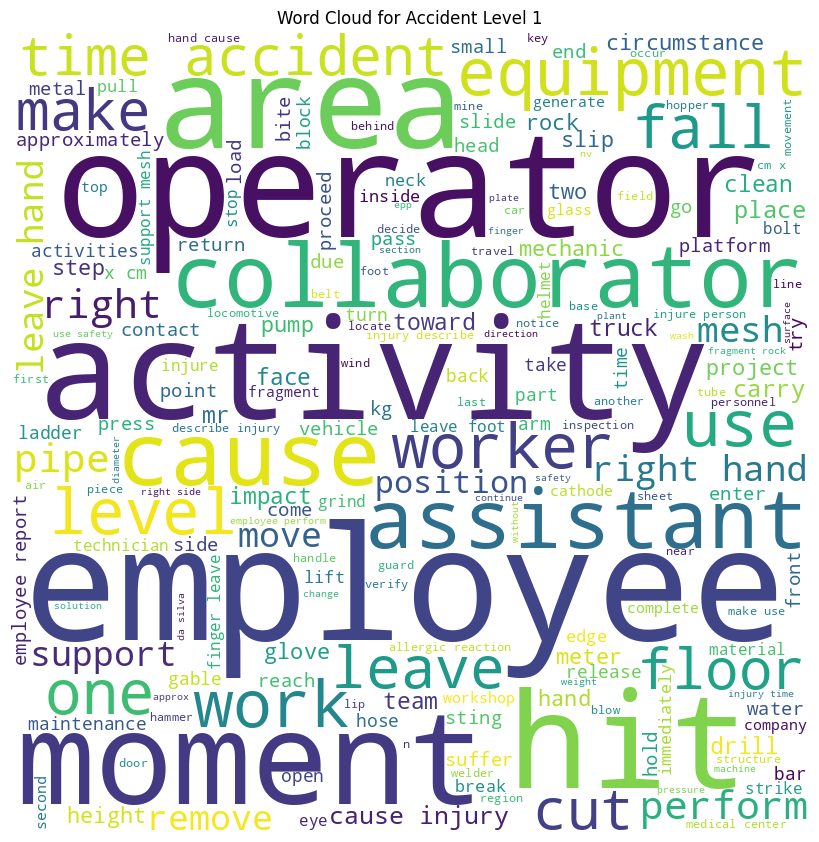

In [ ]:
get_cloud_for_level(accident_level=1)


* Above Word Cloud gives us the information about how frequently the words appear in the descriptions related to Accident level 1.

* We can see that relevant words that are most repeated in these accident descriptions are 'employee', 'equipment', 'operator', 'fall' and 'hit'.

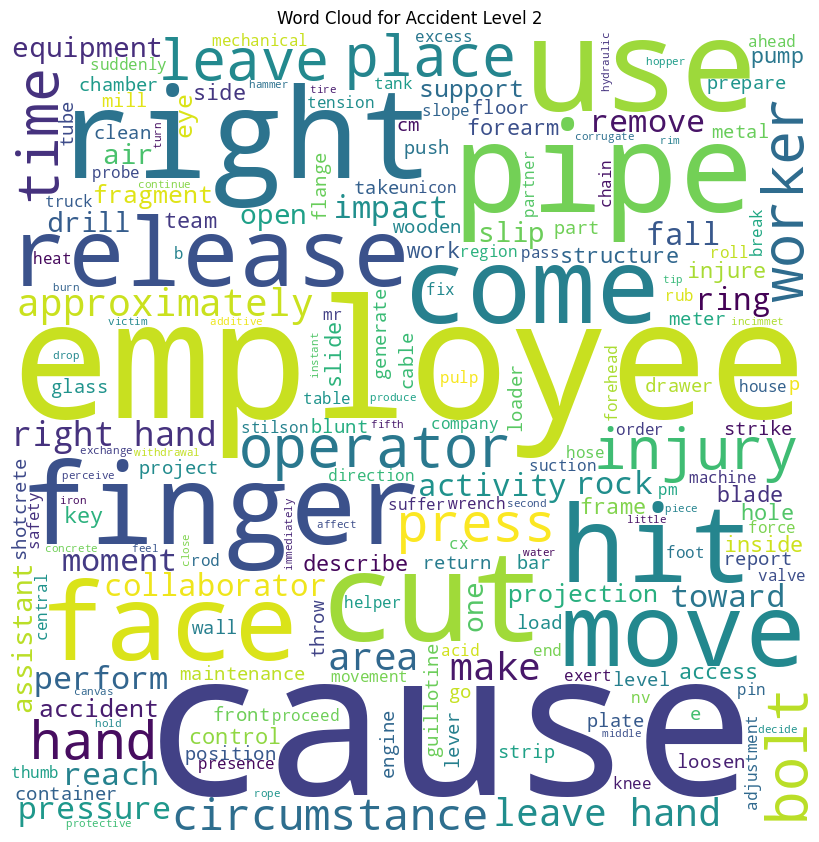

In [ ]:
get_cloud_for_level(accident_level=2)


* Above Word Cloud gives us the information about how frequently the words appear in the descriptions related to Accident level 2.

* Relevant words that are most repeated in these accident descriptions are 'cause', 'cut', 'hit', 'finger' and  'injury'.

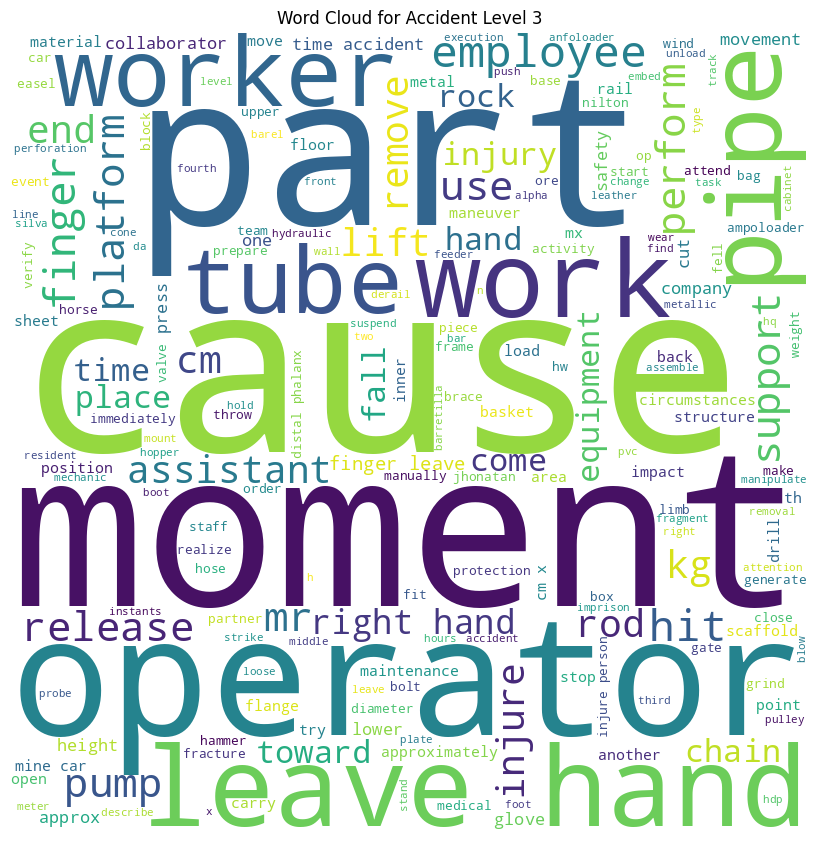

In [ ]:
get_cloud_for_level(accident_level=3)


* Above Word Cloud gives us the information about how frequently the words appear in the descriptions related to Accident level 3.

* Relevant words that are most repeated in these accident descriptions are 'worker', 'hand', 'pipe', 'tube' and 'injure'.

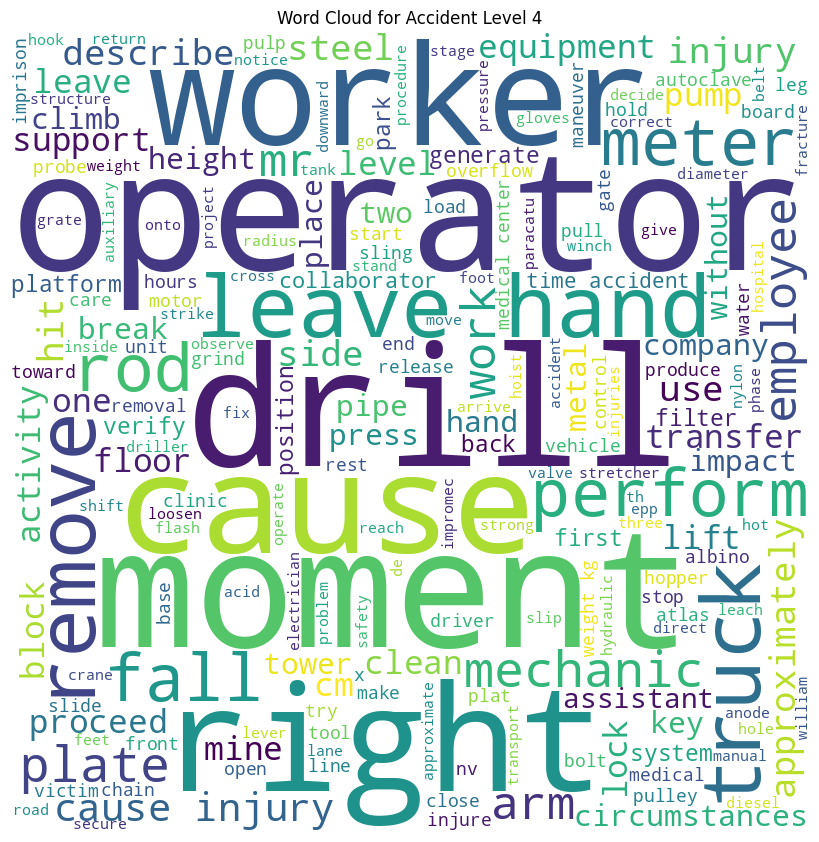

In [ ]:
get_cloud_for_level(accident_level=4)


* Above Word Cloud gives us the information about how frequently the words appear in the descriptions related to Accident level 4.

* Relevant words that are most repeated in these accident descriptions are 'drill', 'operator', 'fall', 'truck' and 'rod'.

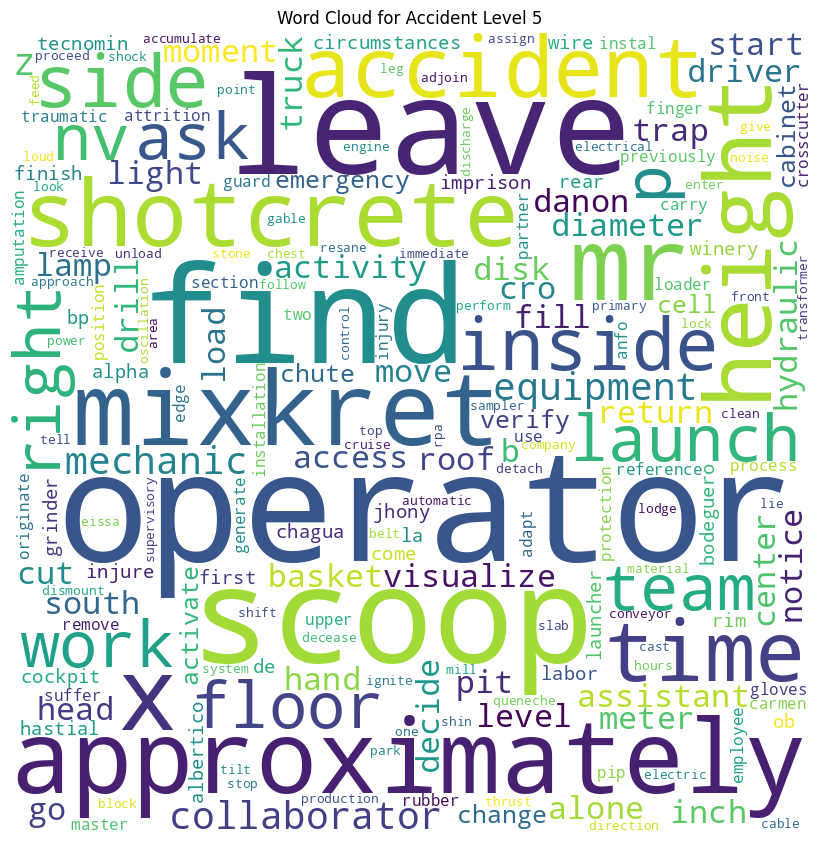

In [ ]:
get_cloud_for_level(accident_level=5)

* Above Word Cloud gives us the information about how frequently the words appear in the descriptions related to Accident level 5.

* Relevant words that are most repeated in these accident descriptions are 'shotcrete', 'mixkret', 'scoop', 'height' and 'accident'.

In [ ]:
# Creating an instance of Word2Vec
# vec_size = 300
# model_W2V = Word2Vec(words_list, vector_size = vec_size, min_count = 1, window=5, workers = 6)

In [ ]:
# Checking the size of the vocabulary
print("Length of the vocabulary is", len(list(model_W2V.key_to_index)))

Length of the vocabulary is 3000000


In [ ]:
# Checking the word embedding of a random word
word = "rod"
model_W2V[word]

array([-1.84570312e-01,  2.11914062e-01,  9.13085938e-02, -8.78906250e-02,
       -3.75000000e-01,  1.95312500e-01,  6.15234375e-02, -2.53906250e-01,
       -9.61914062e-02,  3.04687500e-01, -2.29492188e-01, -3.39355469e-02,
       -3.72314453e-03, -1.30859375e-01,  1.65039062e-01,  2.34375000e-01,
       -5.15136719e-02,  2.64892578e-02, -9.27734375e-02, -4.60937500e-01,
        2.51953125e-01, -8.69140625e-02, -1.56250000e-01,  3.43750000e-01,
        1.15722656e-01, -1.07910156e-01, -1.90429688e-01,  2.35351562e-01,
        1.39648438e-01, -1.10839844e-01, -1.18652344e-01, -4.02832031e-02,
        2.03125000e-01, -6.05468750e-02,  5.73730469e-02,  1.76757812e-01,
        9.91210938e-02,  1.42578125e-01, -1.34765625e-01, -8.85009766e-03,
        2.63671875e-01,  1.49414062e-01,  3.12500000e-01, -2.16796875e-01,
        1.20117188e-01,  1.17797852e-02,  2.96875000e-01,  1.70898438e-01,
        2.55859375e-01, -8.44726562e-02, -1.78710938e-01, -1.70898438e-01,
        3.14941406e-02, -

In [ ]:
# Retrieving the words present in the Word2Vec model's vocabulary
#words = list(model_W2V.wv.key_to_index.keys())

# Retrieving word vectors for all the words present in the model's vocabulary
#wvs = model_W2V.wv[words].tolist()

# Creating a dictionary of words and their corresponding vectors
#word_vector_dict = dict(zip(words, wvs))

In [ ]:
vec_size=model_W2V.vector_size
vec_size

300

In [ ]:
words_in_vocab = [word for word in data['Description_final'][0].split()]
print(data['Description_final'][0])
words_in_vocab

remove drill rod jumbo maintenance supervisor proceed loosen support intermediate centralizer facilitate removal see mechanic support one end drill equipment pull hand bar accelerate removal moment bar slide point support tighten finger mechanic drill bar beam jumbo


['remove',
 'drill',
 'rod',
 'jumbo',
 'maintenance',
 'supervisor',
 'proceed',
 'loosen',
 'support',
 'intermediate',
 'centralizer',
 'facilitate',
 'removal',
 'see',
 'mechanic',
 'support',
 'one',
 'end',
 'drill',
 'equipment',
 'pull',
 'hand',
 'bar',
 'accelerate',
 'removal',
 'moment',
 'bar',
 'slide',
 'point',
 'support',
 'tighten',
 'finger',
 'mechanic',
 'drill',
 'bar',
 'beam',
 'jumbo']

In [ ]:
# define a function to find the average vector for each description
def average_vectorizer_Word2Vec(doc):
    # Initializing a feature vector for the sentence
    feature_vector = np.zeros((vec_size,), dtype="float64")

    # Creating a list of words in the sentence that are present in the model vocabulary
    words_in_vocab = [word for word in doc.split()]

    # adding the vector representations of the words
    for word in words_in_vocab:
        if word in model_W2V.key_to_index:
          feature_vector += np.array(model_W2V[word])

    # Dividing by the number of words to get the average vector
    if len(words_in_vocab) != 0:
        feature_vector /= len(words_in_vocab)

    return feature_vector

In [ ]:
print(average_vectorizer_Word2Vec(data['Description_final'][0]))

[-8.25492240e-02  8.21531141e-03 -2.15206662e-02  7.28046314e-02
 -1.84345864e-01 -1.68424039e-02  3.57270112e-02 -9.34027594e-02
  1.05475348e-01  1.64444382e-02 -1.96417731e-02 -6.16158150e-02
  2.57114720e-02  7.03603384e-02 -8.74584301e-02  8.12324318e-02
  1.01437955e-02  1.89241976e-02 -3.59422838e-02 -1.32201324e-01
  1.09954009e-01  4.94038350e-02 -3.80822259e-02  8.20964092e-02
  3.90039392e-02 -4.12498680e-02 -9.34407002e-02  8.82535367e-02
  1.03386131e-01 -2.75730442e-02 -2.87844684e-02 -2.03725454e-03
  1.35786727e-02 -6.47187104e-02 -2.60248957e-02 -4.09026275e-02
  9.18818293e-02  7.53041860e-02  7.01256829e-02  2.41373423e-02
  8.55790216e-02  1.29510003e-02  1.62449192e-01 -4.93147567e-02
 -4.08572635e-02 -5.92692607e-02 -1.43849966e-01  4.13224504e-03
  5.80543312e-02  5.84436365e-02 -1.63664947e-02 -3.24179160e-02
  3.68837924e-02 -1.13917583e-01  3.61295133e-02 -1.13162479e-03
 -1.17451436e-02 -3.51162472e-02 -4.94124954e-02 -8.42681060e-02
 -1.07445794e-01 -9.41920

In [ ]:
# creating a dataframe of the vectorized documents
df_Word2Vec = pd.DataFrame(data['Description_final'].apply(average_vectorizer_Word2Vec).tolist(), columns=['Feature '+str(i) for i in range(vec_size)])
df_Word2Vec

Feature 0  Feature 1  Feature 2  Feature 3  Feature 4  Feature 5  \
0    -0.082549   0.008215  -0.021521   0.072805  -0.184346  -0.016842   
1    -0.058026  -0.019520  -0.000531   0.078392  -0.092158   0.082386   
2     0.008777   0.028349  -0.016726   0.042842  -0.098241   0.058771   
3     0.013121   0.014105  -0.011136   0.024798  -0.106941  -0.021437   
4    -0.014431   0.052682  -0.024233   0.016011  -0.042634  -0.023123   
..         ...        ...        ...        ...        ...        ...   
413  -0.018290   0.005792  -0.027228   0.070977  -0.018582  -0.033166   
414  -0.010283  -0.012708   0.007308   0.033546  -0.084101  -0.006736   
415   0.041736   0.069993  -0.027287   0.026639  -0.142258  -0.043506   
416   0.056006  -0.003998   0.026439   0.008521  -0.120642   0.007300   
417  -0.002980   0.028173  -0.039774   0.025373  -0.072407   0.021327   

     Feature 6  Feature 7  Feature 8  Feature 9  Feature 10  Feature 11  \
0     0.035727  -0.093403   0.105475   0.016444   -0.019642   -0.061616   
1    -0.009776  -0.144736   0.078408   0.082931   -0.048761   -0.088858   
2     0.053978  -0.115761   0.123685   0.081694    0.026546   -0.071693   
3     0.029204  -0.105529   0.080174   0.031981   -0.005935   -0.098021   
4     0.033076  -0.080961   0.087078   0.027841   -0.024915   -0.042600   
..         ...        ...        ...        ...         ...         ...   
413   0.072177  -0.173598   0.089857   0.009689   -0.114977   -0.064304   
414   0.066087  -0.119158   0.143508   0.063815   -0.006452   -0.106980   
415  -0.017617  -0.062148   0.077239   0.098659   -0.015895   -0.114845   
416   0.013065  -0.166760   0.142165   0.109192   -0.028954   -0.061515   
417   0.047286  -0.079147   0.094720   0.083912   -0.014610   -0.100631   

     Feature 12  Feature 13  Feature 14  Feature 15  Feature 16  Feature 17  \
0      0.025711    0.070360   -0.087458    0.081232    0.010144    0.018924   
1      0.038570    0.054443   -0.081006    0.087176    0.017445    0.082865   
2      0.054650   -0.004760   -0.077176    0.043406   -0.040004    0.007087   
3     -0.028543    0.090423   -0.116308    0.080398   -0.017734    0.087420   
4     -0.005321    0.062441   -0.013391    0.050606   -0.008711    0.092979   
..          ...         ...         ...         ...         ...         ...   
413   -0.030336    0.080073   -0.039403    0.054988   -0.033054    0.070353   
414    0.056978    0.040779   -0.073492    0.092845    0.067272    0.014455   
415    0.038486    0.029831   -0.058792    0.055772   -0.060332    0.051914   
416    0.008342    0.045412   -0.088205    0.055938   -0.029821    0.044139   
417    0.059919    0.061941   -0.108784    0.056910    0.096885    0.033576   

     Feature 18  Feature 19  Feature 20  Feature 21  Feature 22  Feature 23  \
0     -0.035942   -0.132201    0.109954    0.049404   -0.038082    0.082096   
1     -0.011931   -0.051713    0.041463    0.018453    0.014394    0.012084   
2      0.010058   -0.092744    0.036484    0.071516   -0.005828    0.050482   
3     -0.011085   -0.064912    0.046601    0.046301    0.018185    0.107382   
4     -0.020145   -0.088831   -0.015699   -0.017012   -0.017974    0.056581   
..          ...         ...         ...         ...         ...         ...   
413    0.018487   -0.030120    0.011987   -0.018785   -0.002984    0.049713   
414    0.014699   -0.077959    0.048154    0.070859    0.075346    0.059873   
415    0.039988   -0.048646   -0.014387    0.025106   -0.020094   -0.014744   
416    0.052081   -0.061554    0.057739    0.003564   -0.026642    0.041742   
417    0.056618   -0.026684    0.054623    0.059390    0.006155    0.039236   

     Feature 24  Feature 25  Feature 26  Feature 27  Feature 28  Feature 29  \
0      0.039004   -0.041250   -0.093441    0.088254    0.103386   -0.027573   
1      0.038980   -0.031259   -0.168695    0.059595    0.005310   -0.099511   
2     -0.002900   -0.076676   -0.089122   -0.009094    0.044666   -0.076574   
3      0.0137

#### Feature Selection
We will drop a few columns which will not contribute to the model predictions: Date, Country, Local, Potential Accident Level

In [ ]:
# Dropping the columns which are not relevant to the prediction from our models: Date, Country, Local, Potential Accident Level
data = data.drop(['Date', 'Countries', 'Local', 'Potential Accident Level'], axis=1)


In [ ]:
# Checking few samples of dataframe
data

Industry Sector  Accident Level  Gender Employee or Third Party  \
0            Mining               1    Male             Third Party   
1            Mining               1    Male                Employee   
2            Mining               1    Male    Third Party (Remote)   
3            Mining               1    Male             Third Party   
4            Mining               4    Male             Third Party   
..              ...             ...     ...                     ...   
413          Mining               1    Male             Third Party   
414          Mining               1  Female                Employee   
415          Metals               1    Male                Employee   
416          Metals               1    Male                Employee   
417          Mining               1  Female             Third Party   

                    Critical Risk  \
0                         Pressed   
1             Pressurized Systems   
2                    Manual Tools   
3                          Others   
4                          Others   
..                            ...   
413                        Others   
414                        Others   
415              Venomous Animals   
416                           Cut   
417  Fall Prevention (Same Level)   

                                                                                                                                                                                                                                                                                                                                   Description_final  
0                                                                         remove drill rod jumbo maintenance supervisor proceed loosen support intermediate centralizer facilitate removal see mechanic support one end drill equipment pull hand bar accelerate removal moment bar slide point support tighten finger mechanic drill bar beam jumbo  
1                                                                                                                                              activation sodium sulphide pump pip uncouple sulfide solution design area reach maid immediately make use emergency shower direct ambulatory doctor later hospital note sulphide solution grams liter  
2                                                                                                                                                           sub station milpo locate level collaborator excavation work pick hand tool hit rock flat part beak bounce hit steel tip safety shoe metatarsal area leave foot collaborator cause injury  
3    approximately nv cx ob personnel begin task unlock soquet bolt bhb machine penultimate bolt identify hexagonal head wear proceed mr crist bal auxiliary assistant climb platform exert pressure hand dado key prevent come bolt moments two collaborators rotate lever anti clockwise direction leave key bolt hit palm leave hand cause injury  
4                                                approximately circumstances mechanics anthony group leader eduardo eric fern ndez injure three company impromec perform removal pulley motor pump zaf marcy cm length cm weight kg lock proceed heat pulley loosen come fall distance meter high hit instep right foot worker cause injury describe  
..                                                                                                                                                                                                                                                                                                                                               ...  
413                                                                                                                                                                                                                 approximately approximately lift kelly hq towards pulley frame align assistant marco later on

In [ ]:
# Creating a new data frame from all the columns except Description (because we already have vector embeddings for Description)
df_non_vec = data.iloc[:, :-1]

In [ ]:
df_non_vec.head()

Industry Sector  Accident Level Gender Employee or Third Party  \
0          Mining               1   Male             Third Party   
1          Mining               1   Male                Employee   
2          Mining               1   Male    Third Party (Remote)   
3          Mining               1   Male             Third Party   
4          Mining               4   Male             Third Party   

         Critical Risk  
0              Pressed  
1  Pressurized Systems  
2         Manual Tools  
3               Others  
4               Others

In [ ]:
# Concatenating the data_non_vec with the vectorized descriptions (df_Word2Vec)

df_combined = pd.concat([df_non_vec,df_Word2Vec], axis=1)


In [ ]:
# Checking few samples of combined dataframe
df_combined.head()

Industry Sector  Accident Level Gender Employee or Third Party  \
0          Mining               1   Male             Third Party   
1          Mining               1   Male                Employee   
2          Mining               1   Male    Third Party (Remote)   
3          Mining               1   Male             Third Party   
4          Mining               4   Male             Third Party   

         Critical Risk  Feature 0  Feature 1  Feature 2  Feature 3  Feature 4  \
0              Pressed  -0.082549   0.008215  -0.021521   0.072805  -0.184346   
1  Pressurized Systems  -0.058026  -0.019520  -0.000531   0.078392  -0.092158   
2         Manual Tools   0.008777   0.028349  -0.016726   0.042842  -0.098241   
3               Others   0.013121   0.014105  -0.011136   0.024798  -0.106941   
4               Others  -0.014431   0.052682  -0.024233   0.016011  -0.042634   

   Feature 5  Feature 6  Feature 7  Feature 8  Feature 9  Feature 10  \
0  -0.016842   0.035727  -0.093403   0.105475   0.016444   -0.019642   
1   0.082386  -0.009776  -0.144736   0.078408   0.082931   -0.048761   
2   0.058771   0.053978  -0.115761   0.123685   0.081694    0.026546   
3  -0.021437   0.029204  -0.105529   0.080174   0.031981   -0.005935   
4  -0.023123   0.033076  -0.080961   0.087078   0.027841   -0.024915   

   Feature 11  Feature 12  Feature 13  Feature 14  Feature 15  Feature 16  \
0   -0.061616    0.025711    0.070360   -0.087458    0.081232    0.010144   
1   -0.088858    0.038570    0.054443   -0.081006    0.087176    0.017445   
2   -0.071693    0.054650   -0.004760   -0.077176    0.043406   -0.040004   
3   -0.098021   -0.028543    0.090423   -0.116308    0.080398   -0.017734   
4   -0.042600   -0.005321    0.062441   -0.013391    0.050606   -0.008711   

   Feature 17  Feature 18  Feature 19  Feature 20  Feature 21  Feature 22  \
0    0.018924   -0.035942   -0.132201    0.109954    0.049404   -0.038082   
1    0.082865   -0.011931   -0.051713    0.041463    0.018453    0.014394   
2    0.007087    0.010058   -0.092744    0.036484    0.071516   -0.005828   
3    0.087420   -0.011085   -0.064912    0.046601    0.046301    0.018185   
4    0.092979   -0.020145   -0.088831   -0.015699   -0.017012   -0.017974   

   Feature 23  Feature 24  Feature 25  Feature 26  Feature 27  Feature 28  \
0    0.082096    0.039004   -0.041250   -0.093441    0.088254    0.103386   
1    0.012084    0.038980   -0.031259   -0.168695    0.059595    0.005310   
2    0.050482   -0.002900   -0.076676   -0.089122   -0.009094    0.044666   
3    0.107382    0.013763   -0.059945   -0.078009    0.051824    0.010073   
4    0.056581    0.012660   -0.128687   -0.132356    0.090720    0.046612   

   Feature 29  Feature 30  Feature 31  Feature 32  Feature 33  Feature 34  \
0   -0.027573   -0.028784   -0.002037    0.013579   -0.064719   -0.026025   
1   -0.099511   -0.040374   -0.002858   -0.016811   -0.025898   -0.114107   
2   -0.076574   -0.056948   -0.001807    0.031747   -0.038930   -0.031138   
3   -0.046660    0.000822   -0.022886    0.001041   -0.026046   -0.044222   
4   -0.094682   -0.028360    0.000290    0.058921   -0.028608   -0.060722   

   Feature 35  Feature 36  Feature 37  Feature 38  Feature 39  Feature 40  \
0   -0.040903    0.091882    0.075304    0.070126    0.024137    0.085579   
1   -0.074971    0.107357    0.053017    0.015919    0.045171    0.013971   
2   -0.040544    0.007492    0.062035    0.035284    0.044808    0.052650   
3   -0.069796    0.005686    0.061993   -0.021125    0.003079    0.064703   
4   -0.052822    0.012650    0.042876   -0.052236    0.037059    0.034469   

   Feature 41  Feature 42  Feature 43  Feature 44  Feature 45  Feature 46  \
0    0.012951    0.162449   -0.049315   -0.040857   -0.059269   -0.143850   
1    0.023003    0.102693   -0.016226   -0.070548   -0.158818   -0.112828   
2   -0.023922    0.078752   -0.002736   -0.056223   -0.069664   -0.055437   
3   -0.046894    0.103967   -0.033350   -0.016473 

In [ ]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Columns: 305 entries, Industry Sector to Feature 299
dtypes: float64(300), int64(1), object(4)
memory usage: 996.1+ KB


* Dataframe df_combined contains 4 categorical columns, one integer column, 300 vector embedded columns (which were created for text description), and the target column 'Accident Level'

### Data Preparation and model building

In [ ]:
# getting a list of category columns to be converted to numerical later using OHE method
category_columns = df_combined.select_dtypes(['object', 'category']).columns.to_list()
category_columns

['Industry Sector', 'Gender', 'Employee or Third Party', 'Critical Risk']

In [ ]:
# creating dummy variables for categorical features (using OneHotEncoding method)
#df_combined = pd.get_dummies(df_combined, columns=category_columns, drop_first=True)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

oneHotEncoder=OneHotEncoder()
category_column_array=oneHotEncoder.fit_transform(df_combined[category_columns])

In [ ]:
category_column_array

<418x27 sparse matrix of type '<class 'numpy.float64'>'
	with 1672 stored elements in Compressed Sparse Row format>

In [ ]:
df_cat_onehot=pd.DataFrame(category_column_array.toarray(),columns=oneHotEncoder.get_feature_names_out())
df_cat_onehot

Industry Sector_Metals  Industry Sector_Mining  Industry Sector_Others  \
0                       0.0                     1.0                     0.0   
1                       0.0                     1.0                     0.0   
2                       0.0                     1.0                     0.0   
3                       0.0                     1.0                     0.0   
4                       0.0                     1.0                     0.0   
..                      ...                     ...                     ...   
413                     0.0                     1.0                     0.0   
414                     0.0                     1.0                     0.0   
415                     1.0                     0.0                     0.0   
416                     1.0                     0.0                     0.0   
417                     0.0                     1.0                     0.0   

     Gender_Female  Gender_Male  Employee or Third Party_Employee  \
0              0.0          1.0                               0.0   
1              0.0          1.0                               1.0   
2              0.0          1.0                               0.0   
3              0.0          1.0                               0.0   
4              0.0          1.0                               0.0   
..             ...          ...                               ...   
413            0.0          1.0                               0.0   
414            1.0          0.0                               1.0   
415            0.0          1.0                               1.0   
416            0.0          1.0                               1.0   
417            1.0          0.0                               0.0   

     Employee or Third Party_Third Party  \
0                                    1.0   
1                                    0.0   
2                                    0.0   
3                                    1.0   
4                                    1.0   
..                                   ...   
413                                  1.0   
414                                  0.0   
415                                  0.0   
416                                  0.0   
417                                  1.0   

     Employee or Third Party_Third Party (Remote)  Critical Risk_Bees  \
0                                             0.0                 0.0   
1                                             0.0                 0.0   
2                                             1.0                 0.0   
3                                             0.0                 0.0   
4                                             0.0                 0.0   
..                                            ...                 ...   
413                                           0.0                 0.0   
414                                           0.0                 0.0   
415                                           0.0                 0.0   
416                                           0.0                 0.0   
417                                           0.0                 0.0   

     Critical Risk_Blocking And Isolation Of Energies  \
0                                                 0.0   
1                                                 0.0   
2                                                 0.0   
3                                                 0.0   
4                                                 0.0   
..                                                ...   
413                                               0.0   
414                                               0.0   
415                                               0.0   
416                                               0.0   
417                                               0.0   

     Critical Risk_Chemical Substances  Critical Risk_Cut  Critical Risk_Fall  \
0                                  0.0                0

In [ ]:
df_combined=pd.concat([df_combined.drop(columns=category_columns),df_cat_onehot],axis=1)

In [ ]:
# checking few samples
df_combined.head()

Accident Level  Feature 0  Feature 1  Feature 2  Feature 3  Feature 4  \
0               1  -0.082549   0.008215  -0.021521   0.072805  -0.184346   
1               1  -0.058026  -0.019520  -0.000531   0.078392  -0.092158   
2               1   0.008777   0.028349  -0.016726   0.042842  -0.098241   
3               1   0.013121   0.014105  -0.011136   0.024798  -0.106941   
4               4  -0.014431   0.052682  -0.024233   0.016011  -0.042634   

   Feature 5  Feature 6  Feature 7  Feature 8  Feature 9  Feature 10  \
0  -0.016842   0.035727  -0.093403   0.105475   0.016444   -0.019642   
1   0.082386  -0.009776  -0.144736   0.078408   0.082931   -0.048761   
2   0.058771   0.053978  -0.115761   0.123685   0.081694    0.026546   
3  -0.021437   0.029204  -0.105529   0.080174   0.031981   -0.005935   
4  -0.023123   0.033076  -0.080961   0.087078   0.027841   -0.024915   

   Feature 11  Feature 12  Feature 13  Feature 14  Feature 15  Feature 16  \
0   -0.061616    0.025711    0.070360   -0.087458    0.081232    0.010144   
1   -0.088858    0.038570    0.054443   -0.081006    0.087176    0.017445   
2   -0.071693    0.054650   -0.004760   -0.077176    0.043406   -0.040004   
3   -0.098021   -0.028543    0.090423   -0.116308    0.080398   -0.017734   
4   -0.042600   -0.005321    0.062441   -0.013391    0.050606   -0.008711   

   Feature 17  Feature 18  Feature 19  Feature 20  Feature 21  Feature 22  \
0    0.018924   -0.035942   -0.132201    0.109954    0.049404   -0.038082   
1    0.082865   -0.011931   -0.051713    0.041463    0.018453    0.014394   
2    0.007087    0.010058   -0.092744    0.036484    0.071516   -0.005828   
3    0.087420   -0.011085   -0.064912    0.046601    0.046301    0.018185   
4    0.092979   -0.020145   -0.088831   -0.015699   -0.017012   -0.017974   

   Feature 23  Feature 24  Feature 25  Feature 26  Feature 27  Feature 28  \
0    0.082096    0.039004   -0.041250   -0.093441    0.088254    0.103386   
1    0.012084    0.038980   -0.031259   -0.168695    0.059595    0.005310   
2    0.050482   -0.002900   -0.076676   -0.089122   -0.009094    0.044666   
3    0.107382    0.013763   -0.059945   -0.078009    0.051824    0.010073   
4    0.056581    0.012660   -0.128687   -0.132356    0.090720    0.046612   

   Feature 29  Feature 30  Feature 31  Feature 32  Feature 33  Feature 34  \
0   -0.027573   -0.028784   -0.002037    0.013579   -0.064719   -0.026025   
1   -0.099511   -0.040374   -0.002858   -0.016811   -0.025898   -0.114107   
2   -0.076574   -0.056948   -0.001807    0.031747   -0.038930   -0.031138   
3   -0.046660    0.000822   -0.022886    0.001041   -0.026046   -0.044222   
4   -0.094682   -0.028360    0.000290    0.058921   -0.028608   -0.060722   

   Feature 35  Feature 36  Feature 37  Feature 38  Feature 39  Feature 40  \
0   -0.040903    0.091882    0.075304    0.070126    0.024137    0.085579   
1   -0.074971    0.107357    0.053017    0.015919    0.045171    0.013971   
2   -0.040544    0.007492    0.062035    0.035284    0.044808    0.052650   
3   -0.069796    0.005686    0.061993   -0.021125    0.003079    0.064703   
4   -0.052822    0.012650    0.042876   -0.052236    0.037059    0.034469   

   Feature 41  Feature 42  Feature 43  Feature 44  Feature 45  Feature 46  \
0    0.012951    0.162449   -0.049315   -0.040857   -0.059269   -0.143850   
1    0.023003    0.102693   -0.016226   -0.070548   -0.158818   -0.112828   
2   -0.023922    0.078752   -0.002736   -0.056223   -0.069664   -0.055437   
3   -0.046894    0.103967   -0.033350   -0.016473   -0.083078   -0.041171   
4   -0.031946    0.134551   -0.020424   -0.045638   -0.060403   -0.038550   

   Feature 47  Feature 48  Feature 49  Feature 50  Feature 51  Feature 52  \
0    0.004132    0.058054    0.058444   -0.016366   -0.032418    0.036884   
1    0.027971   -0.093463    0.042252   -0.016039   -0.108459   -0.081208   
2   -0.008973    0.071090    0.046137   -0.023142    0.010205    0.000829   
3   -0.053108    0.054325  

We have successfully encoded categorical features into numerical using OneHotEncoding method.

In [ ]:
# Separating features and target variable from the dataset
X = df_combined.drop(columns='Accident Level', axis=1)
y = df_combined['Accident Level']

In [ ]:
X

Feature 0  Feature 1  Feature 2  Feature 3  Feature 4  Feature 5  \
0    -0.082549   0.008215  -0.021521   0.072805  -0.184346  -0.016842   
1    -0.058026  -0.019520  -0.000531   0.078392  -0.092158   0.082386   
2     0.008777   0.028349  -0.016726   0.042842  -0.098241   0.058771   
3     0.013121   0.014105  -0.011136   0.024798  -0.106941  -0.021437   
4    -0.014431   0.052682  -0.024233   0.016011  -0.042634  -0.023123   
..         ...        ...        ...        ...        ...        ...   
413  -0.018290   0.005792  -0.027228   0.070977  -0.018582  -0.033166   
414  -0.010283  -0.012708   0.007308   0.033546  -0.084101  -0.006736   
415   0.041736   0.069993  -0.027287   0.026639  -0.142258  -0.043506   
416   0.056006  -0.003998   0.026439   0.008521  -0.120642   0.007300   
417  -0.002980   0.028173  -0.039774   0.025373  -0.072407   0.021327   

     Feature 6  Feature 7  Feature 8  Feature 9  Feature 10  Feature 11  \
0     0.035727  -0.093403   0.105475   0.016444   -0.019642   -0.061616   
1    -0.009776  -0.144736   0.078408   0.082931   -0.048761   -0.088858   
2     0.053978  -0.115761   0.123685   0.081694    0.026546   -0.071693   
3     0.029204  -0.105529   0.080174   0.031981   -0.005935   -0.098021   
4     0.033076  -0.080961   0.087078   0.027841   -0.024915   -0.042600   
..         ...        ...        ...        ...         ...         ...   
413   0.072177  -0.173598   0.089857   0.009689   -0.114977   -0.064304   
414   0.066087  -0.119158   0.143508   0.063815   -0.006452   -0.106980   
415  -0.017617  -0.062148   0.077239   0.098659   -0.015895   -0.114845   
416   0.013065  -0.166760   0.142165   0.109192   -0.028954   -0.061515   
417   0.047286  -0.079147   0.094720   0.083912   -0.014610   -0.100631   

     Feature 12  Feature 13  Feature 14  Feature 15  Feature 16  Feature 17  \
0      0.025711    0.070360   -0.087458    0.081232    0.010144    0.018924   
1      0.038570    0.054443   -0.081006    0.087176    0.017445    0.082865   
2      0.054650   -0.004760   -0.077176    0.043406   -0.040004    0.007087   
3     -0.028543    0.090423   -0.116308    0.080398   -0.017734    0.087420   
4     -0.005321    0.062441   -0.013391    0.050606   -0.008711    0.092979   
..          ...         ...         ...         ...         ...         ...   
413   -0.030336    0.080073   -0.039403    0.054988   -0.033054    0.070353   
414    0.056978    0.040779   -0.073492    0.092845    0.067272    0.014455   
415    0.038486    0.029831   -0.058792    0.055772   -0.060332    0.051914   
416    0.008342    0.045412   -0.088205    0.055938   -0.029821    0.044139   
417    0.059919    0.061941   -0.108784    0.056910    0.096885    0.033576   

     Feature 18  Feature 19  Feature 20  Feature 21  Feature 22  Feature 23  \
0     -0.035942   -0.132201    0.109954    0.049404   -0.038082    0.082096   
1     -0.011931   -0.051713    0.041463    0.018453    0.014394    0.012084   
2      0.010058   -0.092744    0.036484    0.071516   -0.005828    0.050482   
3     -0.011085   -0.064912    0.046601    0.046301    0.018185    0.107382   
4     -0.020145   -0.088831   -0.015699   -0.017012   -0.017974    0.056581   
..          ...         ...         ...         ...         ...         ...   
413    0.018487   -0.030120    0.011987   -0.018785   -0.002984    0.049713   
414    0.014699   -0.077959    0.048154    0.070859    0.075346    0.059873   
415    0.039988   -0.048646   -0.014387    0.025106   -0.020094   -0.014744   
416    0.052081   -0.061554    0.057739    0.003564   -0.026642    0.041742   
417    0.056618   -0.026684    0.054623    0.059390    0.006155    0.039236   

     Feature 24  Feature 25  Feature 26  Feature 27  Feature 28  Feature 29  \
0      0.039004   -0.041250   -0.093441    0.088254    0.103386   -0.027573   
1      0.038980   -0.031259   -0.168695    0.059595    0.005310   -0.099511   
2     -0.002900   -0.076676   -0.089122   -0.009094    0.044666   -0.076574   
3      0.0137

In [ ]:
y

0      1
1      1
2      1
3      1
4      4
      ..
413    1
414    1
415    1
416    1
417    1
Name: Accident Level, Length: 418, dtype: int64

Data separated into features and target variables successfully.

### Split data into train and test. Keep 20% data reserved for testing.

In [ ]:
# splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
X_train.shape

(334, 327)

In [ ]:
X_test.shape

(84, 327)

In [ ]:
# checking if train-test split is in required ratios 80:20
print('Percentage of rows in Training data:', len(X_train)/len(X)*100)
print()
print('Percentage of rows in Testing data:', len(X_test)/len(X)*100)

Percentage of rows in Training data: 79.90430622009569

Percentage of rows in Testing data: 20.095693779904305


**So, train-test split is in required ratios.**

### Scale the data

In [ ]:
# before building the model, we need to scale the data.

# create StandardScaler object
scaler = StandardScaler()

# Fit_transform on train data
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)

# transform on test data
X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)


In [ ]:
# verify if data is scaled
X_train_scaled.head()

Feature 0  Feature 1  Feature 2  Feature 3  Feature 4  Feature 5  \
0   0.139292  -0.265754   0.875797  -1.127198   0.765349   0.025292   
1  -0.258459  -0.845960  -0.203894  -0.069304   0.302065   0.565383   
2   0.633183  -0.766568   0.860621  -1.842442   0.196103  -1.870560   
3  -0.309811  -0.803441  -1.166631   0.886412  -0.477970   0.527777   
4   2.043157  -0.510061  -2.412291   0.044927  -0.164870  -0.339124   

   Feature 6  Feature 7  Feature 8  Feature 9  Feature 10  Feature 11  \
0  -0.818987  -0.406204  -1.154182  -1.114986    0.372293    1.528233   
1   0.805880  -0.739217   0.775850  -1.022189   -0.200637    0.287860   
2   0.332359  -0.693512   0.257508   1.557281    1.773614    0.104263   
3   1.131313   0.162185   0.725497  -0.424091   -0.163793    0.924025   
4   1.490183   1.314308  -0.236670  -0.401795    0.164873    1.183976   

   Feature 12  Feature 13  Feature 14  Feature 15  Feature 16  Feature 17  \
0    0.383473    0.220573    0.581968   -0.647716    0.836846   -1.314412   
1   -0.499880    0.848567   -1.746160   -0.149656    1.337650   -0.115278   
2    0.324880   -1.083826   -0.967809   -0.638789    0.093973    0.282167   
3   -0.189668    1.761917    0.464459    1.101737   -0.795378    2.181650   
4   -0.127286   -2.589013    0.625927   -0.354013   -1.787051   -1.054929   

   Feature 18  Feature 19  Feature 20  Feature 21  Feature 22  Feature 23  \
0    0.734584   -0.228611    1.223048   -0.176933   -0.620724    0.226000   
1   -0.033639    0.141621   -0.310161   -0.319925    0.327443    0.472221   
2    0.779226    0.563279   -0.948035    1.080041   -1.783528    0.439573   
3   -1.032870   -1.699661   -1.899069   -1.037284   -0.089492   -0.415915   
4   -1.273853   -0.164379    0.575436   -0.312416   -1.737922   -0.582618   

   Feature 24  Feature 25  Feature 26  Feature 27  Feature 28  Feature 29  \
0   -0.097169   -0.472406   -0.024130   -0.610982   -0.633590   -0.451630   
1    0.132415    0.158837    1.175430   -1.092459   -0.941617    0.641584   
2    0.313995    0.144741   -0.838203    0.401827   -0.136833   -2.513840   
3   -1.820721   -0.908548   -0.816400    1.002685   -0.066571   -0.381804   
4   -0.866812    1.364869    1.010567    1.009335   -2.164636    1.706484   

   Feature 30  Feature 31  Feature 32  Feature 33  Feature 34  Feature 35  \
0    0.848771    1.055370    1.332906    0.510289    1.482053   -0.439565   
1    0.600161    0.900298   -0.248188    1.319478    0.626929   -0.078738   
2    0.068958    0.018538    0.567620   -0.417357   -0.453686   -2.298656   
3   -1.171046    0.114660    1.674125    0.006432   -0.430294    0.744630   
4    0.293948    0.463340   -0.303060    1.192221    2.447300    0.914578   

   Feature 36  Feature 37  Feature 38  Feature 39  Feature 40  Feature 41  \
0   -0.397228    0.478132   -0.663061   -0.894822   -0.719329   -1.396104   
1   -0.118573   -0.167125   -0.168316   -0.029718   -0.517687   -1.030215   
2    0.873401    0.280770   -0.968281   -0.702808   -0.570092    0.826331   
3   -1.055277    0.841071   -0.558473    0.209987    0.403988   -0.156101   
4    0.659697    1.149011   -0.496623    0.291214   -0.708124    3.065865   

   Feature 42  Feature 43  Feature 44  Feature 45  Feature 46  Feature 47  \
0   -1.264620   -0.411497   -1.763865    0.382358   -0.451853    0.052343   
1    0.967501    0.351061    0.484594    0.597295    0.085246    0.770299   
2    0.748929   -0.628455   -0.498052   -0.971934    0.317851    0.499538   
3   -0.382810    0.858854    0.066649    0.863292    0.335303   -0.113147   
4    0.885121    0.242718    1.472545   -0.332593   -0.262779    0.082292   

   Feature 48  Feature 49  Feature 50  Feature 51  Feature 52  Feature 53  \
0   -0.595147    1.779929    0.344857    0.522843   -0.812050    0.568383   
1   -0.753418    0.045522   -0.359833    0.339537   -0.122497   -1.250353   
2    0.361577    1.123590    0.611858    1.093824    0.272574    0.221383   
3    0.749912   -0.666135   -1.255032    0.861276  

In [ ]:
X_test_scaled.head()

Feature 0  Feature 1  Feature 2  Feature 3  Feature 4  Feature 5  \
0   1.600138  -0.400105  -0.257398  -1.397754  -0.297369   1.771986   
1  -1.301851   0.357315  -0.884525   2.108595  -1.709691   0.144175   
2   1.530464  -0.361057   1.919086  -0.619543   1.120086  -0.166791   
3  -0.767276   0.734579   0.193029   0.582224  -0.472726  -0.177451   
4  -2.080392  -1.067791   1.501034   0.380693   0.596910   0.377944   

   Feature 6  Feature 7  Feature 8  Feature 9  Feature 10  Feature 11  \
0   1.840970  -2.197956   0.263005  -1.723853   -0.210714   -0.743313   
1  -0.509437  -1.101050   0.516997   0.534637   -1.164219    0.544373   
2   0.148267  -2.630451  -0.003561  -2.764278    1.573355   -0.413915   
3   0.246175   1.168419  -0.634016  -2.184772    0.098893    1.344440   
4  -0.505540   1.770422  -0.959873  -1.488792   -0.859754   -0.336040   

   Feature 12  Feature 13  Feature 14  Feature 15  Feature 16  Feature 17  \
0    0.096741    0.917731    0.587595    1.646282    0.400806   -0.846523   
1   -0.485868    1.423287   -0.845206    1.105692   -0.915176   -0.493758   
2    0.108807    0.229246   -0.415143   -0.164604    1.620108    0.056433   
3    0.316609   -1.148944    0.358538    0.069519   -1.150344    0.338567   
4    0.989575   -1.109477    0.889398   -0.068053   -1.338359   -2.115825   

   Feature 18  Feature 19  Feature 20  Feature 21  Feature 22  Feature 23  \
0   -1.013774   -1.367024   -0.965177    0.672506    1.618658    0.763825   
1   -0.699431    0.160865    0.487099    2.000546    0.743520    0.190672   
2    1.781616    0.638670    0.688442    0.654228    0.934839    1.470992   
3   -0.100733   -0.512233   -0.039527   -0.711355   -0.453393    0.516432   
4    0.401664    1.749249    0.898320    0.497337   -0.316152    0.221130   

   Feature 24  Feature 25  Feature 26  Feature 27  Feature 28  Feature 29  \
0   -1.268244   -1.298935    1.131601   -2.630306   -1.372507   -0.183930   
1   -0.877224    0.915851   -0.512017    0.321166    0.090166   -0.004653   
2   -0.160917    0.642800    2.265187   -0.596702    0.659120   -0.340010   
3    0.378637    0.386471   -1.541451    1.313251    1.908251    0.568496   
4    0.212052    1.055419   -0.427816   -0.229456    0.008477   -0.132973   

   Feature 30  Feature 31  Feature 32  Feature 33  Feature 34  Feature 35  \
0   -0.815939    1.416227    0.253477    0.621596   -0.310305    0.446998   
1    0.172711   -0.651384   -0.851172   -0.836420   -1.933156   -0.962530   
2    2.067887   -0.579182   -0.686883   -0.842307   -0.785740   -0.515292   
3   -2.949067    0.045540    1.079787   -0.446294   -0.553203   -1.208092   
4    0.287491   -2.272111   -1.493413   -1.410846   -0.409407   -0.601985   

   Feature 36  Feature 37  Feature 38  Feature 39  Feature 40  Feature 41  \
0   -0.287093    1.546258    1.216519   -1.620299   -0.038428    0.846949   
1    0.191668    0.235162    0.100992    0.487815    0.599697   -0.688398   
2   -0.216962   -0.140858   -0.659554    0.035095   -1.153252   -0.525623   
3   -1.146483   -1.166524    0.097702    0.556934    0.297907    0.594715   
4   -0.502352   -1.626367    0.510321   -0.709376   -0.944999   -0.731465   

   Feature 42  Feature 43  Feature 44  Feature 45  Feature 46  Feature 47  \
0   -0.473002   -0.298623    2.056067    1.456947   -0.127594   -0.765087   
1   -0.546049   -0.087846   -0.543893   -0.824172   -1.231393    0.552421   
2   -0.201542    0.504186    0.451711    0.981297    0.674488    1.579081   
3    0.350844   -1.173526    0.657596    0.000437   -0.187489   -0.452654   
4   -1.472555    0.129815   -0.528287   -1.250155    0.274833    1.757902   

   Feature 48  Feature 49  Feature 50  Feature 51  Feature 52  Feature 53  \
0    1.144294    0.291424   -0.417262    1.907999   -1.054980   -1.164532   
1   -1.605193    1.443589    0.435562    0.059338    1.332281   -0.617718   
2   -0.512790    0.365992    0.515769    0.050158    0.461075    1.235472   
3   -0.213848   -1.742881   -0.695488   -0.161111  

### Balance the data using the right balancing technique.

In [ ]:
#  distribution of target variable
data['Accident Level'].value_counts()/len(data)*100

Accident Level
1    73.923445
2     9.569378
3     7.416268
4     7.177033
5     1.913876
Name: count, dtype: float64

* We can see that **data has huge imbalance of classes**.
* Let us balance the data using over-sampling technique, SMOTE.

In [ ]:
# Apply SMOTE only to the training set
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

In [ ]:
# shape of new balanced training data
X_train_balanced.shape, y_train_balanced.shape

((1230, 327), (1230,))

In [ ]:
# check the percentage of classes in new balanced data
y_train_balanced.value_counts()/len(y_train_balanced)*100

Accident Level
1    20.0
3    20.0
4    20.0
2    20.0
5    20.0
Name: count, dtype: float64

Now, we have **20% rows for each of the five classes of 'Accident Level'**. We have achieved the required balancing.

In [ ]:
# creating a dataframe to compare performance of all models
model_performance_df=pd.DataFrame(columns=['Model',
                                          'Recall(1)',
                                          'Recall(2)',
                                          'Recall(3)',
                                          'Recall(4)',
                                          'Recall(5)',
                                          'Overall Accuracy'
                                          ])

def add_to_model_performance(model_name,y_test,y_pred):

  f1=f1_score(y_test, y_pred, average=None)
  precision=precision_score(y_test, y_pred, average=None)
  recall=recall_score(y_test, y_pred, average=None)


  model_performance_df.loc[len(model_performance_df.index)] ={'Model':model_name,
                                                              'Recall(1)':recall[0],
                                                              'Recall(2)':recall[1],
                                                              'Recall(3)':recall[2],
                                                              'Recall(4)':recall[3],
                                                              'Recall(5)':recall[4],
                                                              'Overall Accuracy':accuracy_score(y_test, y_pred)
                                                              }



In [ ]:
# dataframe to check how many accidents levels a model is predicting as low severity accidents
severity_df = pd.DataFrame(columns=['Model name',
                                    'Actual level 2 predicted as a lower level',
                                    'Actual level 3 predicted as a lower level',
                                    'Actual level 4 predicted as a lower level',
                                    'Actual level 5 predicted as a lower level'])



In [ ]:
def metrics_scores(model_name,model):
    # Predict values on train and test sets
    y_pred_train = model.predict(X_train_balanced)
    y_pred_test = model.predict(X_test_scaled)

    # Classification report
    print('Classification report for Train set:\n\n', classification_report(y_train_balanced, y_pred_train))
    print('')
    print('Classification report for Test set:\n\n', classification_report(y_test, y_pred_test))

    # Confusion matrix on test data
    labels = [1, 2, 3, 4, 5]
    cm = confusion_matrix(y_test, y_pred_test, labels=labels)
    add_to_model_performance(model_name,y_test,y_pred_test)

    # Convert confusion matrix to NumPy array for normalization
    cm_np = cm.astype('float')
    cm_normalized = cm_np / cm_np.sum(axis=1, keepdims=True) * 100

    # Convert back to DataFrame for display
    cm_normalized_df = pd.DataFrame(cm_normalized, index=labels, columns=labels)

    # Print confusion matrix with percentage values
    print('Confusion Matrix (Percentage) on Test Set:\n')
    sns.heatmap(cm_normalized_df, annot=True, fmt='.2f', cmap='Spectral')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    slf =[]

    for i in range(2,6):
      sev_df=pd.DataFrame(columns=['Actual Severity','Predicted Severity'])
      sev_df['Actual Severity']=y_test[y_test==i]
      sev_df['Predicted Severity']=y_pred_test[y_test==i]
      sev_df['Pred_lower_than_actual']=sev_df['Predicted Severity']<sev_df['Actual Severity']
      print("Actual level",i,"predicted as a lower level:  ",round(sev_df['Pred_lower_than_actual'].sum()/sev_df.shape[0]*100,2)," % of Level ",i,"accidents")
      slf.append(round(sev_df['Pred_lower_than_actual'].sum()/sev_df.shape[0]*100,2))

    severity_df.loc[len(severity_df)]={'Model name':model_name,
                                       'Actual level 2 predicted as a lower level':slf[0],
                                       'Actual level 3 predicted as a lower level':slf[1],
                                       'Actual level 4 predicted as a lower level':slf[2],
                                       'Actual level 5 predicted as a lower level':slf[3]
                                       }

- Step 5: Design train and test basic machine learning classifiers [ 10 Points ]

####Important Remarks on model performance:

* It is important to note that it is dangerous if the model does not capture all the true values of accident levels, so we need to give **more importance to recall scores** in our models than the precision or accuracy scores.
* **But because of the nature of our dataset at hand, having low recall scores does not necessarily mean that model is performing bad. We need to additionally check whether the level of accident predicted by our model is lower or higher than the actual accident level.**
* **It would be a dangerous scenario if the model predicts a lower accident level (i.e. less severe accident) when the actual level was higher (i.e. more severe accident). So this needs to be considered while comparing models.** One way to check this is to look if the model has more values in lower triangle in the confusion matrix. Then the model is not a good model.

#### Logistic Regression

In [ ]:
# Train a LogisticRegression classifier on the balanced training set
lr_base = LogisticRegression(random_state=42)
lr_base.fit(X_train_balanced, y_train_balanced)

LogisticRegression(random_state=42)

Reports for Base Logistic Regression
Classification report for Train set:

               precision    recall  f1-score   support

           1       1.00      1.00      1.00       246
           2       1.00      1.00      1.00       246
           3       1.00      1.00      1.00       246
           4       1.00      1.00      1.00       246
           5       1.00      1.00      1.00       246

    accuracy                           1.00      1230
   macro avg       1.00      1.00      1.00      1230
weighted avg       1.00      1.00      1.00      1230


Classification report for Test set:

               precision    recall  f1-score   support

           1       0.82      0.78      0.80        63
           2       0.11      0.12      0.12         8
           3       0.14      0.25      0.18         4
           4       0.29      0.29      0.29         7
           5       1.00      0.50      0.67         2

    accuracy                           0.64        84
   macro avg    

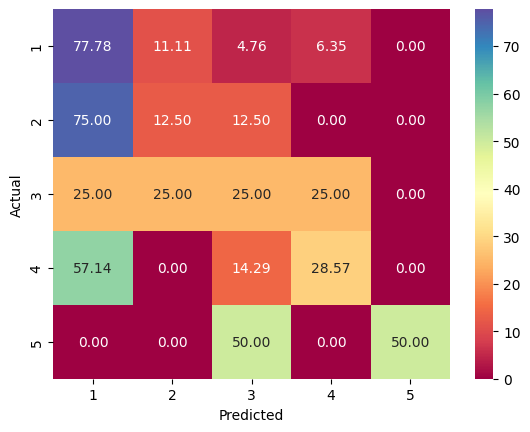

Actual level 2 predicted as a lower level:   75.0  % of Level  2 accidents
Actual level 3 predicted as a lower level:   50.0  % of Level  3 accidents
Actual level 4 predicted as a lower level:   71.43  % of Level  4 accidents
Actual level 5 predicted as a lower level:   50.0  % of Level  5 accidents


In [ ]:
print('Reports for Base Logistic Regression')
metrics_scores('Base Logistic Regression',lr_base)

**Observations on Base Logistic Regression**:

* Model is overfitting on the training set. We will overome this using hyperparameter tuning.


### Tuned Logistic Regression

In [ ]:
# using GridSearchCV to tune Base logistic Regression

# Define the logistic regression model
lr_tuned = LogisticRegression(random_state=42)

# Define hyperparameter grid
param_grid = {
    'penalty': ['l1', 'l2'],      # Choose between L1 and L2 regularization
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'lbfgs', 'saga']  # Solver algorithms
}

# Create a GridSearchCV object
grid_search = GridSearchCV(lr_tuned, param_grid, cv=5, scoring='recall')

# Fit the GridSearchCV object to the data
grid_search.fit(X_train_balanced, y_train_balanced)

# Print the best hyperparameters found
print("Best Hyperparameters:", grid_search.best_params_)


Best Hyperparameters: {'C': 0.001, 'penalty': 'l1', 'solver': 'liblinear'}


In [ ]:
# build tuned Logistic Regression model with best parameters
lr_tuned = LogisticRegression(C=0.001, penalty='l1', solver='liblinear', random_state=42)
lr_tuned.fit(X_train_balanced, y_train_balanced)

LogisticRegression(C=0.001, penalty='l1', random_state=42, solver='liblinear')

Report for Tuned Logistic Regression:

Classification report for Train set:

               precision    recall  f1-score   support

           1       0.20      1.00      0.33       246
           2       0.00      0.00      0.00       246
           3       0.00      0.00      0.00       246
           4       0.00      0.00      0.00       246
           5       0.00      0.00      0.00       246

    accuracy                           0.20      1230
   macro avg       0.04      0.20      0.07      1230
weighted avg       0.04      0.20      0.07      1230


Classification report for Test set:

               precision    recall  f1-score   support

           1       0.75      1.00      0.86        63
           2       0.00      0.00      0.00         8
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         7
           5       0.00      0.00      0.00         2

    accuracy                           0.75        84
   macro avg  

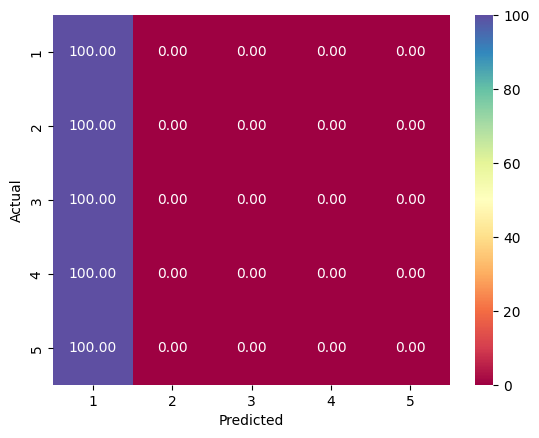

Actual level 2 predicted as a lower level:   100.0  % of Level  2 accidents
Actual level 3 predicted as a lower level:   100.0  % of Level  3 accidents
Actual level 4 predicted as a lower level:   100.0  % of Level  4 accidents
Actual level 5 predicted as a lower level:   100.0  % of Level  5 accidents


In [ ]:
print('Report for Tuned Logistic Regression:\n')
metrics_scores('Tuned Logistic Regression',lr_tuned)

**Observations on Tuned Logistic Regression**:

* Model is **underfitting** on the training set.

#### Support Vector Machines

In [ ]:
# Train a Support Vector classifier (SVC) on the balanced training set
svm_base = SVC(random_state=42)
svm_base.fit(X_train_balanced, y_train_balanced)


SVC(random_state=42)

Reports for Base SVM
Classification report for Train set:

               precision    recall  f1-score   support

           1       1.00      1.00      1.00       246
           2       1.00      1.00      1.00       246
           3       1.00      1.00      1.00       246
           4       1.00      1.00      1.00       246
           5       1.00      1.00      1.00       246

    accuracy                           1.00      1230
   macro avg       1.00      1.00      1.00      1230
weighted avg       1.00      1.00      1.00      1230


Classification report for Test set:

               precision    recall  f1-score   support

           1       0.77      1.00      0.87        63
           2       0.00      0.00      0.00         8
           3       0.00      0.00      0.00         4
           4       1.00      0.14      0.25         7
           5       0.00      0.00      0.00         2

    accuracy                           0.76        84
   macro avg       0.35      0.2

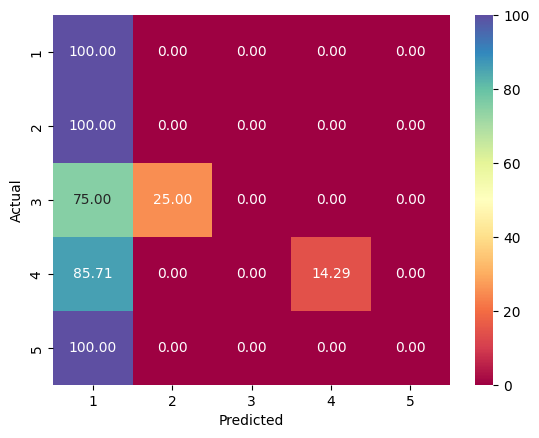

Actual level 2 predicted as a lower level:   100.0  % of Level  2 accidents
Actual level 3 predicted as a lower level:   100.0  % of Level  3 accidents
Actual level 4 predicted as a lower level:   85.71  % of Level  4 accidents
Actual level 5 predicted as a lower level:   100.0  % of Level  5 accidents


In [ ]:
print('Reports for Base SVM')
metrics_scores('Base SVM',svm_base)

**Observations on Base SVM**:

* Model is **overfitting** on the training set.

### Tuned SVM

In [ ]:
# use GridSearchCV to tune SVM

# Define the SVM
svm_tuned = SVC(random_state=42)

# Define hyperparameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(svm_tuned, param_grid, cv=5, scoring='recall')

# Fit the GridSearchCV object to the data
grid_search.fit(X_train_balanced, y_train_balanced)

# Print the best hyperparameters found
print("Best Hyperparameters:", grid_search.best_params_)


Best Hyperparameters: {'C': 0.001, 'gamma': 0.0001}


In [ ]:
# build tuned SVM model with best parameters
svm_tuned = SVC(C=0.001, gamma=0.0001,random_state=42)
svm_tuned.fit(X_train_balanced, y_train_balanced)

SVC(C=0.001, gamma=0.0001, random_state=42)

Reports of Tuned SVM:

Classification report for Train set:

               precision    recall  f1-score   support

           1       0.84      0.36      0.51       246
           2       0.80      0.61      0.69       246
           3       0.60      0.91      0.72       246
           4       0.53      0.99      0.69       246
           5       1.00      0.41      0.58       246

    accuracy                           0.66      1230
   macro avg       0.75      0.66      0.64      1230
weighted avg       0.75      0.66      0.64      1230


Classification report for Test set:

               precision    recall  f1-score   support

           1       0.86      0.30      0.45        63
           2       0.27      0.38      0.32         8
           3       0.05      0.25      0.08         4
           4       0.17      0.71      0.28         7
           5       1.00      0.50      0.67         2

    accuracy                           0.35        84
   macro avg       0.47      0

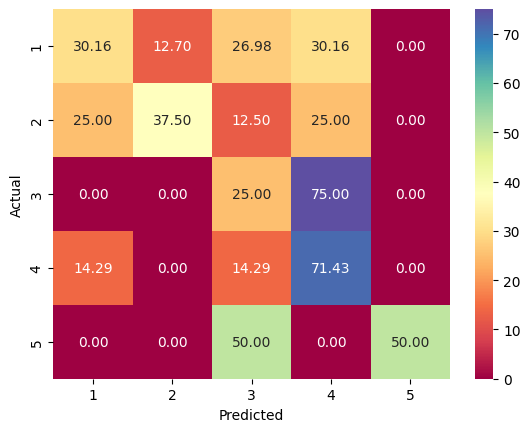

Actual level 2 predicted as a lower level:   25.0  % of Level  2 accidents
Actual level 3 predicted as a lower level:   0.0  % of Level  3 accidents
Actual level 4 predicted as a lower level:   28.57  % of Level  4 accidents
Actual level 5 predicted as a lower level:   50.0  % of Level  5 accidents


In [ ]:
print('Reports of Tuned SVM:\n')
metrics_scores('Tuned SVM',svm_tuned)

**Observations on Tuned SVM**:

* Model is not fitting well on the training set.

#### K Nearest Neighbors (KNN)

In [ ]:
# train a base model for KNN on balanced training data
knn_base = KNeighborsClassifier()
knn_base.fit(X_train_balanced, y_train_balanced)

KNeighborsClassifier()

Reports for Base KNN:

Classification report for Train set:

               precision    recall  f1-score   support

           1       1.00      0.21      0.35       246
           2       0.75      1.00      0.86       246
           3       0.79      1.00      0.88       246
           4       0.84      0.98      0.90       246
           5       0.97      1.00      0.99       246

    accuracy                           0.84      1230
   macro avg       0.87      0.84      0.80      1230
weighted avg       0.87      0.84      0.80      1230


Classification report for Test set:

               precision    recall  f1-score   support

           1       1.00      0.06      0.12        63
           2       0.23      0.88      0.37         8
           3       0.08      0.50      0.14         4
           4       0.00      0.00      0.00         7
           5       0.00      0.00      0.00         2

    accuracy                           0.15        84
   macro avg       0.26      0

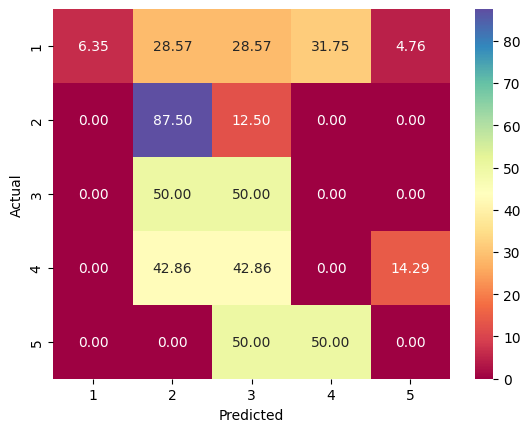

Actual level 2 predicted as a lower level:   0.0  % of Level  2 accidents
Actual level 3 predicted as a lower level:   50.0  % of Level  3 accidents
Actual level 4 predicted as a lower level:   85.71  % of Level  4 accidents
Actual level 5 predicted as a lower level:   100.0  % of Level  5 accidents


In [ ]:
print('Reports for Base KNN:')
print()
metrics_scores('Base KNN',knn_base)

**Observations on Base KNN**:

* Model is not fitting well on the training set.

### Tuned KNN model

In [ ]:
# use GridSearchCV to tuned KNN

# Define the SVM
knn_tuned = KNeighborsClassifier()

# Define hyperparameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],         # Number of neighbors to use
    'weights': ['uniform', 'distance'],      # Weight function used in prediction
    'metric': ['euclidean', 'manhattan']     # Distance metric
}

# Create a GridSearchCV object
grid_search = GridSearchCV(knn_tuned, param_grid, cv=5, scoring='recall')

# Fit the GridSearchCV object to the data
grid_search.fit(X_train_balanced, y_train_balanced)

# Print the best hyperparameters found
print("Best Hyperparameters:", grid_search.best_params_)


Best Hyperparameters: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}


In [ ]:
# build tuned SVM model with best parameters
knn_tuned = KNeighborsClassifier(n_neighbors = 3, weights = 'uniform', metric = 'euclidean')
knn_tuned.fit(X_train_balanced, y_train_balanced)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

Reports for Tuned KNN:

Classification report for Train set:

               precision    recall  f1-score   support

           1       0.99      0.41      0.58       246
           2       0.81      0.99      0.89       246
           3       0.83      1.00      0.91       246
           4       0.87      1.00      0.93       246
           5       0.98      1.00      0.99       246

    accuracy                           0.88      1230
   macro avg       0.90      0.88      0.86      1230
weighted avg       0.90      0.88      0.86      1230


Classification report for Test set:

               precision    recall  f1-score   support

           1       1.00      0.11      0.20        63
           2       0.22      0.88      0.35         8
           3       0.08      0.50      0.14         4
           4       0.00      0.00      0.00         7
           5       0.00      0.00      0.00         2

    accuracy                           0.19        84
   macro avg       0.26      

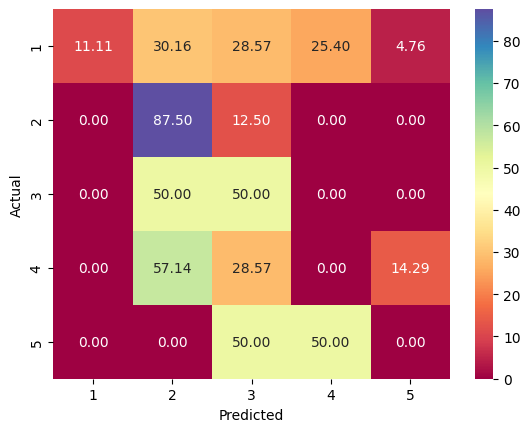

Actual level 2 predicted as a lower level:   0.0  % of Level  2 accidents
Actual level 3 predicted as a lower level:   50.0  % of Level  3 accidents
Actual level 4 predicted as a lower level:   85.71  % of Level  4 accidents
Actual level 5 predicted as a lower level:   100.0  % of Level  5 accidents


In [ ]:
print('Reports for Tuned KNN:\n')
metrics_scores('Tuned KNN',knn_tuned)

**Observations on Tuned KNN**:

* Model is overfitting on the training set. We will overcome this overfitting using hyperparameter tuning.

### Descision Tree

In [ ]:
# train a base model for Decision model on balanced training data
dtree_base = DecisionTreeClassifier(random_state=42)
dtree_base.fit(X_train_balanced, y_train_balanced)

DecisionTreeClassifier(random_state=42)

Reports for Base Decision Tree:

Classification report for Train set:

               precision    recall  f1-score   support

           1       1.00      1.00      1.00       246
           2       1.00      1.00      1.00       246
           3       1.00      1.00      1.00       246
           4       1.00      1.00      1.00       246
           5       1.00      1.00      1.00       246

    accuracy                           1.00      1230
   macro avg       1.00      1.00      1.00      1230
weighted avg       1.00      1.00      1.00      1230


Classification report for Test set:

               precision    recall  f1-score   support

           1       0.76      0.60      0.67        63
           2       0.07      0.12      0.09         8
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         7
           5       0.00      0.00      0.00         2

    accuracy                           0.46        84
   macro avg       0

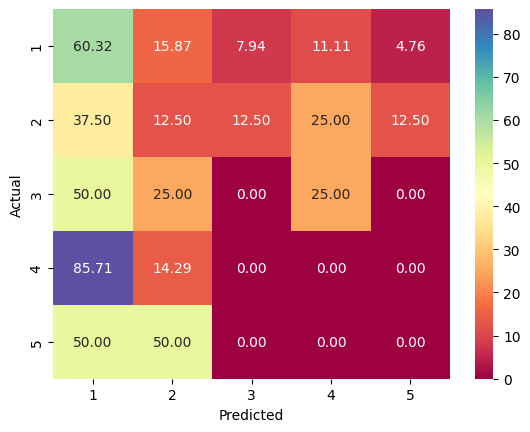

Actual level 2 predicted as a lower level:   37.5  % of Level  2 accidents
Actual level 3 predicted as a lower level:   75.0  % of Level  3 accidents
Actual level 4 predicted as a lower level:   100.0  % of Level  4 accidents
Actual level 5 predicted as a lower level:   100.0  % of Level  5 accidents


In [ ]:
print('Reports for Base Decision Tree:')
print()
metrics_scores('Base Decision Tree',dtree_base)

**Observations on Base Decision Tree**:

* Model is overfitting on the training set. We will overcome this overfitting using hyperparameter tuning.

In [ ]:
# prune the tree to reduce overfitting

dtreeR = DecisionTreeClassifier(max_depth=3, random_state=42)
dtreeR.fit(X_train_balanced, y_train_balanced)

DecisionTreeClassifier(max_depth=3, random_state=42)

Report for Pruned Decision Tree:

Classification report for Train set:

               precision    recall  f1-score   support

           1       0.93      0.11      0.19       246
           2       0.63      0.46      0.53       246
           3       0.57      0.85      0.68       246
           4       0.49      0.80      0.61       246
           5       0.98      1.00      0.99       246

    accuracy                           0.64      1230
   macro avg       0.72      0.64      0.60      1230
weighted avg       0.72      0.64      0.60      1230


Classification report for Test set:

               precision    recall  f1-score   support

           1       0.43      0.05      0.09        63
           2       0.00      0.00      0.00         8
           3       0.00      0.00      0.00         4
           4       0.19      0.86      0.32         7
           5       0.00      0.00      0.00         2

    accuracy                           0.11        84
   macro avg       

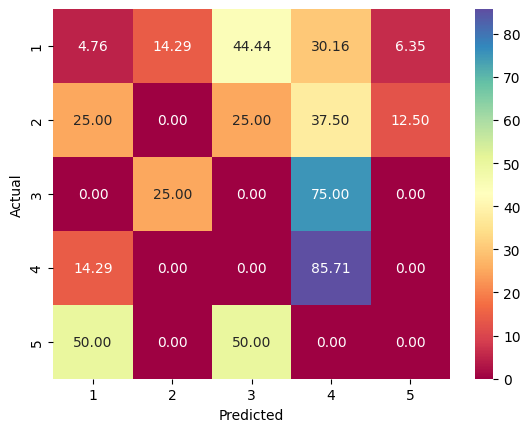

Actual level 2 predicted as a lower level:   25.0  % of Level  2 accidents
Actual level 3 predicted as a lower level:   25.0  % of Level  3 accidents
Actual level 4 predicted as a lower level:   14.29  % of Level  4 accidents
Actual level 5 predicted as a lower level:   100.0  % of Level  5 accidents


In [ ]:
print('Report for Pruned Decision Tree:')
print()
metrics_scores('Pruned Decision Tree',dtreeR)

**Observations on Pruned Decision Tree**:

* Model is a relatively better fit on the training set.

### Tuned Decision Tree

In [ ]:
# use GridSearchCV to tune Decision Tree

# Define the pruned Decision tree model
dtree_tuned = DecisionTreeClassifier(max_depth = 3, random_state=42)

# Set up parameter grid for hyperparameter tuning
param_grid = {'max_depth': [3, 4, 5, 7, 10],
              'criterion': ['gini', 'entropy'],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(dtree_tuned, param_grid, cv=5, scoring='recall')

# Fit the GridSearchCV object to the data
grid_search.fit(X_train_balanced, y_train_balanced)

# Print the best hyperparameters found
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [ ]:
# build tuned decision tree with above best parameters
dtree_tuned = DecisionTreeClassifier(max_depth = 3, criterion='gini', min_samples_leaf=1, min_samples_split=2, random_state=42)
dtree_tuned.fit(X_train_balanced, y_train_balanced)

DecisionTreeClassifier(max_depth=3, random_state=42)

Reports for Tuned Decision Tree:

Classification report for Train set:

               precision    recall  f1-score   support

           1       0.93      0.11      0.19       246
           2       0.63      0.46      0.53       246
           3       0.57      0.85      0.68       246
           4       0.49      0.80      0.61       246
           5       0.98      1.00      0.99       246

    accuracy                           0.64      1230
   macro avg       0.72      0.64      0.60      1230
weighted avg       0.72      0.64      0.60      1230


Classification report for Test set:

               precision    recall  f1-score   support

           1       0.43      0.05      0.09        63
           2       0.00      0.00      0.00         8
           3       0.00      0.00      0.00         4
           4       0.19      0.86      0.32         7
           5       0.00      0.00      0.00         2

    accuracy                           0.11        84
   macro avg       

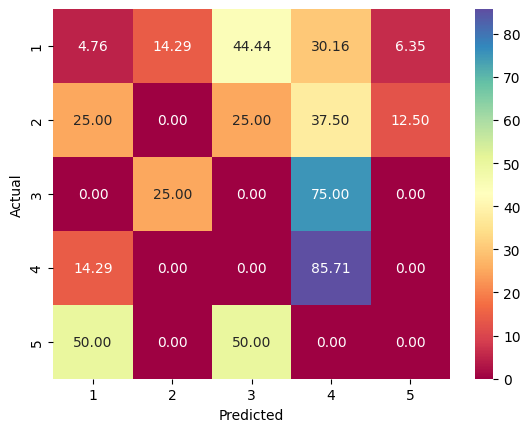

Actual level 2 predicted as a lower level:   25.0  % of Level  2 accidents
Actual level 3 predicted as a lower level:   25.0  % of Level  3 accidents
Actual level 4 predicted as a lower level:   14.29  % of Level  4 accidents
Actual level 5 predicted as a lower level:   100.0  % of Level  5 accidents


In [ ]:
print('Reports for Tuned Decision Tree:\n')
metrics_scores('Tuned Decision Tree',dtree_tuned)

**Observations on Tuned Decision Tree**:

* Model is relatiely a better fit on the training set.

### Random Forest

In [ ]:
# train a base model for Random Forest on balanced training data
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_balanced, y_train_balanced)

RandomForestClassifier(random_state=42)

Reports for Base Random Model:

Classification report for Train set:

               precision    recall  f1-score   support

           1       1.00      1.00      1.00       246
           2       1.00      1.00      1.00       246
           3       1.00      1.00      1.00       246
           4       1.00      1.00      1.00       246
           5       1.00      1.00      1.00       246

    accuracy                           1.00      1230
   macro avg       1.00      1.00      1.00      1230
weighted avg       1.00      1.00      1.00      1230


Classification report for Test set:

               precision    recall  f1-score   support

           1       0.76      1.00      0.86        63
           2       1.00      0.12      0.22         8
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         7
           5       0.00      0.00      0.00         2

    accuracy                           0.76        84
   macro avg       0.

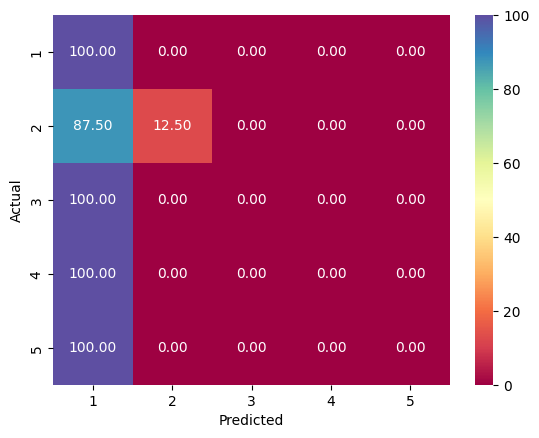

Actual level 2 predicted as a lower level:   87.5  % of Level  2 accidents
Actual level 3 predicted as a lower level:   100.0  % of Level  3 accidents
Actual level 4 predicted as a lower level:   100.0  % of Level  4 accidents
Actual level 5 predicted as a lower level:   100.0  % of Level  5 accidents


In [ ]:
print('Reports for Base Random Model:\n')
metrics_scores('Random Forest',rf)

**Observations on Base Random Forest**:

* Model is overfitting on the training set. We will overcome this overfitting using hyperparameter tuning.

### Tuned Random Forest

In [ ]:
# Create RandomForestClassifier
rf_tuned = RandomForestClassifier(random_state=42)

# Define hyperparameters grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 4],
    'max_features': ['sqrt', 'log2']
}

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=rf_tuned, param_grid=param_grid, cv=5, scoring='recall')

# Fit the model
grid_search.fit(X_train_balanced, y_train_balanced)

# Get the best parameters and best score
print("Best parameters:", grid_search.best_params_)

Best parameters: {'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}


In [ ]:
# fit the random forest model with best parameters
rf_tuned = RandomForestClassifier(max_depth= 3, max_features = 'sqrt',
                                  min_samples_leaf = 2, min_samples_split = 5,
                                  n_estimators = 100, random_state=42)
rf_tuned.fit(X_train_balanced, y_train_balanced)

RandomForestClassifier(max_depth=3, min_samples_leaf=2, min_samples_split=5,
                       random_state=42)

Reports for Tuned Random Forest:

Classification report for Train set:

               precision    recall  f1-score   support

           1       0.95      0.82      0.88       246
           2       0.91      0.98      0.94       246
           3       0.95      0.98      0.96       246
           4       0.95      0.97      0.96       246
           5       1.00      1.00      1.00       246

    accuracy                           0.95      1230
   macro avg       0.95      0.95      0.95      1230
weighted avg       0.95      0.95      0.95      1230


Classification report for Test set:

               precision    recall  f1-score   support

           1       0.78      0.63      0.70        63
           2       0.20      0.25      0.22         8
           3       0.09      0.25      0.13         4
           4       0.10      0.14      0.12         7
           5       0.00      0.00      0.00         2

    accuracy                           0.52        84
   macro avg       

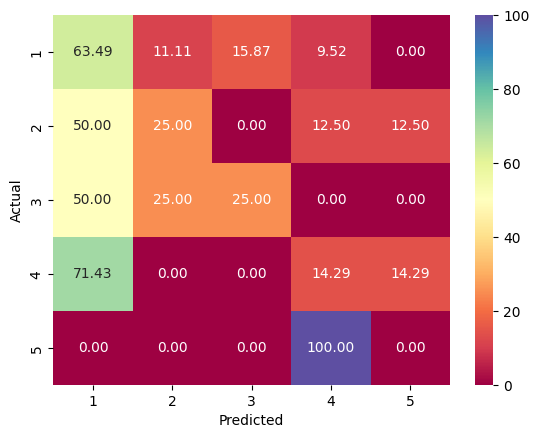

Actual level 2 predicted as a lower level:   50.0  % of Level  2 accidents
Actual level 3 predicted as a lower level:   75.0  % of Level  3 accidents
Actual level 4 predicted as a lower level:   71.43  % of Level  4 accidents
Actual level 5 predicted as a lower level:   100.0  % of Level  5 accidents


In [ ]:
print('Reports for Tuned Random Forest:\n')
metrics_scores('Tuned Random Forest',rf_tuned)

**Observations on Tuned Random Forest**:

* Model is overfitting on the training set.

#### Comparing performance of Traditional Machine Learning Models:

In [ ]:
# Dataframe with model performance for each trained model
model_performance_df

Model  Recall(1)  Recall(2)  Recall(3)  Recall(4)  \
0    Base Logistic Regression   0.777778      0.125       0.25   0.285714   
1   Tuned Logistic Regression   1.000000      0.000       0.00   0.000000   
2                    Base SVM   1.000000      0.000       0.00   0.142857   
3                   Tuned SVM   0.301587      0.375       0.25   0.714286   
4                    Base KNN   0.063492      0.875       0.50   0.000000   
5                   Tuned KNN   0.111111      0.875       0.50   0.000000   
6          Base Decision Tree   0.603175      0.125       0.00   0.000000   
7        Pruned Decision Tree   0.047619      0.000       0.00   0.857143   
8         Tuned Decision Tree   0.047619      0.000       0.00   0.857143   
9               Random Forest   1.000000      0.125       0.00   0.000000   
10        Tuned Random Forest   0.634921      0.250       0.25   0.142857   

    Recall(5)  Overall Accuracy  
0         0.5          0.642857  
1         0.0          0.750000  
2         0.0          0.761905  
3         0.5          0.345238  
4         0.0          0.154762  
5         0.0          0.190476  
6         0.0          0.464286  
7         0.0          0.107143  
8         0.0          0.107143  
9         0.0          0.761905  
10        0.0          0.523810

* Base Decision Tree is performing best among all on recall scores.
* Pruned decision tree, Tuned Decision tree and Tuned Random Forest are also performing relatively better than other models.

In [ ]:
# dataframe with models on how much they underpredict severity
severity_df

Model name  Actual level 2 predicted as a lower level  \
0    Base Logistic Regression                                       75.0   
1   Tuned Logistic Regression                                      100.0   
2                    Base SVM                                      100.0   
3                   Tuned SVM                                       25.0   
4                    Base KNN                                        0.0   
5                   Tuned KNN                                        0.0   
6          Base Decision Tree                                       37.5   
7        Pruned Decision Tree                                       25.0   
8         Tuned Decision Tree                                       25.0   
9               Random Forest                                       87.5   
10        Tuned Random Forest                                       50.0   

    Actual level 3 predicted as a lower level  \
0                                        50.0   
1                                       100.0   
2                                       100.0   
3                                         0.0   
4                                        50.0   
5                                        50.0   
6                                        75.0   
7                                        25.0   
8                                        25.0   
9                                       100.0   
10                                       75.0   

    Actual level 4 predicted as a lower level  \
0                                       71.43   
1                                      100.00   
2                                       85.71   
3                                       28.57   
4                                       85.71   
5                                       85.71   
6                                      100.00   
7                                       14.29   
8                                       14.29   
9                                      100.00   
10                                      71.43   

    Actual level 5 predicted as a lower level  
0                                        50.0  
1                                       100.0  
2                                       100.0  
3                                        50.0  
4                                       100.0  
5                                       100.0  
6                                       100.0  
7                                       100.0  
8                                       100.0  
9                                       100.0  
10                                      100.0

* In the above table, we calculated that among all the wrong predictions of accident levels, which ones are predicted as less severe than the actual severity. This scenario is dangerous so the models which handles this scenario well and minimize the underpredition of severity, should be preferred and given more importance.
* We can see that Tuned SVM and Base KNN are the best performing models as per as above criteria is concerned.
* These are followed by base decision tree, which is also performing relatively better.

In [ ]:
# Function to draw visual representation of each model's performance on different metrics
def drawHeatMap(metric):
    df_for_bar=pd.DataFrame(columns=['Test'])
    df_for_bar['Test']=model_performance_df[metric]
    df_for_bar.index=model_performance_df['Model']
    sns.heatmap(df_for_bar.sort_values(by='Test',ascending=False),cmap='Spectral',annot=True,fmt="0.4f")
    plt.title((metric + ' wise Model sorted on Test Data'))

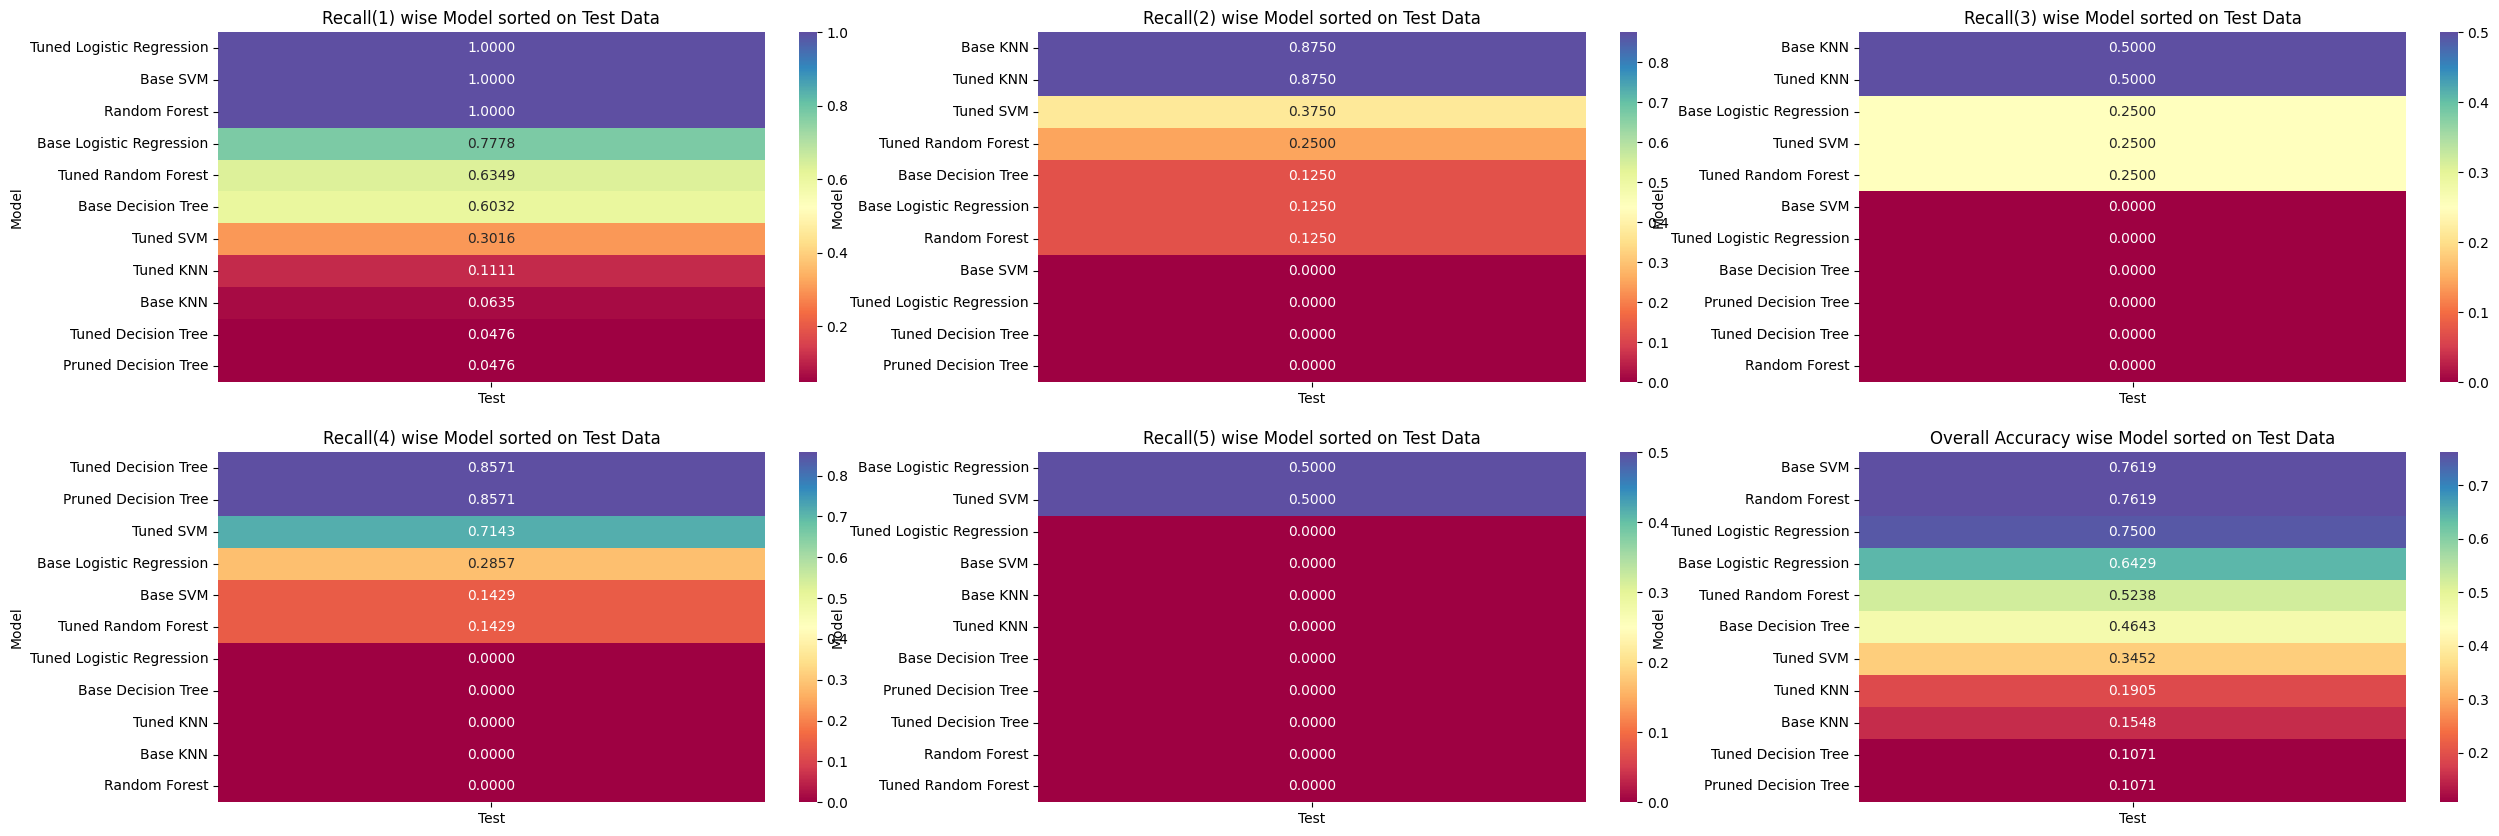

In [ ]:
# perfromance of all models on each description
plt.figure(figsize=(30,10))
for i,col in enumerate(model_performance_df.columns[1:]):
  plt.subplot(2,3,i+1)
  drawHeatMap(col)
plt.show()

* Based on the criteria of recall scores, and the criteria of minimizing the underprediction of severity, we can select the best performing traditional ML classifier among all the classifiers built.
* The Base Decision Tree is performing well on both criteria mentioned above.

### Conclusion & Further Consideration for Improvement


The lack of sufficient training data had a detrimental effect on the performance of each of our traditional ML classifiers. So, among these models, we could only have acceptable performance on some models like Base Decision Tree, but it is not sufficient to convince us that the traditional ML models built on this data can be deployed for predictions in a real-time production environment.
In Milestone-2, we will consider more advanced models which are anticipated to perform better than the traditional ML models. Some of these models can be:


*   Artificial Neural Networks (ANN)
*   Recurrent Neural Network (RNN)
*   Long Short Term Memory (LSTM)
*   Large Language Model (LLM)

## Milestone 2

**Input:** Preprocessed output from Milestone-1

**Process**

   - Step 1:  Design, train and test Neural networks classifiers [ 5 points ]

In [ ]:
# importing necessary libraries for Milestone-2
import tensorflow as tf
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Input
from keras.layers import Dense,Dropout
from keras.layers import BatchNormalization

epochs=50

In [ ]:
# checking unique values of Accident Level
data['Accident Level'].unique()

array([1, 4, 3, 2, 5])

In [ ]:
# To change classes from 1-5 to 0-4
y_train_new=y_train-1

In [ ]:
# verifying if the classes are changed to 0-4
y_train_new.unique()

array([0, 2, 3, 1, 4])

Classes (Accident Level) is now between 0 to 4

In [ ]:
# splitting the data further into training and validation set
x_train_nn_scaled,x_train_val,y_train_nn_scaled,y_train_val=train_test_split(X_train_scaled,y_train_new,test_size=0.1,random_state=42)

In [ ]:
# checking the shape of the train and validation set
x_train_nn_scaled.shape,x_train_val.shape,y_train_nn_scaled.shape,y_train_val.shape

((300, 327), (34, 327), (300,), (34,))

In [ ]:
# balancing the data using SMOTE technique
smote2 = SMOTE(k_neighbors=min(5, len(pd.Series(y_train_nn_scaled).unique()) - 1))  # set k_neighbors to a number that allows function to work.
x_train_nn,y_train_nn=smote2.fit_resample(x_train_nn_scaled,y_train_nn_scaled)

In [ ]:
smote2

SMOTE(k_neighbors=4)

In [ ]:
y_train_nn.value_counts()

Accident Level
0    218
4    218
1    218
2    218
3    218
Name: count, dtype: int64

So, the data is balanced now.

In [ ]:
# checking the shape of balanced data
x_train_nn.shape,y_train_nn.shape,x_train_val.shape,y_train_val.shape

((1090, 327), (1090,), (34, 327), (34,))

In [ ]:
# converting the target variable into vectors (to be used for prediction in neural networks)
y_train_cat = to_categorical(y_train_nn,num_classes=None)
y_val_cat = to_categorical(y_train_val,num_classes=None)
y_test_cat=to_categorical(y_test-1,num_classes=None)

In [ ]:
# checking the shape of the target variable
y_train_cat.shape,y_val_cat.shape,y_test_cat.shape

((1090, 5), (34, 5), (84, 5))

The target variable is now a vector of size 5, so the output layer of neural network will have 5 neurons.

### Building the Base Neural Network model

In [ ]:
# building thebase neural network architecture
tf.random.set_seed(42)
base_nn_model=tf.keras.Sequential()
base_nn_model.add(tf.keras.layers.Dense(128,activation='relu',input_shape=(x_train_nn.shape[1],)))
base_nn_model.add(tf.keras.layers.Dense(32,activation='relu'))
base_nn_model.add(tf.keras.layers.Dense(8,activation='relu'))
base_nn_model.add(tf.keras.layers.Dense(5,activation='softmax'))

In [ ]:
# checking the model summary
base_nn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │          41,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 8)                   │             264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 5)                   │              45 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 46,421 (181.33 KB)

 Trainable params: 46,421 (181.33 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# compiling the model
base_nn_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history=base_nn_model.fit(x_train_nn,y_train_cat,epochs=epochs,validation_data=(x_train_val,y_val_cat))

Epoch 1/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 56ms/step - accuracy: 0.3687 - loss: 1.4482 - val_accuracy: 0.5294 - val_loss: 1.2465
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7710 - loss: 0.7254 - val_accuracy: 0.6765 - val_loss: 1.0408
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9331 - loss: 0.3268 - val_accuracy: 0.7353 - val_loss: 1.0352
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9852 - loss: 0.1210 - val_accuracy: 0.7647 - val_loss: 1.1417
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9965 - loss: 0.0512 - val_accuracy: 0.7647 - val_loss: 1.2053
Epoch 6/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9965 - loss: 0.0328 - val_accuracy: 0.7647 - val_loss: 1.2537
Epoch 7/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9965 - loss: 0.0251 - val_accuracy: 0.7353 - val_loss: 1.2961
Epoch 8/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9965 - loss: 0.0221 - val_accuracy: 0.7353 - val_loss

We have achieved a relatively good validation accuracy of ariund 67.6% for the **Base Neural Network.**

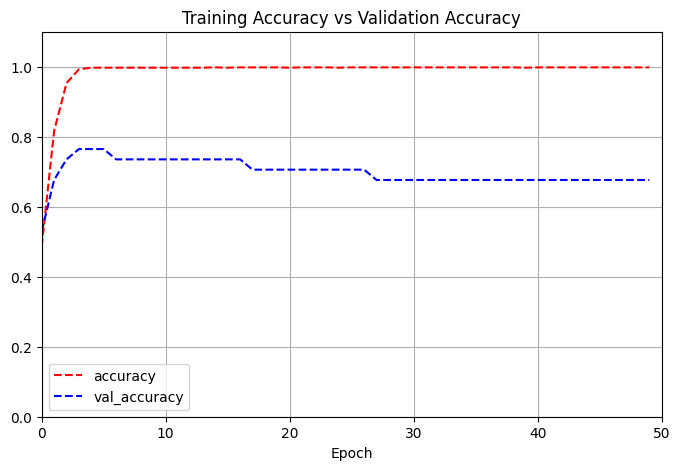

In [ ]:
# plotting the Training & Validation accuracy
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot(figsize=(8,5),grid=True,xlim=[0,epochs],ylim=[0,1.1],xlabel="Epoch",style=["r--","b--"])
plt.title ('Training Accuracy vs Validation Accuracy')
plt.show()

In [ ]:
# evaluating Base NN model on test data
base_nn_model.evaluate(X_test_scaled,y_test_cat)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 273ms/step - accuracy: 0.6771 - loss: 2.2296


[2.386300563812256, 0.6666666865348816]

We are getting 67% accuracy on test data which is in agreement with validation accuracy. So our model is generalizing well on the unseen test data.

In [ ]:
# using argmax to convert vectorized output target variable into Accident levels (classes)
y_pred_test=np.argmax(base_nn_model.predict(X_test_scaled),axis=1)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


In [ ]:
# checking the predicted target variable (Accident Level)
y_pred_test=y_pred_test+1
y_pred_test

array([1, 1, 1, 1, 1, 2, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       3, 1, 1, 2, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1,
       1, 1, 1, 1, 1, 1, 4, 4, 3, 1, 3, 3, 2, 1, 1, 1, 1, 2, 4, 1, 1, 4,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1])

In [ ]:
# printing the classification report on test data
print(metrics.classification_report(y_test,y_pred_test))


              precision    recall  f1-score   support

           1       0.80      0.83      0.81        63
           2       0.17      0.12      0.14         8
           3       0.33      0.50      0.40         4
           4       0.14      0.14      0.14         7
           5       0.00      0.00      0.00         2

    accuracy                           0.67        84
   macro avg       0.29      0.32      0.30        84
weighted avg       0.64      0.67      0.65        84



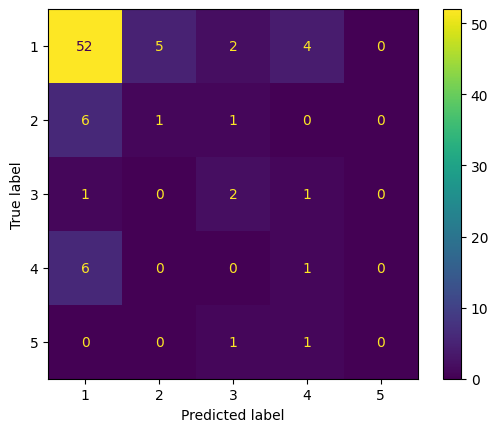

In [ ]:
# printing confusion matrix of test data
metrics.ConfusionMatrixDisplay.from_predictions(y_test,y_pred_test)

In [ ]:
# adding NN predictions into performance dataframe to be printed for comparison with other models later
add_to_model_performance('Base Neural Network',y_test,y_pred_test)

In [ ]:
# dataframe with models on how much they underpredict severity
slf =[]
for i in range(2,6):
  sev_df=pd.DataFrame(columns=['Actual Severity','Predicted Severity'])
  sev_df['Actual Severity']=y_test[y_test==i]
  sev_df['Predicted Severity']=y_pred_test[y_test==i]
  sev_df['Pred_lower_than_actual']=sev_df['Predicted Severity']<sev_df['Actual Severity']
  print(sev_df)
  print("Actual level",i,"predicted as a lower level:  ",round(sev_df['Pred_lower_than_actual'].sum()/sev_df.shape[0]*100,2)," % of Level ",i,"accidents")
  slf.append(round(sev_df['Pred_lower_than_actual'].sum()/sev_df.shape[0]*100,2))

severity_df.loc[len(severity_df)]={'Model name':'Base Neural Network',
                                  'Actual level 2 predicted as a lower level':slf[0],
                                  'Actual level 3 predicted as a lower level':slf[1],
                                  'Actual level 4 predicted as a lower level':slf[2],
                                  'Actual level 5 predicted as a lower level':slf[3]
                                  }

     Actual Severity  Predicted Severity  Pred_lower_than_actual
258                2                   1                    True
55                 2                   1                    True
77                 2                   1                    True
275                2                   3                   False
377                2                   2                   False
404                2                   1                    True
22                 2                   1                    True
126                2                   1                    True
Actual level 2 predicted as a lower level:   75.0  % of Level  2 accidents
     Actual Severity  Predicted Severity  Pred_lower_than_actual
324                3                   1                    True
409                3                   3                   False
268                3                   3                   False
168                3                   4                   False
Actual level 3 

### Building Regularized Neural Network model

In [ ]:
# adding some dropouts to regularize the Base NN model
tf.random.set_seed(42)
regularised_nn_model=tf.keras.Sequential()
regularised_nn_model.add(tf.keras.layers.Dense(128,activation='relu',input_shape=(x_train_nn.shape[1],)))
regularised_nn_model.add(BatchNormalization())
regularised_nn_model.add(tf.keras.layers.Dense(32,activation='relu'))
regularised_nn_model.add(Dropout(0.2))
regularised_nn_model.add(tf.keras.layers.Dense(8,activation='relu'))
regularised_nn_model.add(Dropout(0.2))
regularised_nn_model.add(tf.keras.layers.Dense(5,activation='softmax'))

In [ ]:
# compiling the Regularized NN model
regularised_nn_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
# checking summary of regularized NN model
regularised_nn_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 128)                 │          41,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 8)                   │             264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 5)                   │              45 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 46,933 (183.33 KB)

 Trainable params: 46,677 (182.33 KB)

 Non-trainable params: 256 (1.00 KB)

In [ ]:
# fitting the model on training data and checking validation accuracy
history=regularised_nn_model.fit(x_train_nn,y_train_cat,epochs=epochs,validation_data=(x_train_val,y_val_cat))

Epoch 1/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 7s 59ms/step - accuracy: 0.2852 - loss: 1.5790 - val_accuracy: 0.6176 - val_loss: 1.1943
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5711 - loss: 1.0783 - val_accuracy: 0.6176 - val_loss: 1.1114
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6931 - loss: 0.8675 - val_accuracy: 0.5294 - val_loss: 1.1892
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7234 - loss: 0.6998 - val_accuracy: 0.5588 - val_loss: 1.3219
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7544 - loss: 0.5566 - val_accuracy: 0.5882 - val_loss: 1.4341
Epoch 6/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7835 - loss: 0.4638 - val_accuracy: 0.5588 - val_loss: 1.6296
Epoch 7/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7903 - loss: 0.4466 - val_accuracy: 0.5882 - val_loss: 1.8014
Epoch 8/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9445 - loss: 0.3421 - val_accuracy: 0.6765 - val_loss

In [ ]:
# evaluating the model on validation data
regularised_nn_model.evaluate(x_train_val,y_val_cat)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6501 - loss: 4.4162 


[4.411752223968506, 0.6470588445663452]

We have achieved around 68% accuracy on validation set for **Regularized NN model** which is similar to base NN model.

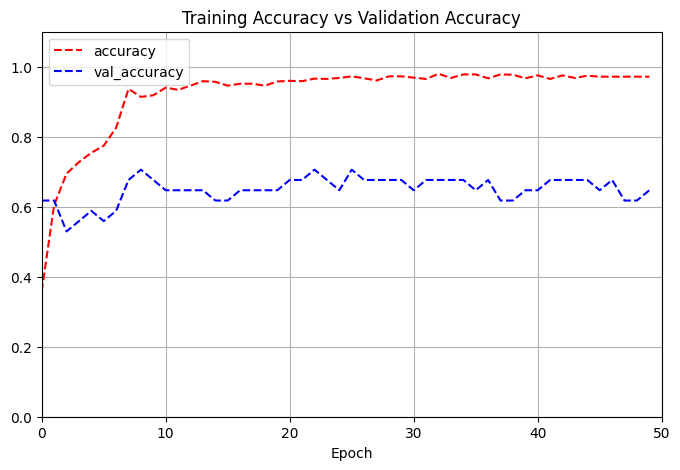

In [ ]:
# plotting the Training and validation accuracy scores versus epoch
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot(figsize=(8,5),grid=True,xlim=[0,50],ylim=[0,1.1],xlabel="Epoch",style=["r--","b--"])
plt.title ('Training Accuracy vs Validation Accuracy')
plt.show()

In [ ]:
# evaluating the model on test data
regularised_nn_model.evaluate(X_test_scaled,y_test_cat)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step - accuracy: 0.6695 - loss: 3.2170


[3.5222041606903076, 0.6904761791229248]

We can see 65.74% accuracy on the test data which is similar to accuracy on validation data, so our Regularized Neural Network is generalizing well on the unseen test data.

In [ ]:
# using argmax to convert vectorized output target variable into Accident levels (classes)
y_pred_test=np.argmax(regularised_nn_model.predict(X_test_scaled),axis=1)+1

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


In [ ]:
# printing classification report on the test data
print(metrics.classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           1       0.83      0.84      0.83        63
           2       0.29      0.25      0.27         8
           3       0.20      0.50      0.29         4
           4       0.50      0.14      0.22         7
           5       0.00      0.00      0.00         2

    accuracy                           0.69        84
   macro avg       0.36      0.35      0.32        84
weighted avg       0.70      0.69      0.68        84



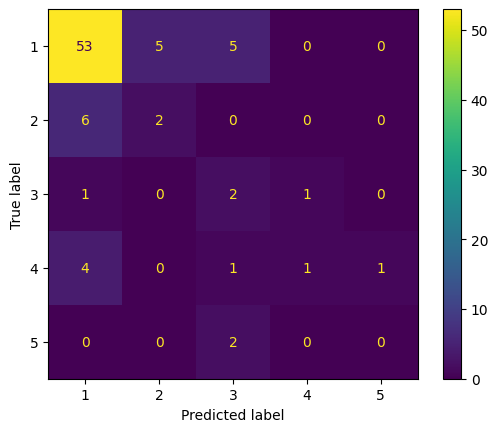

In [ ]:
# printing confusion matrix on test data
metrics.ConfusionMatrixDisplay.from_predictions(y_test,y_pred_test)

In [ ]:
# adding the metrics scores to performace data frame
add_to_model_performance('Regularized Neural Network',y_test,y_pred_test)

# data frame to print how much the model is underpredicted the severity level of accidents
slf =[]
for i in range(2,6):
  sev_df=pd.DataFrame(columns=['Actual Severity','Predicted Severity'])
  sev_df['Actual Severity']=y_test[y_test==i]
  sev_df['Predicted Severity']=y_pred_test[y_test==i]
  sev_df['Pred_lower_than_actual']=sev_df['Predicted Severity']<sev_df['Actual Severity']
  print("Actual level",i,"predicted as a lower level:  ",round(sev_df['Pred_lower_than_actual'].sum()/sev_df.shape[0]*100,2)," % of Level ",i,"accidents")
  slf.append(round(sev_df['Pred_lower_than_actual'].sum()/sev_df.shape[0]*100,2))

severity_df.loc[len(severity_df)]={'Model name':'Regularized Neural Network',
                                  'Actual level 2 predicted as a lower level':slf[0],
                                  'Actual level 3 predicted as a lower level':slf[1],
                                  'Actual level 4 predicted as a lower level':slf[2],
                                  'Actual level 5 predicted as a lower level':slf[3]
                                  }

Actual level 2 predicted as a lower level:   75.0  % of Level  2 accidents
Actual level 3 predicted as a lower level:   25.0  % of Level  3 accidents
Actual level 4 predicted as a lower level:   71.43  % of Level  4 accidents
Actual level 5 predicted as a lower level:   100.0  % of Level  5 accidents


In [ ]:
#  printing the model performance data frame for comparison of various models built
model_performance_df

Model  Recall(1)  Recall(2)  Recall(3)  Recall(4)  \
0     Base Logistic Regression   0.777778      0.125       0.25   0.285714   
1    Tuned Logistic Regression   1.000000      0.000       0.00   0.000000   
2                     Base SVM   1.000000      0.000       0.00   0.142857   
3                    Tuned SVM   0.301587      0.375       0.25   0.714286   
4                     Base KNN   0.063492      0.875       0.50   0.000000   
5                    Tuned KNN   0.111111      0.875       0.50   0.000000   
6           Base Decision Tree   0.603175      0.125       0.00   0.000000   
7         Pruned Decision Tree   0.047619      0.000       0.00   0.857143   
8          Tuned Decision Tree   0.047619      0.000       0.00   0.857143   
9                Random Forest   1.000000      0.125       0.00   0.000000   
10         Tuned Random Forest   0.634921      0.250       0.25   0.142857   
11         Base Neural Network   0.825397      0.125       0.50   0.142857   
12  Regularized Neural Network   0.841270      0.250       0.50   0.142857   

    Recall(5)  Overall Accuracy  
0         0.5          0.642857  
1         0.0          0.750000  
2         0.0          0.761905  
3         0.5          0.345238  
4         0.0          0.154762  
5         0.0          0.190476  
6         0.0          0.464286  
7         0.0          0.107143  
8         0.0          0.107143  
9         0.0          0.761905  
10        0.0          0.523810  
11        0.0          0.666667  
12        0.0          0.690476

**Observations:**
* Models with best accuracy scores are:
  * **Tuned Logistic Regression, Base SVM, Base Random Forest, Base NN, and Regularized NN**.
* Out of all the above models, only **Base Neural Network** is acceptable recall scores. All other models are giving very less recall scores.
* **Base Logistic Regression** is also performing relatively better on recall scores while having acceptable accuracy.


### Step 2: Design, train and test RNN or LSTM classifiers [ 10 points ]

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from keras.regularizers import l2


# Step 1: Tokenize and pad the accident descriptions
max_words = 5000  # Max number of words to keep based on word frequency
max_len = max_sentence_length     # Max length of each text sequence

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(data['Description_final'])

# Convert the accident descriptions to sequences of integers
X_sequences = tokenizer.texts_to_sequences(data['Description_final'])

# Pad sequences to ensure uniform input length
X_padded = pad_sequences(X_sequences, maxlen=max_len)

# Get the vocabulary size from the tokenizer
max_words = len(tokenizer.word_index) + 1  # +1 to include padding

# Step 2: Generate Word2Vec embeddings using Gensim
# Split the descriptions into a list of tokenized words for Word2Vec training
sentences = [description.split() for description in data['Description_final']]

# Train the Word2Vec model
#w2v_model = Word2Vec(sentences, vector_size=128, window=5, min_count=1, workers=4)

# Create an embedding matrix with the pretrained Word2Vec vectors
embedding_dim = vec_size
embedding_matrix = np.zeros((max_words, embedding_dim))

for word, i in tokenizer.word_index.items():
    if word in model_W2V.key_to_index:
        embedding_matrix[i] = model_W2V[word]  # Get the vector for the word



# Encode the target variable (Accident Level)
label_encoder = LabelEncoder()
#y = label_encoder.fit_transform(data['Accident Level'])
y=to_categorical(data['Accident Level']-1)

# Split the data into training and testing sets
X_train_seq, X_test_seq, y_train_seq, y_test_seq = train_test_split(X_padded, y, test_size=0.2, random_state=42)

# Step 2: Build the LSTM model
lstm_model = Sequential([
    Embedding(input_dim=max_words, output_dim=embedding_dim,
              weights=[embedding_matrix], trainable=False),  # Using Word2Vec embeddings
    Bidirectional(LSTM(128, return_sequences=False, kernel_regularizer=l2(0.005))),
    Dropout(0.3),                                                          # Dropout to prevent overfitting
    Dense(64, activation='relu'),                                           # Hidden dense layer
    Dropout(0.3),                                                          # Dropout
    Dense(5, activation='softmax')               # Output layer
])

# Compile the LSTM model
lstm_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# checking the shape of train and test split
X_train_seq.shape,X_test_seq.shape,y_train_seq.shape,y_test_seq.shape

((334, 95), (84, 95), (334, 5), (84, 5))

In [ ]:
# Step 3: Train the LSTM model
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=5)

history_lstm = lstm_model.fit(X_train_seq, y_train_seq, epochs=epochs, batch_size=32, validation_data=(X_test_seq, y_test_seq),verbose=2)


Epoch 1/50
11/11 - 6s - 585ms/step - accuracy: 0.6048 - loss: 4.5844 - val_accuracy: 0.7500 - val_loss: 3.5629
Epoch 2/50
11/11 - 0s - 17ms/step - accuracy: 0.7365 - loss: 3.2433 - val_accuracy: 0.7500 - val_loss: 2.7220
Epoch 3/50
11/11 - 0s - 26ms/step - accuracy: 0.7365 - loss: 2.5024 - val_accuracy: 0.7500 - val_loss: 2.1180
Epoch 4/50
11/11 - 0s - 26ms/step - accuracy: 0.7365 - loss: 1.9706 - val_accuracy: 0.7500 - val_loss: 1.7108
Epoch 5/50
11/11 - 0s - 16ms/step - accuracy: 0.7365 - loss: 1.5985 - val_accuracy: 0.7500 - val_loss: 1.4311
Epoch 6/50
11/11 - 0s - 15ms/step - accuracy: 0.7365 - loss: 1.3352 - val_accuracy: 0.7500 - val_loss: 1.2520
Epoch 7/50
11/11 - 0s - 27ms/step - accuracy: 0.7365 - loss: 1.1775 - val_accuracy: 0.7500 - val_loss: 1.1330
Epoch 8/50
11/11 - 0s - 15ms/step - accuracy: 0.7425 - loss: 1.0350 - val_accuracy: 0.7500 - val_loss: 1.1065
Epoch 9/50
11/11 - 0s - 27ms/step - accuracy: 0.7395 - loss: 0.9276 - val_accuracy: 0.7381 - val_loss: 1.0805
Epoch 10/

We are getting around 62% validation accuracy for LSTM

In [ ]:
# Step 4: Evaluate the LSTM model
lstm_pred = lstm_model.predict(X_test_seq)
lstm_pred_class=np.argmax(lstm_pred, axis=1)
lstm_accuracy=accuracy_score(np.argmax(y_test_seq, axis=1), lstm_pred_class)

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


In [ ]:
# printing target classes (accident levels)
lstm_pred_class+1

array([1, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 5, 1, 4, 1, 1, 5, 4, 4, 1, 4, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 4, 2, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3,
       1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 3, 1, 1])

In [ ]:
# Print LSTM Accuracy on test set
print(f"LSTM Accuracy: {lstm_accuracy:.4f}")


LSTM Accuracy: 0.5952


We are getting around 62% accuracy on test data which is similar to accuracy we got on validation data which means our LSTM model is generalizing well on the unseen test data.

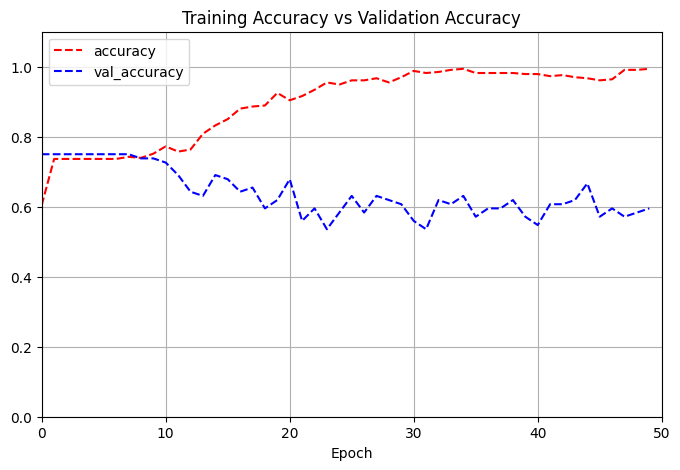

In [ ]:
# plotting the Training and validation accuracy versus epoch
pd.DataFrame(history_lstm.history)[['accuracy','val_accuracy']].plot(figsize=(8,5),grid=True,xlim=[0,epochs],ylim=[0,1.1],xlabel="Epoch",style=["r--","b--"])
plt.title ('Training Accuracy vs Validation Accuracy')
plt.show()

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Classification report for Train set:

               precision    recall  f1-score   support

           1       1.00      1.00      1.00       246
           2       0.97      1.00      0.98        32
           3       1.00      0.96      0.98        27
           4       1.00      0.96      0.98        23
           5       1.00      1.00      1.00         6

    accuracy                           0.99       334
   macro avg       0.99      0.98      0.99       334
weighted avg       0.99      0.99      0.99       334


Classification report for Test set:

               precision    recall  f1-score   support

           1       0.77      0.79      0.78        63
           2       0.00      0.00      0.00         8
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         7
           5       0.00      0.00      0.00         2

    accuracy                 

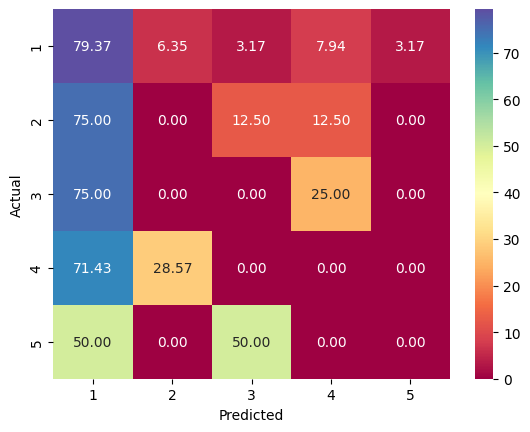

In [ ]:
# Predict values on train and test sets
model_name='LSTM Model'
y_act_train=np.argmax(y_train_seq,axis=1)+1
y_pred_train = lstm_model.predict(X_train_seq)
y_pred_train_class=np.argmax(y_pred_train, axis=1)+1

y_act_test=np.argmax(y_test_seq,axis=1)+1
y_pred_test = lstm_model.predict(X_test_seq)
y_pred_test_class=np.argmax(y_pred_test, axis=1)+1

# Classification report
print('Classification report for Train set:\n\n', classification_report(y_act_train, y_pred_train_class))
print('')
print('Classification report for Test set:\n\n', classification_report(y_act_test, y_pred_test_class))

# Confusion matrix on test data
labels = [1, 2, 3, 4, 5]
cm = confusion_matrix(y_act_test, y_pred_test_class, labels=labels)
add_to_model_performance(model_name,y_act_test,y_pred_test_class)

# Convert confusion matrix to NumPy array for normalization
cm_np = cm.astype('float')
cm_normalized = cm_np / cm_np.sum(axis=1, keepdims=True) * 100

# Convert back to DataFrame for display
cm_normalized_df = pd.DataFrame(cm_normalized, index=labels, columns=labels)

# Print confusion matrix with percentage values
print('Confusion Matrix (Percentage) on Test Set:\n')
sns.heatmap(cm_normalized_df, annot=True, fmt='.2f', cmap='Spectral')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
# metrics.ConfusionMatrixDisplay.from_predictions(y_act_test,y_pred_test_class,normalize="true",values_format=".2%",labels=labels)


In [ ]:
# dataframe with models on how much they underpredict severity

slf =[]

for i in range(2,6):
  sev_df=pd.DataFrame(columns=['Actual Severity','Predicted Severity'])
  sev_df['Actual Severity']=y_act_test[y_act_test==i]
  sev_df['Predicted Severity']=y_pred_test_class[y_act_test==i]
  sev_df['Pred_lower_than_actual']=sev_df['Predicted Severity']<sev_df['Actual Severity']
  print("Actual level",i,"predicted as a lower level:  ",round(sev_df['Pred_lower_than_actual'].sum()/sev_df.shape[0]*100,2)," % of Level ",i,"accidents")
  slf.append(round(sev_df['Pred_lower_than_actual'].sum()/sev_df.shape[0]*100,2))

severity_df.loc[len(severity_df)]={'Model name':model_name,
                                    'Actual level 2 predicted as a lower level':slf[0],
                                    'Actual level 3 predicted as a lower level':slf[1],
                                    'Actual level 4 predicted as a lower level':slf[2],
                                    'Actual level 5 predicted as a lower level':slf[3]
                                    }

Actual level 2 predicted as a lower level:   75.0  % of Level  2 accidents
Actual level 3 predicted as a lower level:   75.0  % of Level  3 accidents
Actual level 4 predicted as a lower level:   100.0  % of Level  4 accidents
Actual level 5 predicted as a lower level:   100.0  % of Level  5 accidents


### Step 3: Choose the best performing classifier and pickle it. [ 5 points ]

In [ ]:
# Dataframe with model performance for each trained model
model_performance_df

Model  Recall(1)  Recall(2)  Recall(3)  Recall(4)  \
0     Base Logistic Regression   0.777778      0.125       0.25   0.285714   
1    Tuned Logistic Regression   1.000000      0.000       0.00   0.000000   
2                     Base SVM   1.000000      0.000       0.00   0.142857   
3                    Tuned SVM   0.301587      0.375       0.25   0.714286   
4                     Base KNN   0.063492      0.875       0.50   0.000000   
5                    Tuned KNN   0.111111      0.875       0.50   0.000000   
6           Base Decision Tree   0.603175      0.125       0.00   0.000000   
7         Pruned Decision Tree   0.047619      0.000       0.00   0.857143   
8          Tuned Decision Tree   0.047619      0.000       0.00   0.857143   
9                Random Forest   1.000000      0.125       0.00   0.000000   
10         Tuned Random Forest   0.634921      0.250       0.25   0.142857   
11         Base Neural Network   0.825397      0.125       0.50   0.142857   
12  Regularized Neural Network   0.841270      0.250       0.50   0.142857   
13                  LSTM Model   0.793651      0.000       0.00   0.000000   

    Recall(5)  Overall Accuracy  
0         0.5          0.642857  
1         0.0          0.750000  
2         0.0          0.761905  
3         0.5          0.345238  
4         0.0          0.154762  
5         0.0          0.190476  
6         0.0          0.464286  
7         0.0          0.107143  
8         0.0          0.107143  
9         0.0          0.761905  
10        0.0          0.523810  
11        0.0          0.666667  
12        0.0          0.690476  
13        0.0          0.595238

In [ ]:
# dataframe with models on how much they underpredict severity
severity_df

Model name  Actual level 2 predicted as a lower level  \
0     Base Logistic Regression                                       75.0   
1    Tuned Logistic Regression                                      100.0   
2                     Base SVM                                      100.0   
3                    Tuned SVM                                       25.0   
4                     Base KNN                                        0.0   
5                    Tuned KNN                                        0.0   
6           Base Decision Tree                                       37.5   
7         Pruned Decision Tree                                       25.0   
8          Tuned Decision Tree                                       25.0   
9                Random Forest                                       87.5   
10         Tuned Random Forest                                       50.0   
11         Base Neural Network                                       75.0   
12  Regularized Neural Network                                       75.0   
13                  LSTM Model                                       75.0   

    Actual level 3 predicted as a lower level  \
0                                        50.0   
1                                       100.0   
2                                       100.0   
3                                         0.0   
4                                        50.0   
5                                        50.0   
6                                        75.0   
7                                        25.0   
8                                        25.0   
9                                       100.0   
10                                       75.0   
11                                       25.0   
12                                       25.0   
13                                       75.0   

    Actual level 4 predicted as a lower level  \
0                                       71.43   
1                                      100.00   
2                                       85.71   
3                                       28.57   
4                                       85.71   
5                                       85.71   
6                                      100.00   
7                                       14.29   
8                                       14.29   
9                                      100.00   
10                                      71.43   
11                                      85.71   
12                                      71.43   
13                                     100.00   

    Actual level 5 predicted as a lower level  
0                                        50.0  
1                                       100.0  
2                                       100.0  
3                                        50.0  
4                                       100.0  
5                                       100.0  
6                                       100.0  
7                                       100.0  
8                                       100.0  
9                                       100.0  
10                                      100.0  
11                                      100.0  
12                                      100.0  
13                                      100.0

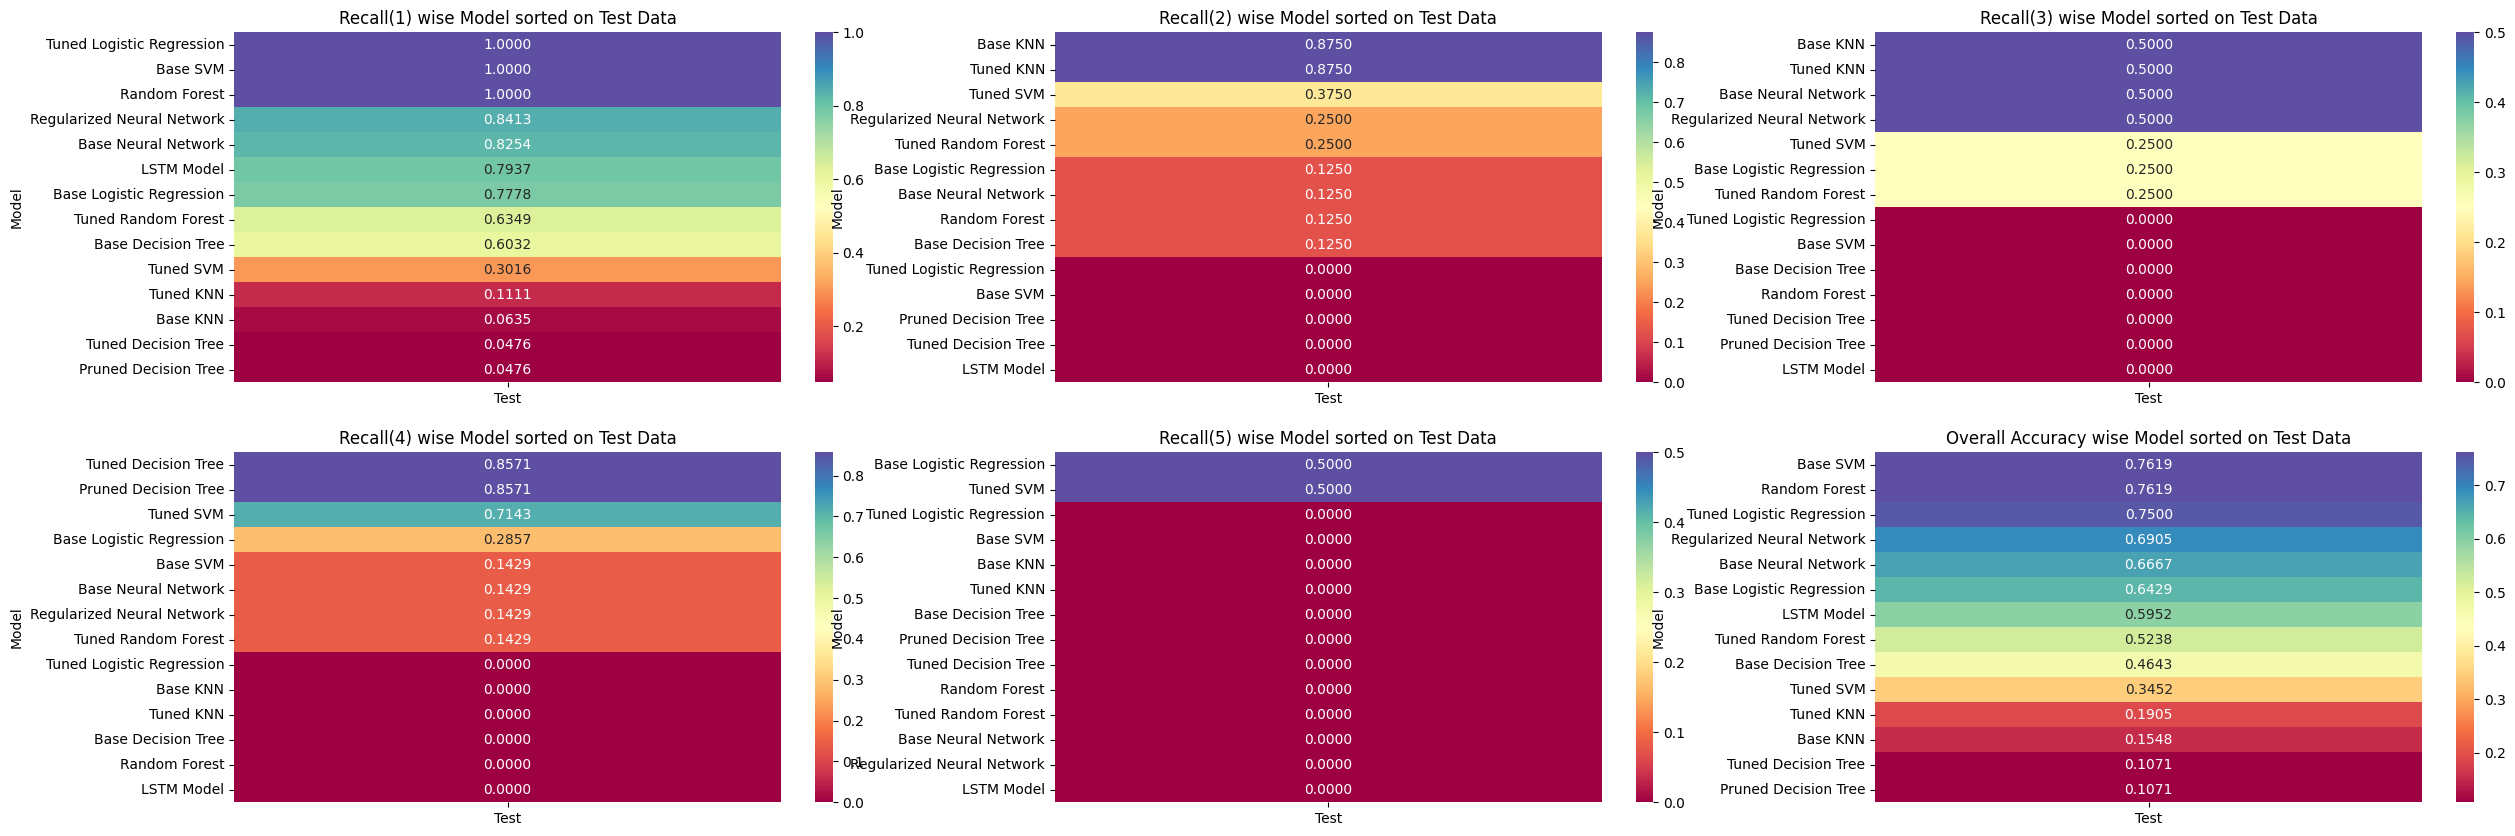

In [ ]:
# perfromance of all models on each description
plt.figure(figsize=(30,10))
for i,col in enumerate(model_performance_df.columns[1:]):
  plt.subplot(2,3,i+1)
  drawHeatMap(col)
plt.show()

**Observations on choosing best model:**
* LSTM is not performing well on recall scores although teh accuracy is relatively acceptable than that of many other models.
* There is no model performing upto our required standards or benchmark which should be at least 85% recall scores for recall scores for each levels.
* But if the severity of accidents are not underpredicted for too many entries in the data, we can accept that model for the current task.
* Based on the above criterion, we can selected the **Regularized Neural Network** for our purpose. We can choose to pickle this.
* The lack of sufficient training data had a detrimental effect on the performance of each of our classifiers. So, among these models, we could only have acceptable performance on models like Regularized Neural Network.
* We suggest also to build LLM models for better metrics scores, but that is beyond the scope of teh current project. So, we can settle for **Regularized Neural Network** as the best of all other models on various metrics.

### Pickle the preprocessing process and the best models


In [ ]:
#pickle the best model

In [ ]:
from pickle import dump

# Open the file in write binary mode ('wb')
with open('/content/drive/My Drive/AIML_CAPSTONE_PROJECT/onehotencoder.pkl', 'wb') as file:
    # Now dump the object to the opened file
    dump(oneHotEncoder, file)

# Repeat for other objects
with open('/content/drive/My Drive/AIML_CAPSTONE_PROJECT/scaler.pkl', 'wb') as file:
    dump(scaler, file)

with open('/content/drive/My Drive/AIML_CAPSTONE_PROJECT/word2Vec.pkl', 'wb') as file:
    dump(model_W2V, file)

with open('/content/drive/My Drive/AIML_CAPSTONE_PROJECT/regularised_nn_model.pkl', 'wb') as file:
    dump(regularised_nn_model, file)

In [ ]:
import pickle
scaler_opened=pickle.load(open('/content/drive/My Drive/AIML_CAPSTONE_PROJECT/scaler.pkl','rb'))
oneHotEncoder_opened=pickle.load(open('/content/drive/My Drive/AIML_CAPSTONE_PROJECT/onehotencoder.pkl','rb'))
model_W2V_opened=pickle.load(open('/content/drive/My Drive/AIML_CAPSTONE_PROJECT/word2Vec.pkl','rb'))
regularised_nn_model_opened=pickle.load(open('/content/drive/My Drive/AIML_CAPSTONE_PROJECT/regularised_nn_model.pkl','rb'))

In [ ]:
scaler_opened

StandardScaler()

In [ ]:
oneHotEncoder_opened

OneHotEncoder()

In [ ]:
model_W2V_opened

In [ ]:
regularised_nn_model_opened.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 128)                 │          41,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 8)                   │             264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 5)                   │              45 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 140,289 (548.01 KB)

 Trainable params: 46,677 (182.33 KB)

 Non-trainable params: 256 (1.00 KB)

 Optimizer params: 93,356 (364.68 KB)

We have successfully picled the preprocessing steps and the best performing model i.e. Regularized Neural Network.

**END of Project**